In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,mutual_info_regression, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
from skopt.space import Real, Integer
import json
import os
import datetime
import re

## For this project, we will use the diamond dataset

In [47]:
df = pd.read_csv("/Users/ryan/Downloads/diamonds.csv")

In [124]:
df

carat       cut     color   clarity     depth     table     price  \
0     -1.198157  0.981464  0.658169 -1.245204 -0.174090 -1.099662 -0.903585   
1     -1.240350  0.085888  0.658169 -0.638089 -1.360726  1.585514 -0.904337   
2     -1.198157 -1.705264  0.658169  0.576140 -3.384987  3.375631 -0.904087   
3     -1.071577  0.085888 -1.532253 -0.030975  0.454129  0.242926 -0.901831   
4     -1.029384 -1.705264 -2.262394 -1.245204  1.082348  0.242926 -0.901580   
...         ...       ...       ...       ...       ...       ...       ...   
53935 -0.164426  0.981464  1.388309 -0.638089 -0.662705 -0.204603 -0.294979   
53936 -0.164426 -1.705264  1.388309 -0.638089  0.942744 -1.099662 -0.294728   
53937 -0.206619 -0.809688  1.388309 -0.638089  0.733338  1.137985 -0.294478   
53938  0.130926  0.085888 -0.802112 -1.245204 -0.523100  0.242926 -0.295230   
53939 -0.101136  0.981464  1.388309 -1.245204  0.314525 -1.099662 -0.294227   

              x         y         z  
0     -1.587823 -1.536181 -1.571115  
1     -1.641310 -1.658759 -1.741159  
2     -1.498677 -1.457382 -1.741159  
3     -1.364959 -1.317293 -1.287708  
4     -1.240155 -1.212227 -1.117663  
...         ...       ...       ...  
53935  0.016798  0.022304 -0.054887  
53936 -0.036690  0.013548  0.100987  
53937 -0.063434 -0.047740  0.030135  
53938  0.373380  0.337503  0.285201  
53939  0.088114  0.118615  0.143498  

[53940 rows x 10 columns]

###  Handling Categorical Features
A categorical feature is a feature that can take on one of a limited number of possible
values. A preprocessing step is to convert categorical variables into numbers and thus
prepared for training.
One method for numerical encoding of categorical features is to assign a scalar. For
instance, if we have a “Quality” feature with values {Poor, Fair, Typical, Good,
Excellent}we might replace them with numbers 1 through 5. If there is no numerical
meaning behind categorical features (e.g. {Cat, Dog}) one has to perform “one-hot
encoding” instead.

In [49]:
#transform features into numbers

df=df.iloc[:,1:]
cut_num = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_num = {'J':0, 'I':1,'H':2, 'G':3, 'F':4, 'E':4, 'D':5}
clarity_num = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2':3, 'VS1': 4, 'VVS2': 5, 'VVS1':6, 'IF':7}

df['cut'].replace(cut_num, inplace=True)
df['color'].replace(color_num, inplace=True)
df['clarity'].replace(clarity_num, inplace=True)

df


carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    4      4        1   61.5   55.0    330  3.95  3.98  2.43
1       0.21    3      4        2   59.8   61.0    327  3.89  3.84  2.31
2       0.23    1      4        4   56.9   65.0    328  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0    337  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0    338  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    4      5        2   60.8   57.0   2758  5.75  5.76  3.50
53936   0.72    1      5        2   63.1   55.0   2759  5.69  5.75  3.61
53937   0.70    2      5        2   62.8   60.0   2760  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    4      5        1   62.2   55.0   2761  5.83  5.87  3.64

[53940 rows x 10 columns]

# Question 1.1
Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report
which features have the highest absolute correlation with the target variable. In
the context of either dataset, describe what the correlation patterns suggest.

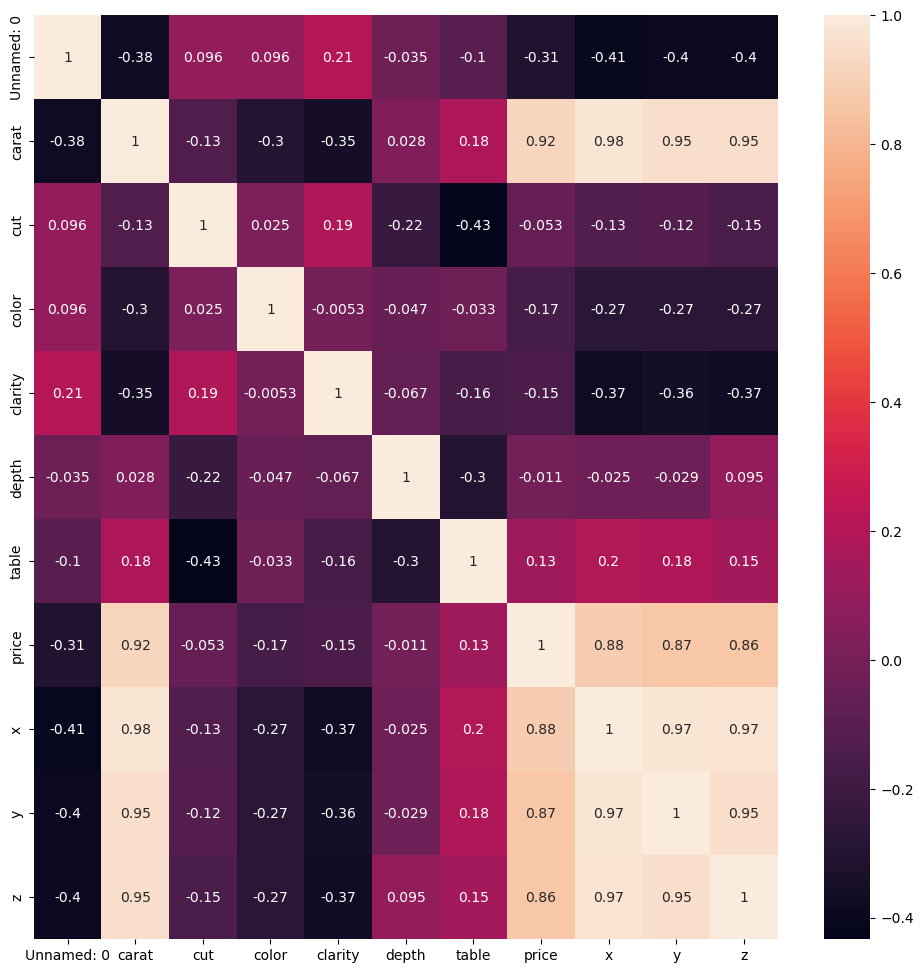

In [15]:
pearsoncorr = df.corr(method='pearson')
plt.figure(figsize = (12, 12))
sns.heatmap(pearsoncorr, annot = True)
plt.show()

# Question 1.2
Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?

### A: If the distribution of a feature has high skewness, we can scale the feature to a common scale. This can be done using a method like z-score normalization or min-max scaling.

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

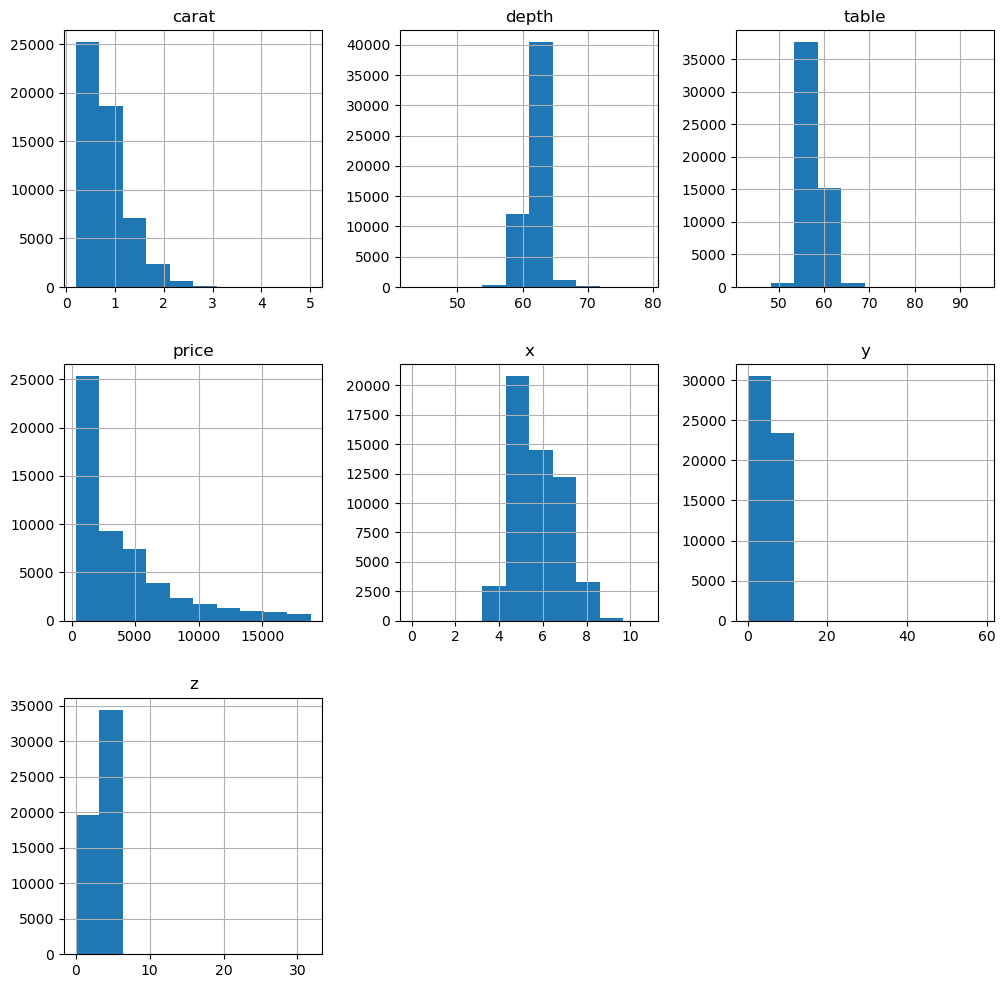

In [17]:
df[['carat','depth','table','price','x','y','z']].hist(figsize=(12,12))

# Question 1.3
Construct and inspect the box plot of categorical features vs target variable. What
do you find? 

### A:
1.Cut: The box plot shows that the "Ideal" cut has a higher median price than the other cuts, followed by "Premium" and "Very Good." "Good" and "Fair" cuts have a lower median price. This suggests that the cut of a diamond is a significant factor in determining its price.

2.Color: The box plot shows that diamonds with better colors (D, E, F) have a higher median price than diamonds with lower colors (G, H, I, J). This suggests that the color of a diamond is a significant factor in determining its price.

3.Clarity: The box plot shows that diamonds with higher clarity (IF, VVS1, VVS2) have a higher median price than diamonds with lower clarity (I1, SI1, SI2, VS1, VS2). This suggests that the clarity of a diamond is a significant factor in determining its price.


<AxesSubplot:xlabel='color', ylabel='price'>

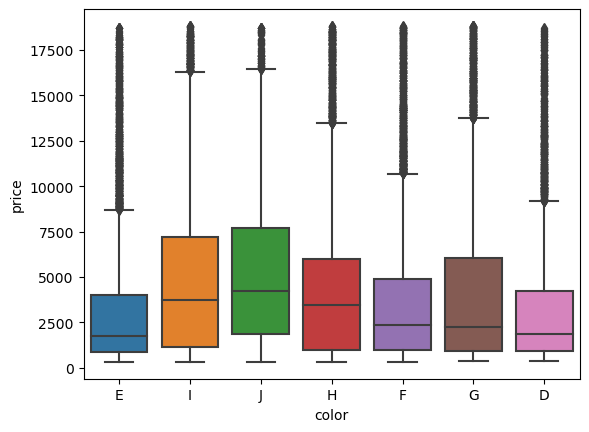

In [28]:
sns.boxplot(x= df['color'],y=df['price'],)


<AxesSubplot:xlabel='cut', ylabel='price'>

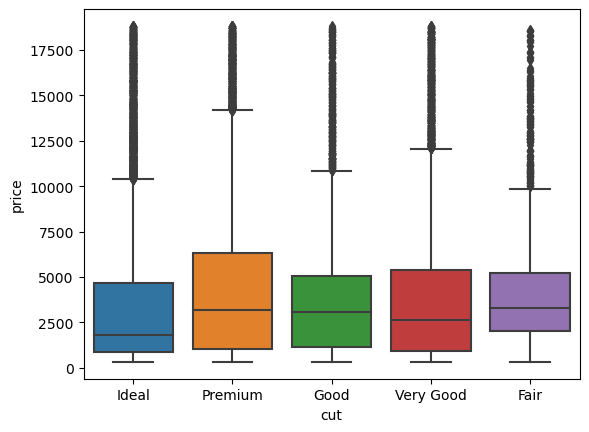

In [29]:
sns.boxplot(x=df['cut'],y=df['price'])


<AxesSubplot:xlabel='clarity', ylabel='price'>

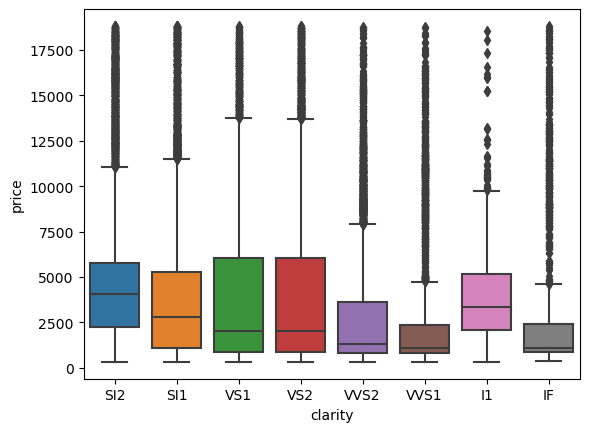

In [30]:
sns.boxplot(x=df['clarity'],y=df['price'])

# Question 1.4
For the Diamonds dataset, plot the counts by color, cut and clarity.

<AxesSubplot:>

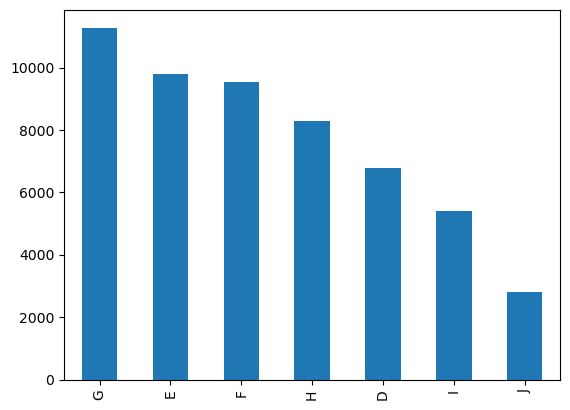

In [36]:
df['color'].value_counts().plot(kind='bar')

<AxesSubplot:>

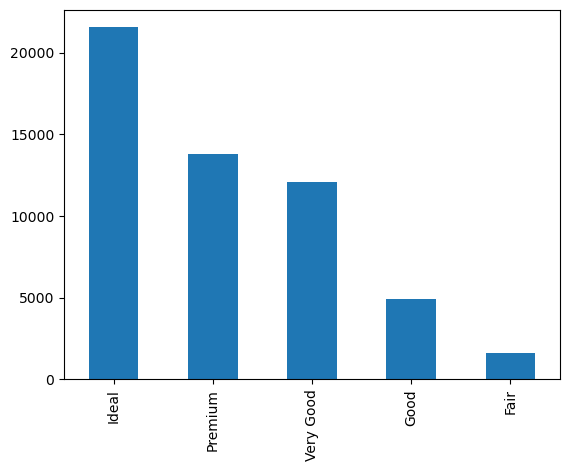

In [37]:
df['cut'].value_counts().plot(kind='bar')

<AxesSubplot:>

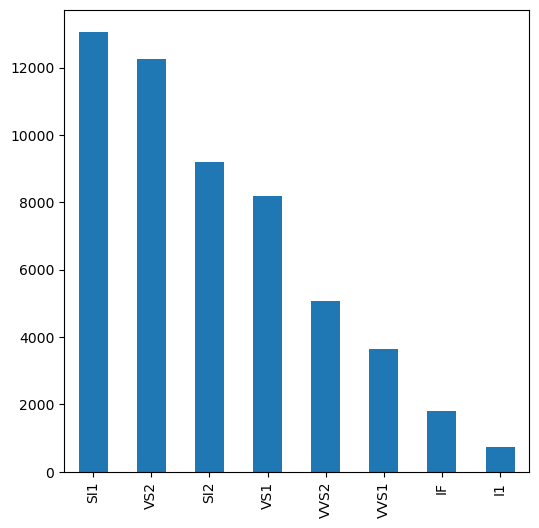

In [40]:
df['clarity'].value_counts().plot(kind='bar',x='clarity',y='counts',figsize=(6,6))

# Question 2.1 
Standardize feature columns and prepare them for training. 

In [216]:
# Instantiate a StandardScaler object
scaler = StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df.values),index=df.index,columns=df.columns)
#standardize the values in each column
# Separate the target variable from the features
X = df.drop('price', axis=1)
y = df['price']

df.head()

carat       cut     color   clarity     depth     table     price  \
0 -1.198168  0.981473  0.658175 -1.245215 -0.174092 -1.099672 -0.903594   
1 -1.240361  0.085889  0.658175 -0.638095 -1.360738  1.585529 -0.904346   
2 -1.198168 -1.705279  0.658175  0.576145 -3.385019  3.375663 -0.904095   
3 -1.071587  0.085889 -1.532267 -0.030975  0.454133  0.242928 -0.901839   
4 -1.029394 -1.705279 -2.262415 -1.245215  1.082358  0.242928 -0.901588   

          x         y         z  
0 -1.587837 -1.536196 -1.571129  
1 -1.641325 -1.658774 -1.741175  
2 -1.498691 -1.457395 -1.741175  
3 -1.364971 -1.317305 -1.287720  
4 -1.240167 -1.212238 -1.117674

# Question 2.2
you **may** use these functions to select features that yield better regression re-
sults (especially in the classical models). Describe how this step qualitatively affects the
performance of your models in terms of test RMSE. Is it true for all model types? Also
list two features for either dataset that has the lowest MI w.r.t to the target. 
### A:  Qualitatively, feature selection can improve the performance of regression models by removing irrelevant or redundant features that can cause overfitting or reduce the generalization of the model. However, the effect of feature selection may depend on the type of regression model used, the specific dataset, and the feature selection method applied. In some cases, removing certain features may even worsen the performance of the model.

### The top six features using mutual_info_regression: 1. carat, 2. color, 3. clarity, 4. x, 5. y, 6. z

### Two features that has lowest MI: 1. depth, 2. table

In [145]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply mutual info feature selection
mi_selector = SelectKBest(mutual_info_regression, k=6)
mi_selector.fit(X_train, y_train)
selected_features = pd.DataFrame(mi_selector.transform(X_train), columns=X_train.columns[mi_selector.get_support()])
selected_features_idx = mi_selector.get_support(indices=True)

# Use the selected features to train a linear regression model
lr = LinearRegression()
lr.fit(selected_features, y_train)

# Evaluate the performance on the testing data
X_test_selected = X_test.iloc[:, selected_features_idx]
y_pred = lr.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse:.3f}')
print('Selected Feature Index: ',selected_features_idx)
print('Selected Features: ')
for i in selected_features_idx:
    print(x_cat.columns[i])

Test RMSE: 0.308
Selected Feature Index:  [0 2 3 6 7 8]
Selected Features: 
carat
color
clarity
x
y
z


In [136]:
diamond_mi = mutual_info_regression(x_cat,y)
print(diamond_mi)
print(x_cat.columns[4],x_cat.columns[5])

[1.64891325 0.05755849 0.11484458 0.21503222 0.0328589  0.03425779
 1.41206026 1.42135756 1.36035096]
depth table


# Question 3
3.3 Evaluation
Perform 10-fold cross-validation and measure average RMSE errors for training and val-
idation sets.
For random forest model, measure “Out-of-Bag Error” (OOB) as well. Explain what
OOB error and R2 score means given this link. 

### A: The OOB error (Out-of-Bag error) is an estimate of the prediction error of a random forest model. During the training of a random forest model, each tree is trained on a random subset of the training data. The OOB error is calculated by evaluating the predictions of each tree on the samples that were not used during its training. The OOB error is therefore an estimate of the performance of the model on unseen data.
###    The R2 score is a measure of how well a regression model fits the data. It ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the data, and 1 indicates that the model perfectly fits the data. In the context of a random forest model, the R2 score is used to measure the goodness of fit of the model on the OOB data. A high R2 score indicates that the model is a good fit to the data, while a low R2 score indicates that the model does not fit the data well.

### Output of original datasets with standardization

In [146]:
# Separate the target variable from the features
y = df['price']
X = df.drop('price', axis=1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
r = LinearRegression()

# 10-fold cross-validation for linear regression
train_rmse = -cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
val_rmse = -cross_val_score(lr, X_val, y_val, cv=10, scoring='neg_root_mean_squared_error')

print("Training RMSE: {:}".format(train_rmse.mean()))
print("Validation RMSE: {:}".format(val_rmse.mean()))
rf = RandomForestRegressor()

# 10-fold cross-validation for random forest regression
train_rmse = -cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
val_rmse = -cross_val_score(rf, X_val, y_val, cv=10, scoring='neg_root_mean_squared_error')

# Create a random forest regressor with OOB score calculation
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf.predict(X_val)

# Compute the RMSE for the testing data
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print the OOB score and the RMSE for the testing data
print("OOB score:", rf.oob_score_)
print("Test RMSE:", test_rmse)

Training RMSE: 0.3024855261289583
Validation RMSE: 0.3041663041848425
OOB score: 0.980840676108022
Test RMSE: 0.1364816561643523


### Output After Selecting Features and Standardization

In [139]:
# Separate the target variable from the features
y = df['price']
X_selected = df[['carat', 'color', 'clarity', 'x', 'y', 'z']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Create a linear regression model
r = LinearRegression()

# 10-fold cross-validation for linear regression
train_rmse = -cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
val_rmse = -cross_val_score(lr, X_test, y_test, cv=10, scoring='neg_root_mean_squared_error')

print("Training RMSE: {:}".format(train_rmse.mean()))
print("Validation RMSE: {:}".format(val_rmse.mean()))
rf = RandomForestRegressor()

# 10-fold cross-validation for random forest regression
train_rmse = -cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
val_rmse = -cross_val_score(rf, X_test, y_test, cv=10, scoring='neg_root_mean_squared_error')

# Create a random forest regressor with OOB score calculation
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf.predict(X_test)

# Compute the RMSE for the testing data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the OOB score and the RMSE for the testing data
print("OOB score:", rf.oob_score_)
print("Test RMSE:", test_rmse)

Training RMSE: 0.30731143727652144
Validation RMSE: 0.30491868424398205
OOB score: 0.9793546900873242
Test RMSE: 0.14033930749435267


# Question 4.1 
Explain how each regularization scheme affects the learned parameter set. 
### A:
### Ordinary Least Squares (OLS) Regression:
In OLS, the objective function is to minimize the sum of the squared residuals between the predicted and actual values. OLS does not include any regularization term, so it tries to fit the data as closely as possible without any constraints. As a result, OLS can be prone to overfitting, especially when the number of features is large relative to the sample size.

### Lasso Regression:
Lasso regression adds a penalty term to the loss function, which is the absolute value of the sum of the weights. This penalty term forces the model to select a smaller subset of features, as the weights for many features will be driven to zero. This feature selection property makes Lasso regression a useful tool for identifying the most important features in a dataset. The learned parameter set of Lasso regression is usually sparse, meaning that many of the weights are exactly zero.

### Ridge Regression: 
Ridge regression also adds a penalty term to the loss function, but the penalty term is the squared sum of the weights. This penalty term encourages the model to distribute the weights across all features, even if some of them are less important. Ridge regression reduces the impact of noisy or irrelevant features on the model, making it more robust to overfitting. The learned parameter set of Ridge regression is typically less sparse than that of Lasso regression, with most weights shrunk towards zero but not exactly zero.

# Question 4.2
• Report your choice of the best regularization scheme along with the optimal penalty
parameter and explain how you computed it. 

### I use the method grid search to find the best parameter. For the value of alpha I choose [ 0.001, 0.01, 0.1, 1,5, 10, 20 , 50, 100, 300 ] and the followings are the best results.

### OLS RMSE scores: 0.3024855261289583 
### Best alpha for Ridge:  20, RMSE SCORE:  0.30245005230693034
### Best alpha for Lasso:  0.001, RMSE SCORE:  0.302468779614894

In [140]:
ridge_best=100
lasso_best=100
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train an ordinary least squares linear regression model
ols = LinearRegression()
ols_scores = cross_val_score(ols, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
alpha= [ 0.001,0.01, 0.1, 1,5, 10, 20, 50, 100,300]
for i in alpha:
    # Train a Ridge regression model with alpha=1.0
    ridge = Ridge(alpha=i)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    ridgescore.append(-ridge_scores.mean())
    if ridge_best > -ridge_scores.mean():
        ridge_best = -ridge_scores.mean()
        ridge_alpha=i
    lasso = Lasso(alpha = i)
    lasso_scores= cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    if lasso_best > -lasso_scores.mean():
        lasso_best = -lasso_scores.mean()
        lasso_alpha=i


print(f"OLS RMSE scores: {-ols_scores.mean():} ")
print("Best alpha for Ridge: ", ridge_alpha)
print('RMSE SCORE: ', ridge_best)
print("Best alpha for Lasso: ", lasso_alpha)
print('RMSE SCORE: ', lasso_best)


OLS RMSE scores: 0.3024855261289583 
Best alpha for Ridge:  20
RMSE SCORE:  0.30245005230693034
Best alpha for Lasso:  0.001
RMSE SCORE:  0.30246877961489493


#  Question 4.3
• Does feature standardization play a role in improving the model performance (in
the cases with ridge regularization)? Justify your answer.

### A: Base on the following results, the feature standardization improve the performance.
Ridge RMSE score (with feature standardization) on test set: 0.30467

Ridge RMSE score (without feature standardization) on test set: 0.405739
       

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Ridge regression model on the standardized data
from sklearn.linear_model import RidgeCV
ridge_best=100
alphas = [ 0.001,0.01, 0.1, 1,5, 10, 20, 50, 100,300]
for i in alphas:
    # Train a Ridge regression model with alpha=1.0
    ridge = Ridge(alpha=i)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    ridgescore.append(-ridge_scores.mean())
    if ridge_best > -ridge_scores.mean():
        ridge_best = -ridge_scores.mean()
        ridge_alpha=i
# Evaluate the performance on the validation set
from sklearn.metrics import mean_squared_error
print("Best alpha for Ridge: ", ridge_alpha)
print('RMSE SCORE: ', ridge_best)
# Train a Ridge regression model with alpha=ridge_alpha
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the performance on the test set
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Ridge RMSE score (with feature standardization) on test set:", ridge_rmse)

Best alpha for Ridge:  20
RMSE SCORE:  0.30245005230693034
Ridge RMSE score (with feature standardization) on test set: 0.30467068226830274


### Ridge without feature standardization

In [152]:
# Split the data into training and testing sets

data=df.iloc[:,1:]
cut_num = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_num = {'J':0, 'I':1,'H':2, 'G':3, 'F':4, 'E':4, 'D':5}
clarity_num = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2':3, 'VS1': 4, 'VVS2': 5, 'VVS1':6, 'IF':7}

data['cut'].replace(cut_num, inplace=True)
data['color'].replace(color_num, inplace=True)
data['clarity'].replace(clarity_num, inplace=True)


data_X = data.drop('price',axis=1)
data_y = data['price']
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42)
# Train a Ridge regression model on the standardized data
from sklearn.linear_model import RidgeCV

alphas = [ 0.001,0.01, 0.1, 1,5, 10, 20, 50, 100,300]
for i in alphas:
    # Train a Ridge regression model with alpha=1.0
    ridge = Ridge(alpha=i)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    ridgescore.append(-ridge_scores.mean())
    if ridge_best > -ridge_scores.mean():
        ridge_best = -ridge_scores.mean()
        ridge_alpha=i
# Evaluate the performance on the validation set
from sklearn.metrics import mean_squared_error
print("Best alpha for Ridge: ", ridge_alpha)
print('RMSE SCORE: ', ridge_best)
# Train a Ridge regression model with alpha=ridge_alpha
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the performance on the test set
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Ridge RMSE score (without feature standardization):", ridge_rmse)

/var/folders/bm/gydbv0ls7ysg0bf0xp2b3j2r0000gn/T/ipykernel_20076/2032024945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut'].replace(cut_num, inplace=True)
/var/folders/bm/gydbv0ls7ysg0bf0xp2b3j2r0000gn/T/ipykernel_20076/2032024945.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'].replace(color_num, inplace=True)
/var/folders/bm/gydbv0ls7ysg0bf0xp2b3j2r0000gn/T/ipykernel_20076/2032024945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Best alpha for Ridge:  0.001
RMSE SCORE:  0.40978843666697296
Ridge RMSE score (without feature standardization): 0.4057395277468377


# Question 5.1
Perform polynomial regression by crafting products of features you selected in part 3.1.4
up to a certain degree (max degree 6) and applying ridge regression on the compound
features. You can use scikit-learn library to build such features. Avoid overfitting by
proper regularization. Answer the following:
What are the most salient features? Why? 
### A:
carat: with a coefficient of 1.0678, carat has the largest positive effect on the target variable, which is consistent with its importance in the original linear regression model.

y: with a coefficient of 0.476, y has the second-largest positive effect on the target variable, indicating that the diamond's height is also an important predictor of price.

x: with a coefficient of -0.389, x has a negative effect on the target variable, indicating that as the length of the diamond increases, the price tends to decrease. This may be due to the fact that diamonds with longer lengths may also have thinner widths or depths, which can affect their overall value.

z: with a coefficient of -0.122, z also has a negative effect on the target variable, but its impact is smaller than x or y. This may suggest that the diamond's depth is less important in predicting price compared to its length and height.

#  Question 5.2
What degree of polynomial is best? How did you find the optimal degree? What
does a very high-order polynomial imply about the fit on the training data? What
about its performance on testing data?

### A: 
I apply grid search to find the optimal degree and alpha.

A very high-order polynomial can perfectly fit the training data by capturing all the fluctuations and noise in the data. However, this can result in overfitting, where the model becomes too complex and fails to generalize well to new, unseen data.

On the testing data, a very high-order polynomial can lead to poor performance because it is unable to capture the underlying patterns in the data and instead captures noise and fluctuations. This leads to poor generalization performance and can result in high RMSE scores on the testing data.

In general, it is important to balance the complexity of the model with its generalization performance by choosing an appropriate degree of polynomial that captures the underlying patterns in the data without overfitting.

In [118]:
for i in selected_features_idx:
    print(x_cat.columns[i])

carat
color
clarity
x
y
z


In [122]:

# define the features and target variable
X = df[['carat', 'color', 'clarity', 'x', 'y', 'z']]
y = df['price']

# define the pipeline with polynomial features and ridge regression
pipe = Pipeline([('poly', PolynomialFeatures()), ('scaler', StandardScaler()), ('reg', Ridge())])

# define the parameters for grid search
param_grid = {'poly__degree': [2, 3, 4, 5, 6],
              'reg__alpha': [ 0.001,0.01, 0.1, 1,5, 10, 20, 50, 100,300]}

# perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid.fit(X, y)

# print the results
print('Best degree:', grid.best_params_['poly__degree'])
print('Best alpha:', grid.best_params_['reg__alpha'])
print('RMSE score:', -grid.best_score_)

Best degree: 2
Best alpha: 5
RMSE score: 0.35892204168336345


In [ ]:
# Select the features
X = df[['carat', 'color', 'clarity', 'x', 'y', 'z']]
y = df['price']

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Apply Ridge regression on the polynomial features
alpha = 5
ridge = Ridge(alpha=alpha)

# Create a pipeline to combine the polynomial features and the Ridge regression model
model = Pipeline([('poly', poly), ('ridge', ridge)])

# Train the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')

# Compute the average RMSE
rmse = -scores.mean()

print('RMSE score:', rmse)

# Fit the model on the entire dataset
model.fit(X, y)

# Get the feature names
feature_names = poly.get_feature_names(['carat', 'color', 'clarity', 'x', 'y', 'z'])

# Get the coefficients
coefs = model.named_steps['ridge'].coef_

# Print the feature names and coefficients
for feature, coef in zip(feature_names, coefs):
    print(feature, ':', coef)

#  Neural Network
You will train a multi-layer perceptron (fully connected neural network). You can simply
use the sklearn implementation:

# Question 6.1
• Adjust your network size (number of hidden neurons and depth), and weight decay
as regularization. Find a good hyper-parameter set systematically (no more than
20 experiments in total). 

In [156]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01,0.05,0.1]
}

# Create MLPRegressor
mlp = MLPRegressor(max_iter=1000)

# Create GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV object to data
grid_search.fit(X_train, y_train)

# Print best hyper-parameters and corresponding score
print(f"Best hyper-parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")

Best hyper-parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
Best score: 0.1610793039539269


# Question 6.2
How does the performance generally compare with linear regression? Why?
### A:
The performance of MLP (Multi-Layer Perceptron) with the best hyperparameters, alpha=0.01 and hidden_layer_sizes=(50,50), is significantly better than that of OLS (Ordinary Least Squares) linear regression, with an RMSE score of 0.161, compared to OLS RMSE score of 0.302.

This is expected since MLP is a more complex model than linear regression, with multiple layers of nonlinear transformations that can capture complex relationships between the input variables and the output variable. In contrast, linear regression assumes a linear relationship between the input variables and the output variable, which may not be accurate in many real-world problems.

# Question 6.3
What activation function did you use for the output and why? You may use none.
### A:
For the output layer, I used a linear activation function because we are performing regression and we want the network to output continuous values. A linear activation function is the most appropriate choice for this type of problem as it allows the network to learn a linear relationship between the input features and the target variable.

# Question 6.4
What is the risk of increasing the depth of the network too far? 
### A:
 The risk of increasing the depth of the network too far is overfitting. When the network becomes too deep, it becomes more and more capable of memorizing the training data and fitting it perfectly. However, this can lead to poor generalization performance on new, unseen data. In addition, training a very deep network can be computationally expensive and require a large amount of training data to prevent overfitting. Therefore, it's important to balance model complexity with the amount of available data and computational resources.

# Question 7.1
• Random forests have the following hyper-parameters:

– Maximum number of features;

– Number of trees;

– Depth of each tree;

Explain how these hyper-parameters affect the overall performance. Describe if
and how each hyper-parameter results in a regularization effect during training.
### A:
1. Maximum number of features: This parameter controls the number of features that are considered when looking for the best split at each node of the decision tree. A smaller value for this parameter leads to a more random selection of features and can help to reduce overfitting by preventing the model from relying too heavily on any one feature.

2. Number of trees: This parameter controls the number of decision trees that are built in the random forest. A larger value for this parameter can help to reduce overfitting and improve the accuracy of the model, but it also increases the training time and memory requirements.

3. Depth of each tree: This parameter controls the maximum depth of each decision tree in the random forest. A smaller value for this parameter leads to shallower trees and can help to reduce overfitting, while a larger value can improve the accuracy of the model but also increase the risk of overfitting.





In [167]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Create the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
Best score: 0.02061509617061382


# Question 7.3
Randomly pick a tree in your random forest model (with maximum depth of 4) and
plot its structure. Which feature is selected for branching at the root node? What
can you infer about the importance of this feature as opposed to others? Do the
important features correspond to what you got in part 3.3.1? 

### A: According to the tree that has been chosen, the feature selected for branching for the root node is the y feature, which is also the feature that has the highest MI in part 3.3.1,It can be inferred that the values of feature y have a strong association with the target variable, and the decision tree algorithm has identified this association and used it as the first step in predicting the target variable. 

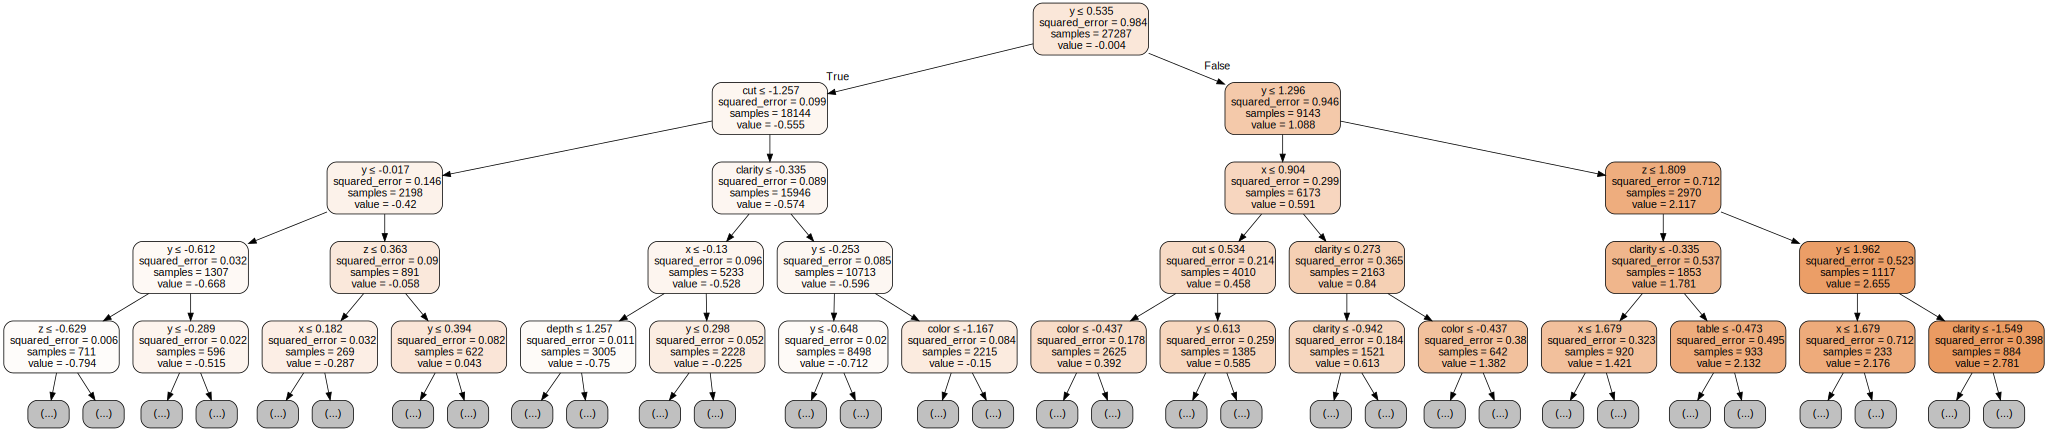

In [171]:
from sklearn.tree import export_graphviz
import graphviz
rf = RandomForestRegressor(random_state=42,max_features='log2',max_depth=None,n_estimators= 200)
rf.fit(X_train,y_train)
# Get the first tree from the random forest
tree = rf.estimators_[0]

# Export the tree to DOT format
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=4)

# Convert the DOT data to a graph
graph = graphviz.Source(dot_data)

# Display the graph
graph

# Question 7.4
Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.
### A:
Out-of-bag (OOB) error is a measure of the prediction error of a random forest model on unseen data. During the training of a random forest model, each tree in the forest is trained on a bootstrap sample of the data, leaving out about one-third of the data that is not used in the training of that tree. This left-out data is referred to as the out-of-bag samples. The OOB error is the average prediction error on each out-of-bag sample across all trees in the forest.

R2 score, also known as the coefficient of determination, is a measure of how well the regression model fits the actual data. It is the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score of 1 indicates a perfect fit, while an R2 score of 0 indicates that the model does not explain any of the variance in the dependent variable.


In [174]:
# Calculate the OOB error

from sklearn.ensemble import RandomForestRegressor

# Instantiate the random forest model with the desired hyperparameters
rf = RandomForestRegressor(n_estimators=100, max_features='log2', max_depth=4, oob_score=True, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Calculate the OOB score
oob_error = 1 - rf.oob_score_

# Print the OOB error
print("OOB Error:", oob_error)

OOB Error: 0.08194007527915947


# Question 8.1
Read the documentation of LightGBM OR CatBoost and determine the important
hyperparameters along with a search space for the tuning of these parameters (keep
the search space small). 

In [179]:
# Define the hyperparameter search space

params = {
    'iterations': [100, 500, 1000],
    'depth': sp_randint(4, 10),
    'learning_rate': [0.01, 0.1, 1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [0, 1, 2],
    'one_hot_max_size': [2, 5, 10],
}

# Create a CatBoostRegressor model
model = CatBoostRegressor(verbose=False)

# Define the random search with 10-fold cross-validation
rand_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=10, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')

# Fit the random search to the training data
rand_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding RMSE score
print("Best hyperparameters: ", rand_search.best_params_)
print("Best score: ", np.sqrt(-1 * rand_search.best_score_))

# Predict on the test set using the best model
y_pred = rand_search.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE: ", rmse)

Best hyperparameters:  {'bagging_temperature': 0, 'depth': 7, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'one_hot_max_size': 2, 'random_strength': 1}
Best score:  0.14148435397902417
Test RMSE:  0.13589088083679454


# Question 8.2
Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize
to find the ideal hyperparameter combination in your search space. Report the best
hyperparameter set found and the corresponding RMSE. 
### A:
### Best hyperparameters:  OrderedDict([('l2_leaf_reg', 1), ('learning_rate', 0.05776269789907855), ('max_depth', 8), ('n_estimators', 500)])
### RMSE score:  0.14028509218243043

In [182]:


# Define the hyperparameter search space
search_space = {
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'max_depth': Integer(3, 8),
    'l2_leaf_reg': Integer(1, 10),
    'n_estimators': Integer(100, 500),
}

# Create an instance of the CatBoost regressor
catboost = CatBoostRegressor(random_seed=42)

# Define the BayesSearchCV search strategy
opt = BayesSearchCV(
    catboost,
    search_space,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1,
)

# Fit the BayesSearchCV object to the data
opt.fit(X_train, y_train)

# Print the best hyperparameter set and corresponding RMSE score
print("Best hyperparameters: ", opt.best_params_)
print("RMSE score: ", -opt.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:	learn: 0.9870674	total: 71.3ms	remaining: 11.1s
1:	learn: 0.9716814	total: 92.7ms	remaining: 7.14s
2:	learn: 0.9567888	total: 98.3ms	remaining: 5.01s
3:	learn: 0.9418110	total: 103ms	remaining: 3.93s
4:	learn: 0.9275084	total: 114ms	remaining: 3.43s
5:	learn: 0.9132204	total: 119ms	remaining: 2.98s
6:	learn: 0.8994414	total: 124ms	remaining: 2.65s
7:	learn: 0.8857477	total: 129ms	remaining: 2.39s
8:	learn: 0.8720373	total: 138ms	remaining: 2.25s
9:	learn: 0.8589926	total: 144ms	remaining: 2.1s
10:	learn: 0.8460034	total: 151ms	remaining: 1.99s
11:	learn: 0.8333019	total: 156ms	remaining: 1.87s
12:	learn: 0.8206328	total: 164ms	remaining: 1.81s
13:	learn: 0.8082687	total: 171ms	remaining: 1.73s
14:	learn: 0.7960757	total: 177ms	remaining: 1.66s
15:	learn: 0.7842267	total: 182ms	remaining: 1.59s
16:	learn: 0.7726655	total: 187ms	remaining: 1.53s
17:	learn: 0.761260

0:	learn: 0.9860667	total: 65.3ms	remaining: 10.1s
1:	learn: 0.9706796	total: 81.4ms	remaining: 6.27s
2:	learn: 0.9557906	total: 88.7ms	remaining: 4.52s
3:	learn: 0.9408097	total: 94.1ms	remaining: 3.58s
4:	learn: 0.9261016	total: 99.4ms	remaining: 3s
5:	learn: 0.9118116	total: 105ms	remaining: 2.62s
6:	learn: 0.8979655	total: 111ms	remaining: 2.36s
7:	learn: 0.8842818	total: 118ms	remaining: 2.18s
8:	learn: 0.8705836	total: 128ms	remaining: 2.1s
9:	learn: 0.8575497	total: 138ms	remaining: 2.01s
10:	learn: 0.8447293	total: 144ms	remaining: 1.9s
11:	learn: 0.8320217	total: 150ms	remaining: 1.8s
12:	learn: 0.8192628	total: 157ms	remaining: 1.73s
13:	learn: 0.8069275	total: 165ms	remaining: 1.68s
14:	learn: 0.7946192	total: 172ms	remaining: 1.61s
15:	learn: 0.7828057	total: 177ms	remaining: 1.55s
16:	learn: 0.7711641	total: 184ms	remaining: 1.5s
17:	learn: 0.7597812	total: 189ms	remaining: 1.45s
18:	learn: 0.7486690	total: 194ms	remaining: 1.4s
19:	learn: 0.7375575	total: 199ms	remaining:

0:	learn: 0.9819966	total: 61.4ms	remaining: 9.51s
1:	learn: 0.9666935	total: 73.6ms	remaining: 5.67s
2:	learn: 0.9516341	total: 80.1ms	remaining: 4.08s
3:	learn: 0.9368630	total: 85.9ms	remaining: 3.27s
4:	learn: 0.9225833	total: 91.7ms	remaining: 2.77s
5:	learn: 0.9083256	total: 98.6ms	remaining: 2.46s
6:	learn: 0.8946383	total: 106ms	remaining: 2.25s
7:	learn: 0.8809776	total: 118ms	remaining: 2.17s
8:	learn: 0.8675536	total: 123ms	remaining: 2.02s
9:	learn: 0.8545899	total: 129ms	remaining: 1.88s
10:	learn: 0.8417040	total: 136ms	remaining: 1.8s
11:	learn: 0.8289575	total: 146ms	remaining: 1.75s
12:	learn: 0.8163411	total: 154ms	remaining: 1.69s
13:	learn: 0.8040835	total: 166ms	remaining: 1.68s
14:	learn: 0.7919672	total: 174ms	remaining: 1.64s
15:	learn: 0.7801499	total: 180ms	remaining: 1.58s
16:	learn: 0.7683771	total: 187ms	remaining: 1.53s
17:	learn: 0.7570775	total: 193ms	remaining: 1.48s
18:	learn: 0.7457498	total: 203ms	remaining: 1.46s
19:	learn: 0.7347179	total: 210ms	re

162:	learn: 0.1671787	total: 589ms	remaining: 767ms
163:	learn: 0.1670489	total: 596ms	remaining: 766ms
164:	learn: 0.1668559	total: 599ms	remaining: 762ms
165:	learn: 0.1666782	total: 602ms	remaining: 757ms
166:	learn: 0.1665345	total: 604ms	remaining: 752ms
167:	learn: 0.1664454	total: 607ms	remaining: 748ms
168:	learn: 0.1663559	total: 610ms	remaining: 744ms
169:	learn: 0.1662353	total: 613ms	remaining: 739ms
170:	learn: 0.1661151	total: 616ms	remaining: 735ms
171:	learn: 0.1659442	total: 619ms	remaining: 730ms
172:	learn: 0.1657423	total: 622ms	remaining: 726ms
173:	learn: 0.1655150	total: 625ms	remaining: 722ms
174:	learn: 0.1652441	total: 630ms	remaining: 720ms
175:	learn: 0.1651676	total: 633ms	remaining: 716ms
176:	learn: 0.1650802	total: 636ms	remaining: 712ms
177:	learn: 0.1649412	total: 639ms	remaining: 707ms
178:	learn: 0.1648738	total: 642ms	remaining: 702ms
179:	learn: 0.1647554	total: 644ms	remaining: 698ms
180:	learn: 0.1646095	total: 648ms	remaining: 695ms
181:	learn: 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
6:	learn: 0.6490767	total: 45.1ms	remaining: 2.37s
7:	learn: 0.6144074	total: 48.2ms	remaining: 2.21s
8:	learn: 0.5833582	total: 51.2ms	remaining: 2.08s
9:	learn: 0.5555730	total: 54.8ms	remaining: 2s
10:	learn: 0.5287198	total: 58.2ms	remaining: 1.93s
11:	learn: 0.5045770	total: 61.2ms	remaining: 1.85s
12:	learn: 0.4827245	total: 64.2ms	remaining: 1.79s
13:	learn: 0.4634627	total: 69ms	remaining: 1.78s
14:	learn: 0.4462160	total: 71.9ms	remaining: 1.73s
15:	learn: 0.4291234	total: 74.7ms	remaining: 1.68s
16:	learn: 0.4146387	total: 81.9ms	remaining: 1.72s
17:	learn: 0.4012461	total: 84.8ms	remaining: 1.68s
18:	learn: 0.3878802	total: 93ms	remaining: 1.74s
19:	learn: 0.3765187	total: 97.1ms	remaining: 1.72s
20:	learn: 0.3649943	total: 104ms	remaining: 1.75s
21:	learn: 0.3556512	total: 113ms	remaining: 1.81s
22:	learn: 0.3466942	total: 120ms	remaining: 1.84s
23:	learn: 0.3376504	total: 124ms	remaining: 1.81s
24:	learn: 0.33050

103:	learn: 0.1818664	total: 349ms	remaining: 910ms
104:	learn: 0.1815296	total: 351ms	remaining: 903ms
105:	learn: 0.1812539	total: 354ms	remaining: 898ms
106:	learn: 0.1808052	total: 357ms	remaining: 894ms
107:	learn: 0.1804329	total: 359ms	remaining: 888ms
108:	learn: 0.1801602	total: 361ms	remaining: 882ms
109:	learn: 0.1797298	total: 364ms	remaining: 876ms
110:	learn: 0.1794724	total: 367ms	remaining: 872ms
111:	learn: 0.1791317	total: 369ms	remaining: 866ms
112:	learn: 0.1789814	total: 371ms	remaining: 861ms
113:	learn: 0.1787375	total: 375ms	remaining: 858ms
114:	learn: 0.1784038	total: 377ms	remaining: 853ms
115:	learn: 0.1780251	total: 380ms	remaining: 848ms
116:	learn: 0.1773705	total: 382ms	remaining: 843ms
117:	learn: 0.1769702	total: 385ms	remaining: 839ms
118:	learn: 0.1766409	total: 388ms	remaining: 834ms
119:	learn: 0.1763149	total: 390ms	remaining: 828ms
120:	learn: 0.1761040	total: 392ms	remaining: 823ms
121:	learn: 0.1759002	total: 395ms	remaining: 818ms
122:	learn: 

162:	learn: 0.1662327	total: 631ms	remaining: 821ms
163:	learn: 0.1660979	total: 635ms	remaining: 816ms
164:	learn: 0.1660269	total: 637ms	remaining: 811ms
165:	learn: 0.1658551	total: 640ms	remaining: 806ms
166:	learn: 0.1657401	total: 643ms	remaining: 801ms
167:	learn: 0.1656512	total: 647ms	remaining: 797ms
168:	learn: 0.1655922	total: 649ms	remaining: 791ms
169:	learn: 0.1653689	total: 653ms	remaining: 788ms
170:	learn: 0.1651458	total: 662ms	remaining: 790ms
171:	learn: 0.1650380	total: 665ms	remaining: 785ms
172:	learn: 0.1649398	total: 668ms	remaining: 780ms
173:	learn: 0.1648202	total: 675ms	remaining: 780ms
174:	learn: 0.1646132	total: 678ms	remaining: 774ms
175:	learn: 0.1645320	total: 680ms	remaining: 769ms
176:	learn: 0.1644592	total: 683ms	remaining: 764ms
177:	learn: 0.1643264	total: 686ms	remaining: 759ms
178:	learn: 0.1641428	total: 690ms	remaining: 756ms
179:	learn: 0.1640680	total: 693ms	remaining: 751ms
180:	learn: 0.1639839	total: 696ms	remaining: 746ms
181:	learn: 

162:	learn: 0.1673444	total: 676ms	remaining: 879ms
163:	learn: 0.1670885	total: 679ms	remaining: 874ms
164:	learn: 0.1669382	total: 682ms	remaining: 869ms
165:	learn: 0.1668448	total: 686ms	remaining: 863ms
166:	learn: 0.1666782	total: 689ms	remaining: 858ms
167:	learn: 0.1665394	total: 692ms	remaining: 852ms
168:	learn: 0.1663123	total: 695ms	remaining: 847ms
169:	learn: 0.1661307	total: 698ms	remaining: 842ms
170:	learn: 0.1660541	total: 701ms	remaining: 837ms
171:	learn: 0.1659520	total: 705ms	remaining: 832ms
172:	learn: 0.1658105	total: 708ms	remaining: 827ms
173:	learn: 0.1656726	total: 712ms	remaining: 822ms
174:	learn: 0.1655570	total: 716ms	remaining: 818ms
175:	learn: 0.1654864	total: 722ms	remaining: 816ms
176:	learn: 0.1653415	total: 725ms	remaining: 811ms
177:	learn: 0.1650453	total: 728ms	remaining: 806ms
178:	learn: 0.1648943	total: 731ms	remaining: 800ms
179:	learn: 0.1647266	total: 735ms	remaining: 796ms
180:	learn: 0.1645778	total: 743ms	remaining: 796ms
181:	learn: 

103:	learn: 0.1826367	total: 321ms	remaining: 838ms
104:	learn: 0.1823319	total: 324ms	remaining: 832ms
105:	learn: 0.1820421	total: 326ms	remaining: 827ms
106:	learn: 0.1815898	total: 328ms	remaining: 821ms
107:	learn: 0.1811788	total: 331ms	remaining: 818ms
108:	learn: 0.1809173	total: 333ms	remaining: 814ms
109:	learn: 0.1806225	total: 335ms	remaining: 808ms
110:	learn: 0.1804656	total: 338ms	remaining: 803ms
111:	learn: 0.1802444	total: 340ms	remaining: 799ms
112:	learn: 0.1801078	total: 343ms	remaining: 795ms
113:	learn: 0.1796678	total: 345ms	remaining: 791ms
114:	learn: 0.1794261	total: 347ms	remaining: 785ms
115:	learn: 0.1786382	total: 349ms	remaining: 780ms
116:	learn: 0.1779215	total: 352ms	remaining: 776ms
117:	learn: 0.1775136	total: 355ms	remaining: 772ms
118:	learn: 0.1771634	total: 356ms	remaining: 766ms
119:	learn: 0.1767723	total: 359ms	remaining: 762ms
120:	learn: 0.1765370	total: 361ms	remaining: 758ms
121:	learn: 0.1763281	total: 363ms	remaining: 753ms
122:	learn: 

43:	learn: 0.2304330	total: 210ms	remaining: 1.29s
44:	learn: 0.2273205	total: 214ms	remaining: 1.27s
45:	learn: 0.2247990	total: 217ms	remaining: 1.26s
46:	learn: 0.2220749	total: 220ms	remaining: 1.25s
47:	learn: 0.2198441	total: 224ms	remaining: 1.23s
48:	learn: 0.2177388	total: 227ms	remaining: 1.22s
49:	learn: 0.2151910	total: 233ms	remaining: 1.23s
50:	learn: 0.2127757	total: 237ms	remaining: 1.22s
51:	learn: 0.2108772	total: 241ms	remaining: 1.21s
52:	learn: 0.2090959	total: 246ms	remaining: 1.21s
53:	learn: 0.2073181	total: 251ms	remaining: 1.2s
54:	learn: 0.2056091	total: 254ms	remaining: 1.19s
55:	learn: 0.2039154	total: 258ms	remaining: 1.18s
56:	learn: 0.2025259	total: 261ms	remaining: 1.17s
57:	learn: 0.2012628	total: 266ms	remaining: 1.17s
58:	learn: 0.1995152	total: 271ms	remaining: 1.17s
59:	learn: 0.1979573	total: 280ms	remaining: 1.18s
60:	learn: 0.1967636	total: 285ms	remaining: 1.18s
61:	learn: 0.1953081	total: 288ms	remaining: 1.17s
62:	learn: 0.1941553	total: 293m

Fitting 10 folds for each of 1 candidates, totalling 10 fits
322:	learn: 0.1527569	total: 1.33s	remaining: 214ms
323:	learn: 0.1527363	total: 1.33s	remaining: 209ms
324:	learn: 0.1527286	total: 1.34s	remaining: 206ms
325:	learn: 0.1526884	total: 1.34s	remaining: 202ms
326:	learn: 0.1526763	total: 1.35s	remaining: 198ms
327:	learn: 0.1526298	total: 1.35s	remaining: 193ms
328:	learn: 0.1526223	total: 1.35s	remaining: 189ms
329:	learn: 0.1526151	total: 1.35s	remaining: 185ms
330:	learn: 0.1526080	total: 1.37s	remaining: 182ms
331:	learn: 0.1525236	total: 1.37s	remaining: 177ms
332:	learn: 0.1524700	total: 1.37s	remaining: 173ms
333:	learn: 0.1524178	total: 1.38s	remaining: 170ms
334:	learn: 0.1523583	total: 1.39s	remaining: 166ms
335:	learn: 0.1522735	total: 1.39s	remaining: 161ms
336:	learn: 0.1522060	total: 1.39s	remaining: 157ms
337:	learn: 0.1521798	total: 1.4s	remaining: 153ms
338:	learn: 0.1521730	total: 1.4s	remaining: 149ms
339:	learn: 0.1521547	total: 1.4s	remaining: 144ms
340:	l

42:	learn: 0.2333208	total: 540ms	remaining: 3.39s
43:	learn: 0.2304394	total: 560ms	remaining: 3.42s
44:	learn: 0.2276137	total: 568ms	remaining: 3.38s
45:	learn: 0.2251198	total: 586ms	remaining: 3.4s
46:	learn: 0.2223170	total: 604ms	remaining: 3.42s
47:	learn: 0.2197326	total: 633ms	remaining: 3.49s
48:	learn: 0.2174619	total: 648ms	remaining: 3.49s
49:	learn: 0.2149264	total: 659ms	remaining: 3.47s
50:	learn: 0.2130795	total: 671ms	remaining: 3.45s
51:	learn: 0.2112215	total: 683ms	remaining: 3.43s
52:	learn: 0.2093720	total: 693ms	remaining: 3.4s
53:	learn: 0.2077720	total: 703ms	remaining: 3.37s
54:	learn: 0.2060246	total: 713ms	remaining: 3.35s
55:	learn: 0.2042565	total: 725ms	remaining: 3.33s
56:	learn: 0.2026859	total: 741ms	remaining: 3.33s
57:	learn: 0.2013973	total: 756ms	remaining: 3.33s
58:	learn: 0.1997285	total: 783ms	remaining: 3.37s
59:	learn: 0.1982513	total: 802ms	remaining: 3.38s
60:	learn: 0.1969547	total: 824ms	remaining: 3.4s
61:	learn: 0.1956042	total: 833ms	

103:	learn: 0.1660768	total: 537ms	remaining: 1.08s
104:	learn: 0.1656120	total: 541ms	remaining: 1.07s
105:	learn: 0.1652683	total: 551ms	remaining: 1.07s
106:	learn: 0.1648572	total: 555ms	remaining: 1.07s
107:	learn: 0.1646559	total: 558ms	remaining: 1.06s
108:	learn: 0.1642423	total: 561ms	remaining: 1.05s
109:	learn: 0.1638965	total: 565ms	remaining: 1.04s
110:	learn: 0.1636003	total: 568ms	remaining: 1.03s
111:	learn: 0.1633442	total: 571ms	remaining: 1.02s
112:	learn: 0.1630110	total: 575ms	remaining: 1.02s
113:	learn: 0.1625650	total: 578ms	remaining: 1.01s
114:	learn: 0.1623647	total: 581ms	remaining: 1s
115:	learn: 0.1618568	total: 584ms	remaining: 992ms
116:	learn: 0.1616629	total: 590ms	remaining: 989ms
117:	learn: 0.1614306	total: 594ms	remaining: 982ms
118:	learn: 0.1612423	total: 600ms	remaining: 979ms
119:	learn: 0.1607751	total: 608ms	remaining: 979ms
120:	learn: 0.1605188	total: 612ms	remaining: 971ms
121:	learn: 0.1601143	total: 615ms	remaining: 962ms
122:	learn: 0.1

266:	learn: 0.1426961	total: 930ms	remaining: 160ms
267:	learn: 0.1425242	total: 933ms	remaining: 157ms
268:	learn: 0.1424750	total: 935ms	remaining: 153ms
269:	learn: 0.1424141	total: 938ms	remaining: 149ms
270:	learn: 0.1423492	total: 941ms	remaining: 146ms
271:	learn: 0.1423048	total: 943ms	remaining: 142ms
272:	learn: 0.1422473	total: 947ms	remaining: 139ms
273:	learn: 0.1421922	total: 949ms	remaining: 135ms
274:	learn: 0.1421513	total: 952ms	remaining: 132ms
275:	learn: 0.1421000	total: 955ms	remaining: 128ms
276:	learn: 0.1420292	total: 958ms	remaining: 124ms
277:	learn: 0.1420020	total: 960ms	remaining: 121ms
278:	learn: 0.1419599	total: 964ms	remaining: 117ms
279:	learn: 0.1419446	total: 966ms	remaining: 114ms
280:	learn: 0.1418824	total: 969ms	remaining: 110ms
281:	learn: 0.1418142	total: 971ms	remaining: 107ms
282:	learn: 0.1417469	total: 975ms	remaining: 103ms
283:	learn: 0.1417086	total: 978ms	remaining: 99.9ms
284:	learn: 0.1416575	total: 982ms	remaining: 96.4ms
285:	learn

46:	learn: 0.2510680	total: 262ms	remaining: 1.81s
47:	learn: 0.2470614	total: 267ms	remaining: 1.8s
48:	learn: 0.2433298	total: 270ms	remaining: 1.78s
49:	learn: 0.2397772	total: 274ms	remaining: 1.76s
50:	learn: 0.2366606	total: 278ms	remaining: 1.75s
51:	learn: 0.2334511	total: 282ms	remaining: 1.74s
52:	learn: 0.2304323	total: 287ms	remaining: 1.73s
53:	learn: 0.2276935	total: 293ms	remaining: 1.72s
54:	learn: 0.2249010	total: 307ms	remaining: 1.77s
55:	learn: 0.2223398	total: 316ms	remaining: 1.78s
56:	learn: 0.2195620	total: 320ms	remaining: 1.77s
57:	learn: 0.2169941	total: 323ms	remaining: 1.75s
58:	learn: 0.2146197	total: 327ms	remaining: 1.73s
59:	learn: 0.2125466	total: 330ms	remaining: 1.72s
60:	learn: 0.2105321	total: 343ms	remaining: 1.75s
61:	learn: 0.2084834	total: 347ms	remaining: 1.73s
62:	learn: 0.2063999	total: 350ms	remaining: 1.72s
63:	learn: 0.2046431	total: 357ms	remaining: 1.72s
64:	learn: 0.2028245	total: 369ms	remaining: 1.74s
65:	learn: 0.2010132	total: 373m

269:	learn: 0.1442646	total: 1.41s	remaining: 531ms
270:	learn: 0.1442351	total: 1.41s	remaining: 526ms
271:	learn: 0.1441925	total: 1.41s	remaining: 520ms
272:	learn: 0.1441707	total: 1.42s	remaining: 516ms
273:	learn: 0.1441084	total: 1.43s	remaining: 510ms
274:	learn: 0.1440754	total: 1.43s	remaining: 504ms
275:	learn: 0.1440109	total: 1.44s	remaining: 500ms
276:	learn: 0.1439678	total: 1.44s	remaining: 494ms
277:	learn: 0.1439244	total: 1.44s	remaining: 488ms
278:	learn: 0.1438975	total: 1.45s	remaining: 483ms
279:	learn: 0.1438156	total: 1.46s	remaining: 479ms
280:	learn: 0.1436968	total: 1.46s	remaining: 474ms
281:	learn: 0.1436229	total: 1.47s	remaining: 469ms
282:	learn: 0.1436040	total: 1.47s	remaining: 463ms
283:	learn: 0.1435328	total: 1.49s	remaining: 460ms
284:	learn: 0.1434910	total: 1.49s	remaining: 455ms
285:	learn: 0.1434668	total: 1.5s	remaining: 450ms
286:	learn: 0.1434125	total: 1.5s	remaining: 445ms
287:	learn: 0.1433805	total: 1.5s	remaining: 439ms
288:	learn: 0.1

263:	learn: 0.1423921	total: 1.24s	remaining: 231ms
264:	learn: 0.1423171	total: 1.25s	remaining: 226ms
265:	learn: 0.1422668	total: 1.25s	remaining: 221ms
266:	learn: 0.1422032	total: 1.26s	remaining: 218ms
267:	learn: 0.1420991	total: 1.27s	remaining: 213ms
268:	learn: 0.1420547	total: 1.27s	remaining: 208ms
269:	learn: 0.1420031	total: 1.27s	remaining: 203ms
270:	learn: 0.1419725	total: 1.28s	remaining: 198ms
271:	learn: 0.1419055	total: 1.28s	remaining: 193ms
272:	learn: 0.1418455	total: 1.28s	remaining: 188ms
273:	learn: 0.1418061	total: 1.29s	remaining: 183ms
274:	learn: 0.1417589	total: 1.29s	remaining: 179ms
275:	learn: 0.1416311	total: 1.3s	remaining: 174ms
276:	learn: 0.1415848	total: 1.3s	remaining: 169ms
277:	learn: 0.1414533	total: 1.3s	remaining: 164ms
278:	learn: 0.1413930	total: 1.31s	remaining: 160ms
279:	learn: 0.1413139	total: 1.31s	remaining: 155ms
280:	learn: 0.1412575	total: 1.32s	remaining: 150ms
281:	learn: 0.1412180	total: 1.33s	remaining: 146ms
282:	learn: 0.1

49:	learn: 0.2407755	total: 584ms	remaining: 3.76s
50:	learn: 0.2376253	total: 596ms	remaining: 3.75s
51:	learn: 0.2344878	total: 610ms	remaining: 3.75s
52:	learn: 0.2315016	total: 624ms	remaining: 3.75s
53:	learn: 0.2287086	total: 647ms	remaining: 3.81s
54:	learn: 0.2259223	total: 670ms	remaining: 3.86s
55:	learn: 0.2232564	total: 687ms	remaining: 3.88s
56:	learn: 0.2207597	total: 698ms	remaining: 3.86s
57:	learn: 0.2184960	total: 708ms	remaining: 3.83s
58:	learn: 0.2161189	total: 725ms	remaining: 3.85s
59:	learn: 0.2138982	total: 739ms	remaining: 3.84s
60:	learn: 0.2117431	total: 764ms	remaining: 3.9s
61:	learn: 0.2097905	total: 777ms	remaining: 3.88s
62:	learn: 0.2078254	total: 809ms	remaining: 3.97s
63:	learn: 0.2058358	total: 825ms	remaining: 3.97s
64:	learn: 0.2040242	total: 842ms	remaining: 3.98s
65:	learn: 0.2023809	total: 865ms	remaining: 4.01s
66:	learn: 0.2009147	total: 888ms	remaining: 4.04s
67:	learn: 0.1994297	total: 904ms	remaining: 4.04s
68:	learn: 0.1980610	total: 914m

361:	learn: 0.1402060	total: 1.88s	remaining: 52ms
362:	learn: 0.1401938	total: 1.89s	remaining: 46.8ms
363:	learn: 0.1401863	total: 1.89s	remaining: 41.5ms
364:	learn: 0.1401407	total: 1.89s	remaining: 36.3ms
365:	learn: 0.1400343	total: 1.9s	remaining: 31.1ms
366:	learn: 0.1400223	total: 1.9s	remaining: 26ms
367:	learn: 0.1400106	total: 1.91s	remaining: 20.8ms
368:	learn: 0.1399651	total: 1.92s	remaining: 15.6ms
369:	learn: 0.1399052	total: 1.92s	remaining: 10.4ms
370:	learn: 0.1398980	total: 1.93s	remaining: 5.2ms
371:	learn: 0.1398548	total: 1.93s	remaining: 0us
0:	learn: 0.9620523	total: 3.04ms	remaining: 1.13s
1:	learn: 0.9245078	total: 7.48ms	remaining: 1.38s
2:	learn: 0.8883159	total: 10.7ms	remaining: 1.31s
3:	learn: 0.8546052	total: 14.3ms	remaining: 1.32s
4:	learn: 0.8212036	total: 18ms	remaining: 1.32s
5:	learn: 0.7895577	total: 26.1ms	remaining: 1.59s
6:	learn: 0.7596589	total: 30.3ms	remaining: 1.58s
7:	learn: 0.7311575	total: 33.4ms	remaining: 1.52s
8:	learn: 0.7039412	t

213:	learn: 0.1479842	total: 865ms	remaining: 639ms
214:	learn: 0.1479089	total: 868ms	remaining: 634ms
215:	learn: 0.1478281	total: 874ms	remaining: 631ms
216:	learn: 0.1476764	total: 876ms	remaining: 626ms
217:	learn: 0.1476217	total: 880ms	remaining: 622ms
218:	learn: 0.1475557	total: 884ms	remaining: 618ms
219:	learn: 0.1474742	total: 888ms	remaining: 614ms
220:	learn: 0.1473932	total: 893ms	remaining: 610ms
221:	learn: 0.1473322	total: 897ms	remaining: 606ms
222:	learn: 0.1472759	total: 903ms	remaining: 603ms
223:	learn: 0.1472172	total: 908ms	remaining: 600ms
224:	learn: 0.1471336	total: 912ms	remaining: 596ms
225:	learn: 0.1470762	total: 915ms	remaining: 591ms
226:	learn: 0.1470213	total: 919ms	remaining: 587ms
227:	learn: 0.1468767	total: 922ms	remaining: 582ms
228:	learn: 0.1467753	total: 926ms	remaining: 579ms
229:	learn: 0.1466890	total: 930ms	remaining: 574ms
230:	learn: 0.1466275	total: 935ms	remaining: 570ms
231:	learn: 0.1465728	total: 938ms	remaining: 566ms
232:	learn: 

266:	learn: 0.1442917	total: 1.44s	remaining: 565ms
267:	learn: 0.1442611	total: 1.44s	remaining: 559ms
268:	learn: 0.1441820	total: 1.44s	remaining: 553ms
269:	learn: 0.1441617	total: 1.45s	remaining: 548ms
270:	learn: 0.1441117	total: 1.46s	remaining: 543ms
271:	learn: 0.1440994	total: 1.46s	remaining: 538ms
272:	learn: 0.1440503	total: 1.47s	remaining: 532ms
273:	learn: 0.1439516	total: 1.47s	remaining: 526ms
274:	learn: 0.1439167	total: 1.48s	remaining: 521ms
275:	learn: 0.1438618	total: 1.48s	remaining: 515ms
276:	learn: 0.1438440	total: 1.49s	remaining: 510ms
277:	learn: 0.1438154	total: 1.5s	remaining: 506ms
278:	learn: 0.1437957	total: 1.5s	remaining: 500ms
279:	learn: 0.1437673	total: 1.5s	remaining: 494ms
280:	learn: 0.1437551	total: 1.51s	remaining: 488ms
281:	learn: 0.1437364	total: 1.51s	remaining: 482ms
282:	learn: 0.1436485	total: 1.51s	remaining: 476ms
283:	learn: 0.1435393	total: 1.52s	remaining: 471ms
284:	learn: 0.1434664	total: 1.52s	remaining: 465ms
285:	learn: 0.1

365:	learn: 0.1411601	total: 2.93s	remaining: 48.1ms
366:	learn: 0.1411424	total: 2.94s	remaining: 40ms
367:	learn: 0.1411031	total: 2.94s	remaining: 32ms
368:	learn: 0.1410664	total: 2.94s	remaining: 23.9ms
369:	learn: 0.1410420	total: 2.95s	remaining: 15.9ms
370:	learn: 0.1410387	total: 2.95s	remaining: 7.96ms
371:	learn: 0.1410223	total: 2.95s	remaining: 0us
0:	learn: 0.9416965	total: 5.27ms	remaining: 2.52s
1:	learn: 0.8866086	total: 9.14ms	remaining: 2.18s
2:	learn: 0.8337787	total: 13.1ms	remaining: 2.08s
3:	learn: 0.7866792	total: 32.8ms	remaining: 3.9s
4:	learn: 0.7409677	total: 41.5ms	remaining: 3.94s
5:	learn: 0.6987404	total: 46.1ms	remaining: 3.63s
6:	learn: 0.6591349	total: 50.7ms	remaining: 3.42s
7:	learn: 0.6227381	total: 58.9ms	remaining: 3.47s
8:	learn: 0.5893771	total: 68.7ms	remaining: 3.59s
9:	learn: 0.5590866	total: 75.1ms	remaining: 3.52s
10:	learn: 0.5305327	total: 79.2ms	remaining: 3.37s
11:	learn: 0.5039923	total: 84.3ms	remaining: 3.28s
12:	learn: 0.4804317	to

49:	learn: 0.1894052	total: 303ms	remaining: 2.6s
50:	learn: 0.1877920	total: 310ms	remaining: 2.6s
51:	learn: 0.1862918	total: 317ms	remaining: 2.6s
52:	learn: 0.1850346	total: 322ms	remaining: 2.59s
53:	learn: 0.1837638	total: 330ms	remaining: 2.59s
54:	learn: 0.1827012	total: 339ms	remaining: 2.61s
55:	learn: 0.1812544	total: 342ms	remaining: 2.59s
56:	learn: 0.1801926	total: 346ms	remaining: 2.56s
57:	learn: 0.1793432	total: 350ms	remaining: 2.54s
58:	learn: 0.1783476	total: 357ms	remaining: 2.54s
59:	learn: 0.1773892	total: 361ms	remaining: 2.52s
60:	learn: 0.1766231	total: 365ms	remaining: 2.5s
61:	learn: 0.1755863	total: 369ms	remaining: 2.48s
62:	learn: 0.1745501	total: 373ms	remaining: 2.46s
63:	learn: 0.1735831	total: 376ms	remaining: 2.44s
64:	learn: 0.1729893	total: 382ms	remaining: 2.43s
65:	learn: 0.1721212	total: 389ms	remaining: 2.43s
66:	learn: 0.1714021	total: 393ms	remaining: 2.42s
67:	learn: 0.1706338	total: 397ms	remaining: 2.4s
68:	learn: 0.1700489	total: 401ms	re

305:	learn: 0.1422416	total: 1.23s	remaining: 265ms
306:	learn: 0.1422189	total: 1.23s	remaining: 261ms
307:	learn: 0.1421808	total: 1.24s	remaining: 257ms
308:	learn: 0.1421236	total: 1.24s	remaining: 253ms
309:	learn: 0.1421057	total: 1.24s	remaining: 249ms
310:	learn: 0.1420483	total: 1.25s	remaining: 245ms
311:	learn: 0.1420199	total: 1.25s	remaining: 241ms
312:	learn: 0.1419836	total: 1.25s	remaining: 236ms
313:	learn: 0.1419745	total: 1.26s	remaining: 232ms
314:	learn: 0.1419070	total: 1.26s	remaining: 228ms
315:	learn: 0.1418988	total: 1.26s	remaining: 224ms
316:	learn: 0.1418687	total: 1.27s	remaining: 220ms
317:	learn: 0.1418224	total: 1.27s	remaining: 216ms
318:	learn: 0.1417758	total: 1.27s	remaining: 212ms
319:	learn: 0.1417676	total: 1.28s	remaining: 207ms
320:	learn: 0.1417597	total: 1.28s	remaining: 203ms
321:	learn: 0.1417259	total: 1.28s	remaining: 199ms
322:	learn: 0.1416291	total: 1.29s	remaining: 195ms
323:	learn: 0.1415867	total: 1.29s	remaining: 191ms
324:	learn: 

366:	learn: 0.1402927	total: 1.87s	remaining: 571ms
367:	learn: 0.1402357	total: 1.88s	remaining: 566ms
368:	learn: 0.1402285	total: 1.88s	remaining: 560ms
369:	learn: 0.1401801	total: 1.88s	remaining: 554ms
370:	learn: 0.1401157	total: 1.89s	remaining: 549ms
371:	learn: 0.1401071	total: 1.89s	remaining: 544ms
372:	learn: 0.1400624	total: 1.89s	remaining: 538ms
373:	learn: 0.1400602	total: 1.9s	remaining: 534ms
374:	learn: 0.1400517	total: 1.91s	remaining: 528ms
375:	learn: 0.1400111	total: 1.91s	remaining: 523ms
376:	learn: 0.1399454	total: 1.91s	remaining: 518ms
377:	learn: 0.1399370	total: 1.92s	remaining: 514ms
378:	learn: 0.1399288	total: 1.93s	remaining: 508ms
379:	learn: 0.1399207	total: 1.93s	remaining: 503ms
380:	learn: 0.1399078	total: 1.94s	remaining: 500ms
381:	learn: 0.1398655	total: 1.95s	remaining: 496ms
382:	learn: 0.1398408	total: 1.96s	remaining: 491ms
383:	learn: 0.1397503	total: 1.96s	remaining: 485ms
384:	learn: 0.1397423	total: 1.97s	remaining: 481ms
385:	learn: 0

Fitting 10 folds for each of 1 candidates, totalling 10 fits
49:	learn: 0.1913818	total: 320ms	remaining: 2.75s
50:	learn: 0.1898343	total: 324ms	remaining: 2.72s
51:	learn: 0.1885732	total: 328ms	remaining: 2.69s
52:	learn: 0.1871511	total: 331ms	remaining: 2.66s
53:	learn: 0.1860401	total: 335ms	remaining: 2.64s
54:	learn: 0.1846293	total: 341ms	remaining: 2.63s
55:	learn: 0.1834344	total: 347ms	remaining: 2.62s
56:	learn: 0.1823423	total: 354ms	remaining: 2.62s
57:	learn: 0.1812805	total: 357ms	remaining: 2.59s
58:	learn: 0.1799849	total: 360ms	remaining: 2.57s
59:	learn: 0.1789894	total: 364ms	remaining: 2.54s
60:	learn: 0.1780735	total: 368ms	remaining: 2.52s
61:	learn: 0.1772439	total: 371ms	remaining: 2.5s
62:	learn: 0.1761854	total: 375ms	remaining: 2.48s
63:	learn: 0.1752669	total: 381ms	remaining: 2.47s
64:	learn: 0.1745865	total: 387ms	remaining: 2.46s
65:	learn: 0.1739627	total: 391ms	remaining: 2.45s
66:	learn: 0.1732251	total: 396ms	remaining: 2.43s
67:	learn: 0.1724874	t

157:	learn: 0.1487876	total: 914ms	remaining: 1.86s
158:	learn: 0.1487442	total: 917ms	remaining: 1.85s
159:	learn: 0.1487022	total: 924ms	remaining: 1.84s
160:	learn: 0.1485351	total: 927ms	remaining: 1.83s
161:	learn: 0.1484330	total: 934ms	remaining: 1.83s
162:	learn: 0.1483924	total: 939ms	remaining: 1.82s
163:	learn: 0.1483530	total: 942ms	remaining: 1.81s
164:	learn: 0.1483148	total: 948ms	remaining: 1.8s
165:	learn: 0.1482022	total: 951ms	remaining: 1.79s
166:	learn: 0.1481655	total: 961ms	remaining: 1.8s
167:	learn: 0.1481299	total: 965ms	remaining: 1.79s
168:	learn: 0.1480423	total: 969ms	remaining: 1.78s
169:	learn: 0.1480077	total: 975ms	remaining: 1.77s
170:	learn: 0.1479743	total: 988ms	remaining: 1.78s
171:	learn: 0.1478017	total: 992ms	remaining: 1.77s
172:	learn: 0.1477693	total: 996ms	remaining: 1.76s
173:	learn: 0.1477379	total: 1s	remaining: 1.75s
174:	learn: 0.1477075	total: 1.01s	remaining: 1.75s
175:	learn: 0.1476349	total: 1.01s	remaining: 1.74s
176:	learn: 0.147

203:	learn: 0.1454613	total: 832ms	remaining: 1.12s
204:	learn: 0.1454482	total: 835ms	remaining: 1.12s
205:	learn: 0.1453719	total: 840ms	remaining: 1.11s
206:	learn: 0.1453591	total: 843ms	remaining: 1.11s
207:	learn: 0.1453422	total: 847ms	remaining: 1.1s
208:	learn: 0.1453257	total: 850ms	remaining: 1.1s
209:	learn: 0.1453096	total: 854ms	remaining: 1.09s
210:	learn: 0.1452255	total: 857ms	remaining: 1.09s
211:	learn: 0.1452133	total: 861ms	remaining: 1.08s
212:	learn: 0.1451033	total: 864ms	remaining: 1.08s
213:	learn: 0.1450929	total: 869ms	remaining: 1.07s
214:	learn: 0.1449993	total: 873ms	remaining: 1.07s
215:	learn: 0.1449888	total: 876ms	remaining: 1.07s
216:	learn: 0.1449655	total: 880ms	remaining: 1.06s
217:	learn: 0.1449429	total: 885ms	remaining: 1.06s
218:	learn: 0.1449326	total: 889ms	remaining: 1.05s
219:	learn: 0.1449225	total: 893ms	remaining: 1.05s
220:	learn: 0.1449005	total: 897ms	remaining: 1.05s
221:	learn: 0.1448288	total: 900ms	remaining: 1.04s
222:	learn: 0.

310:	learn: 0.1419737	total: 1.62s	remaining: 873ms
311:	learn: 0.1419709	total: 1.62s	remaining: 867ms
312:	learn: 0.1419681	total: 1.63s	remaining: 862ms
313:	learn: 0.1419653	total: 1.63s	remaining: 857ms
314:	learn: 0.1419131	total: 1.63s	remaining: 851ms
315:	learn: 0.1418453	total: 1.64s	remaining: 847ms
316:	learn: 0.1417338	total: 1.65s	remaining: 841ms
317:	learn: 0.1416546	total: 1.65s	remaining: 835ms
318:	learn: 0.1416388	total: 1.66s	remaining: 833ms
319:	learn: 0.1415841	total: 1.66s	remaining: 827ms
320:	learn: 0.1415815	total: 1.67s	remaining: 820ms
321:	learn: 0.1415614	total: 1.67s	remaining: 816ms
322:	learn: 0.1415589	total: 1.68s	remaining: 811ms
323:	learn: 0.1415563	total: 1.68s	remaining: 805ms
324:	learn: 0.1414866	total: 1.69s	remaining: 799ms
325:	learn: 0.1414778	total: 1.69s	remaining: 792ms
326:	learn: 0.1414693	total: 1.69s	remaining: 786ms
327:	learn: 0.1414508	total: 1.7s	remaining: 781ms
328:	learn: 0.1414380	total: 1.7s	remaining: 777ms
329:	learn: 0.

362:	learn: 0.1401182	total: 1.39s	remaining: 443ms
363:	learn: 0.1401174	total: 1.39s	remaining: 439ms
364:	learn: 0.1400999	total: 1.39s	remaining: 435ms
365:	learn: 0.1400831	total: 1.4s	remaining: 431ms
366:	learn: 0.1400679	total: 1.4s	remaining: 427ms
367:	learn: 0.1400672	total: 1.4s	remaining: 423ms
368:	learn: 0.1399903	total: 1.41s	remaining: 419ms
369:	learn: 0.1398885	total: 1.41s	remaining: 415ms
370:	learn: 0.1398259	total: 1.41s	remaining: 411ms
371:	learn: 0.1397460	total: 1.42s	remaining: 407ms
372:	learn: 0.1397453	total: 1.42s	remaining: 403ms
373:	learn: 0.1397445	total: 1.42s	remaining: 399ms
374:	learn: 0.1397281	total: 1.42s	remaining: 395ms
375:	learn: 0.1397124	total: 1.43s	remaining: 391ms
376:	learn: 0.1397117	total: 1.43s	remaining: 387ms
377:	learn: 0.1397082	total: 1.43s	remaining: 383ms
378:	learn: 0.1396588	total: 1.44s	remaining: 379ms
379:	learn: 0.1395886	total: 1.44s	remaining: 375ms
380:	learn: 0.1395658	total: 1.44s	remaining: 371ms
381:	learn: 0.1

472:	learn: 0.1367429	total: 2.54s	remaining: 32.2ms
473:	learn: 0.1367378	total: 2.54s	remaining: 26.9ms
474:	learn: 0.1366774	total: 2.55s	remaining: 21.5ms
475:	learn: 0.1366232	total: 2.56s	remaining: 16.1ms
476:	learn: 0.1366204	total: 2.56s	remaining: 10.7ms
477:	learn: 0.1366012	total: 2.57s	remaining: 5.38ms
478:	learn: 0.1365962	total: 2.57s	remaining: 0us
0:	learn: 0.9349422	total: 2.71ms	remaining: 1.03s
1:	learn: 0.8748228	total: 5.71ms	remaining: 1.08s
2:	learn: 0.8207366	total: 8.7ms	remaining: 1.1s
3:	learn: 0.7708261	total: 14.1ms	remaining: 1.34s
4:	learn: 0.7260073	total: 17.2ms	remaining: 1.29s
5:	learn: 0.6850269	total: 22ms	remaining: 1.38s
6:	learn: 0.6460711	total: 28.5ms	remaining: 1.52s
7:	learn: 0.6118315	total: 31.3ms	remaining: 1.46s
8:	learn: 0.5808651	total: 34.3ms	remaining: 1.42s
9:	learn: 0.5527539	total: 39.9ms	remaining: 1.48s
10:	learn: 0.5265565	total: 42.5ms	remaining: 1.43s
11:	learn: 0.5029412	total: 45.5ms	remaining: 1.4s
12:	learn: 0.4813790	to

88:	learn: 0.1863740	total: 344ms	remaining: 1.13s
89:	learn: 0.1859468	total: 350ms	remaining: 1.13s
90:	learn: 0.1855071	total: 356ms	remaining: 1.14s
91:	learn: 0.1848053	total: 362ms	remaining: 1.14s
92:	learn: 0.1844845	total: 366ms	remaining: 1.14s
93:	learn: 0.1837242	total: 371ms	remaining: 1.14s
94:	learn: 0.1832703	total: 374ms	remaining: 1.13s
95:	learn: 0.1828302	total: 377ms	remaining: 1.12s
96:	learn: 0.1825225	total: 380ms	remaining: 1.12s
97:	learn: 0.1819520	total: 385ms	remaining: 1.11s
98:	learn: 0.1813495	total: 388ms	remaining: 1.11s
99:	learn: 0.1809791	total: 391ms	remaining: 1.1s
100:	learn: 0.1805092	total: 404ms	remaining: 1.12s
101:	learn: 0.1802864	total: 407ms	remaining: 1.12s
102:	learn: 0.1797826	total: 410ms	remaining: 1.11s
103:	learn: 0.1793161	total: 413ms	remaining: 1.1s
104:	learn: 0.1790119	total: 418ms	remaining: 1.1s
105:	learn: 0.1787040	total: 423ms	remaining: 1.1s
106:	learn: 0.1777538	total: 427ms	remaining: 1.1s
107:	learn: 0.1774526	total: 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
309:	learn: 0.1505641	total: 1.24s	remaining: 287ms
310:	learn: 0.1505145	total: 1.24s	remaining: 283ms
311:	learn: 0.1504781	total: 1.24s	remaining: 279ms
312:	learn: 0.1504295	total: 1.25s	remaining: 275ms
313:	learn: 0.1503840	total: 1.25s	remaining: 270ms
314:	learn: 0.1503192	total: 1.25s	remaining: 266ms
315:	learn: 0.1503102	total: 1.25s	remaining: 262ms
316:	learn: 0.1502683	total: 1.26s	remaining: 258ms
317:	learn: 0.1501533	total: 1.26s	remaining: 254ms
318:	learn: 0.1501087	total: 1.26s	remaining: 250ms
319:	learn: 0.1500478	total: 1.27s	remaining: 246ms
320:	learn: 0.1500053	total: 1.27s	remaining: 242ms
321:	learn: 0.1499834	total: 1.28s	remaining: 238ms
322:	learn: 0.1499427	total: 1.28s	remaining: 234ms
323:	learn: 0.1498955	total: 1.29s	remaining: 230ms
324:	learn: 0.1497895	total: 1.29s	remaining: 227ms
325:	learn: 0.1497831	total: 1.3s	remaining: 223ms
326:	learn: 0.1497523	total: 1.3s	remaining: 219ms
327:	

21:	learn: 0.3535190	total: 70.4ms	remaining: 1.15s
22:	learn: 0.3449712	total: 73.2ms	remaining: 1.14s
23:	learn: 0.3370481	total: 76.4ms	remaining: 1.14s
24:	learn: 0.3291592	total: 80.2ms	remaining: 1.15s
25:	learn: 0.3217809	total: 83.2ms	remaining: 1.14s
26:	learn: 0.3151400	total: 88.1ms	remaining: 1.16s
27:	learn: 0.3093866	total: 91.6ms	remaining: 1.16s
28:	learn: 0.3035723	total: 94.1ms	remaining: 1.15s
29:	learn: 0.2982087	total: 97.8ms	remaining: 1.15s
30:	learn: 0.2929619	total: 101ms	remaining: 1.14s
31:	learn: 0.2880519	total: 103ms	remaining: 1.13s
32:	learn: 0.2837444	total: 106ms	remaining: 1.12s
33:	learn: 0.2792944	total: 109ms	remaining: 1.11s
34:	learn: 0.2754158	total: 112ms	remaining: 1.11s
35:	learn: 0.2720734	total: 115ms	remaining: 1.11s
36:	learn: 0.2676223	total: 118ms	remaining: 1.1s
37:	learn: 0.2644144	total: 122ms	remaining: 1.1s
38:	learn: 0.2616971	total: 125ms	remaining: 1.1s
39:	learn: 0.2586938	total: 128ms	remaining: 1.09s
40:	learn: 0.2546812	tota

147:	learn: 0.1686032	total: 596ms	remaining: 942ms
148:	learn: 0.1683476	total: 602ms	remaining: 941ms
149:	learn: 0.1682433	total: 605ms	remaining: 936ms
150:	learn: 0.1680004	total: 614ms	remaining: 939ms
151:	learn: 0.1678640	total: 630ms	remaining: 953ms
152:	learn: 0.1676075	total: 633ms	remaining: 947ms
153:	learn: 0.1675011	total: 636ms	remaining: 941ms
154:	learn: 0.1673012	total: 639ms	remaining: 935ms
155:	learn: 0.1669553	total: 642ms	remaining: 930ms
156:	learn: 0.1667326	total: 645ms	remaining: 925ms
157:	learn: 0.1665155	total: 650ms	remaining: 921ms
158:	learn: 0.1663660	total: 653ms	remaining: 916ms
159:	learn: 0.1662555	total: 656ms	remaining: 910ms
160:	learn: 0.1658998	total: 659ms	remaining: 904ms
161:	learn: 0.1657641	total: 661ms	remaining: 898ms
162:	learn: 0.1656837	total: 664ms	remaining: 893ms
163:	learn: 0.1654708	total: 667ms	remaining: 887ms
164:	learn: 0.1653469	total: 671ms	remaining: 882ms
165:	learn: 0.1651522	total: 674ms	remaining: 877ms
166:	learn: 

242:	learn: 0.1550842	total: 713ms	remaining: 408ms
243:	learn: 0.1550580	total: 715ms	remaining: 404ms
244:	learn: 0.1549960	total: 717ms	remaining: 401ms
245:	learn: 0.1547990	total: 720ms	remaining: 398ms
246:	learn: 0.1546836	total: 723ms	remaining: 395ms
247:	learn: 0.1545256	total: 725ms	remaining: 392ms
248:	learn: 0.1543498	total: 727ms	remaining: 388ms
249:	learn: 0.1543376	total: 729ms	remaining: 385ms
250:	learn: 0.1541733	total: 732ms	remaining: 382ms
251:	learn: 0.1540708	total: 734ms	remaining: 379ms
252:	learn: 0.1539497	total: 736ms	remaining: 375ms
253:	learn: 0.1538552	total: 738ms	remaining: 372ms
254:	learn: 0.1537891	total: 741ms	remaining: 369ms
255:	learn: 0.1537550	total: 744ms	remaining: 366ms
256:	learn: 0.1536855	total: 746ms	remaining: 363ms
257:	learn: 0.1536352	total: 748ms	remaining: 359ms
258:	learn: 0.1536096	total: 751ms	remaining: 357ms
259:	learn: 0.1534965	total: 753ms	remaining: 353ms
260:	learn: 0.1534068	total: 756ms	remaining: 350ms
261:	learn: 

355:	learn: 0.1473278	total: 1.53s	remaining: 112ms
356:	learn: 0.1473016	total: 1.53s	remaining: 107ms
357:	learn: 0.1472674	total: 1.53s	remaining: 103ms
358:	learn: 0.1471896	total: 1.54s	remaining: 98.8ms
359:	learn: 0.1471851	total: 1.54s	remaining: 94.4ms
360:	learn: 0.1471682	total: 1.55s	remaining: 90.1ms
361:	learn: 0.1471235	total: 1.55s	remaining: 85.7ms
362:	learn: 0.1470777	total: 1.56s	remaining: 81.5ms
363:	learn: 0.1470648	total: 1.57s	remaining: 77.5ms
364:	learn: 0.1470274	total: 1.57s	remaining: 73.2ms
365:	learn: 0.1469902	total: 1.57s	remaining: 68.8ms
366:	learn: 0.1469497	total: 1.58s	remaining: 64.5ms
367:	learn: 0.1469320	total: 1.59s	remaining: 60.4ms
368:	learn: 0.1468982	total: 1.59s	remaining: 56ms
369:	learn: 0.1468434	total: 1.59s	remaining: 51.6ms
370:	learn: 0.1468395	total: 1.59s	remaining: 47.3ms
371:	learn: 0.1468247	total: 1.6s	remaining: 43ms
372:	learn: 0.1467243	total: 1.6s	remaining: 38.6ms
373:	learn: 0.1466880	total: 1.6s	remaining: 34.3ms
374

Fitting 10 folds for each of 1 candidates, totalling 10 fits
202:	learn: 0.1581080	total: 802ms	remaining: 707ms
203:	learn: 0.1580635	total: 805ms	remaining: 703ms
204:	learn: 0.1579636	total: 808ms	remaining: 698ms
205:	learn: 0.1578601	total: 811ms	remaining: 693ms
206:	learn: 0.1576868	total: 814ms	remaining: 688ms
207:	learn: 0.1576093	total: 818ms	remaining: 684ms
208:	learn: 0.1575005	total: 828ms	remaining: 685ms
209:	learn: 0.1574052	total: 839ms	remaining: 687ms
210:	learn: 0.1573164	total: 856ms	remaining: 694ms
211:	learn: 0.1572671	total: 865ms	remaining: 694ms
212:	learn: 0.1571660	total: 871ms	remaining: 691ms
213:	learn: 0.1570928	total: 874ms	remaining: 686ms
214:	learn: 0.1569896	total: 877ms	remaining: 681ms
215:	learn: 0.1569306	total: 880ms	remaining: 676ms
216:	learn: 0.1568392	total: 883ms	remaining: 671ms
217:	learn: 0.1568140	total: 889ms	remaining: 669ms
218:	learn: 0.1567128	total: 897ms	remaining: 668ms
219:	learn: 0.1564241	total: 900ms	remaining: 663ms
220

176:	learn: 0.1685676	total: 1.19s	remaining: 748ms
177:	learn: 0.1682172	total: 1.2s	remaining: 742ms
178:	learn: 0.1678293	total: 1.21s	remaining: 734ms
179:	learn: 0.1674273	total: 1.21s	remaining: 727ms
180:	learn: 0.1670274	total: 1.22s	remaining: 720ms
181:	learn: 0.1666527	total: 1.22s	remaining: 712ms
182:	learn: 0.1662627	total: 1.23s	remaining: 705ms
183:	learn: 0.1659447	total: 1.25s	remaining: 705ms
184:	learn: 0.1656171	total: 1.26s	remaining: 702ms
185:	learn: 0.1652818	total: 1.26s	remaining: 694ms
186:	learn: 0.1649470	total: 1.27s	remaining: 687ms
187:	learn: 0.1646268	total: 1.28s	remaining: 679ms
188:	learn: 0.1642914	total: 1.28s	remaining: 673ms
189:	learn: 0.1639603	total: 1.29s	remaining: 667ms
190:	learn: 0.1636432	total: 1.3s	remaining: 661ms
191:	learn: 0.1633360	total: 1.3s	remaining: 653ms
192:	learn: 0.1630456	total: 1.31s	remaining: 645ms
193:	learn: 0.1627555	total: 1.32s	remaining: 638ms
194:	learn: 0.1624731	total: 1.32s	remaining: 632ms
195:	learn: 0.1

337:	learn: 0.1501466	total: 897ms	remaining: 117ms
338:	learn: 0.1501010	total: 900ms	remaining: 114ms
339:	learn: 0.1500453	total: 902ms	remaining: 111ms
340:	learn: 0.1500403	total: 904ms	remaining: 109ms
341:	learn: 0.1499023	total: 907ms	remaining: 106ms
342:	learn: 0.1498264	total: 909ms	remaining: 103ms
343:	learn: 0.1497814	total: 912ms	remaining: 101ms
344:	learn: 0.1496103	total: 914ms	remaining: 98.1ms
345:	learn: 0.1495553	total: 917ms	remaining: 95.4ms
346:	learn: 0.1494725	total: 919ms	remaining: 92.7ms
347:	learn: 0.1491772	total: 921ms	remaining: 90ms
348:	learn: 0.1491349	total: 923ms	remaining: 87.3ms
349:	learn: 0.1490881	total: 925ms	remaining: 84.6ms
350:	learn: 0.1490442	total: 928ms	remaining: 82ms
351:	learn: 0.1489746	total: 930ms	remaining: 79.3ms
352:	learn: 0.1489273	total: 932ms	remaining: 76.6ms
353:	learn: 0.1489152	total: 934ms	remaining: 73.9ms
354:	learn: 0.1488835	total: 936ms	remaining: 71.2ms
355:	learn: 0.1488351	total: 939ms	remaining: 68.6ms
356:

1:	learn: 0.9634408	total: 46.6ms	remaining: 6.67s
2:	learn: 0.9469258	total: 66ms	remaining: 6.26s
3:	learn: 0.9303533	total: 86.9ms	remaining: 6.17s
4:	learn: 0.9147288	total: 95.5ms	remaining: 5.41s
5:	learn: 0.8989222	total: 106ms	remaining: 4.99s
6:	learn: 0.8836603	total: 115ms	remaining: 4.6s
7:	learn: 0.8686683	total: 127ms	remaining: 4.44s
8:	learn: 0.8536808	total: 136ms	remaining: 4.22s
9:	learn: 0.8393958	total: 143ms	remaining: 3.99s
10:	learn: 0.8254218	total: 151ms	remaining: 3.79s
11:	learn: 0.8116030	total: 157ms	remaining: 3.6s
12:	learn: 0.7977354	total: 162ms	remaining: 3.42s
13:	learn: 0.7844869	total: 168ms	remaining: 3.29s
14:	learn: 0.7711432	total: 173ms	remaining: 3.14s
15:	learn: 0.7583664	total: 178ms	remaining: 3.03s
16:	learn: 0.7458058	total: 184ms	remaining: 2.94s
17:	learn: 0.7332824	total: 190ms	remaining: 2.85s
18:	learn: 0.7212485	total: 197ms	remaining: 2.79s
19:	learn: 0.7092748	total: 201ms	remaining: 2.69s
20:	learn: 0.6977328	total: 206ms	remain

81:	learn: 0.2973909	total: 649ms	remaining: 1.63s
82:	learn: 0.2942007	total: 657ms	remaining: 1.62s
83:	learn: 0.2909502	total: 662ms	remaining: 1.61s
84:	learn: 0.2878699	total: 670ms	remaining: 1.6s
85:	learn: 0.2848989	total: 677ms	remaining: 1.59s
86:	learn: 0.2819415	total: 683ms	remaining: 1.58s
87:	learn: 0.2790726	total: 689ms	remaining: 1.56s
88:	learn: 0.2762201	total: 697ms	remaining: 1.56s
89:	learn: 0.2736313	total: 704ms	remaining: 1.55s
90:	learn: 0.2708859	total: 713ms	remaining: 1.54s
91:	learn: 0.2683329	total: 718ms	remaining: 1.53s
92:	learn: 0.2657237	total: 723ms	remaining: 1.51s
93:	learn: 0.2632766	total: 729ms	remaining: 1.5s
94:	learn: 0.2608069	total: 750ms	remaining: 1.52s
95:	learn: 0.2583691	total: 755ms	remaining: 1.51s
96:	learn: 0.2559967	total: 761ms	remaining: 1.5s
97:	learn: 0.2536817	total: 772ms	remaining: 1.5s
98:	learn: 0.2514257	total: 777ms	remaining: 1.48s
99:	learn: 0.2493289	total: 788ms	remaining: 1.48s
100:	learn: 0.2471070	total: 797ms	

136:	learn: 0.1941080	total: 966ms	remaining: 1.06s
137:	learn: 0.1932163	total: 972ms	remaining: 1.06s
138:	learn: 0.1922963	total: 980ms	remaining: 1.05s
139:	learn: 0.1914536	total: 986ms	remaining: 1.04s
140:	learn: 0.1906084	total: 991ms	remaining: 1.03s
141:	learn: 0.1897854	total: 998ms	remaining: 1.03s
142:	learn: 0.1889725	total: 1.01s	remaining: 1.02s
143:	learn: 0.1881702	total: 1.01s	remaining: 1.01s
144:	learn: 0.1873719	total: 1.02s	remaining: 1.01s
145:	learn: 0.1866032	total: 1.03s	remaining: 1s
146:	learn: 0.1857930	total: 1.04s	remaining: 996ms
147:	learn: 0.1850419	total: 1.04s	remaining: 988ms
148:	learn: 0.1843931	total: 1.05s	remaining: 984ms
149:	learn: 0.1836876	total: 1.06s	remaining: 977ms
150:	learn: 0.1829668	total: 1.07s	remaining: 968ms
151:	learn: 0.1823095	total: 1.07s	remaining: 961ms
152:	learn: 0.1816745	total: 1.08s	remaining: 956ms
153:	learn: 0.1810107	total: 1.09s	remaining: 948ms
154:	learn: 0.1803792	total: 1.1s	remaining: 942ms
155:	learn: 0.17

136:	learn: 0.1960934	total: 1.12s	remaining: 1.23s
137:	learn: 0.1951993	total: 1.12s	remaining: 1.22s
138:	learn: 0.1942849	total: 1.13s	remaining: 1.21s
139:	learn: 0.1934235	total: 1.14s	remaining: 1.2s
140:	learn: 0.1925556	total: 1.14s	remaining: 1.19s
141:	learn: 0.1917687	total: 1.15s	remaining: 1.18s
142:	learn: 0.1908687	total: 1.15s	remaining: 1.17s
143:	learn: 0.1901029	total: 1.16s	remaining: 1.16s
144:	learn: 0.1892922	total: 1.16s	remaining: 1.15s
145:	learn: 0.1885356	total: 1.17s	remaining: 1.14s
146:	learn: 0.1877594	total: 1.18s	remaining: 1.13s
147:	learn: 0.1870157	total: 1.19s	remaining: 1.13s
148:	learn: 0.1863113	total: 1.2s	remaining: 1.11s
149:	learn: 0.1856514	total: 1.21s	remaining: 1.12s
150:	learn: 0.1849913	total: 1.23s	remaining: 1.11s
151:	learn: 0.1843268	total: 1.23s	remaining: 1.1s
152:	learn: 0.1837002	total: 1.24s	remaining: 1.09s
153:	learn: 0.1830322	total: 1.25s	remaining: 1.09s
154:	learn: 0.1823926	total: 1.25s	remaining: 1.08s
155:	learn: 0.1

110:	learn: 0.3446836	total: 649ms	remaining: 1.45s
111:	learn: 0.3420694	total: 655ms	remaining: 1.45s
112:	learn: 0.3395997	total: 660ms	remaining: 1.44s
113:	learn: 0.3371429	total: 669ms	remaining: 1.44s
114:	learn: 0.3346507	total: 675ms	remaining: 1.43s
115:	learn: 0.3321748	total: 682ms	remaining: 1.43s
116:	learn: 0.3296894	total: 693ms	remaining: 1.43s
117:	learn: 0.3272711	total: 697ms	remaining: 1.42s
118:	learn: 0.3248707	total: 702ms	remaining: 1.41s
119:	learn: 0.3225331	total: 707ms	remaining: 1.41s
120:	learn: 0.3202450	total: 711ms	remaining: 1.4s
121:	learn: 0.3179610	total: 718ms	remaining: 1.39s
122:	learn: 0.3157032	total: 723ms	remaining: 1.39s
123:	learn: 0.3135292	total: 729ms	remaining: 1.38s
124:	learn: 0.3112676	total: 736ms	remaining: 1.38s
125:	learn: 0.3091396	total: 741ms	remaining: 1.37s
126:	learn: 0.3070659	total: 746ms	remaining: 1.36s
127:	learn: 0.3049333	total: 751ms	remaining: 1.35s
128:	learn: 0.3028892	total: 755ms	remaining: 1.35s
129:	learn: 0

164:	learn: 0.2455019	total: 991ms	remaining: 1.17s
165:	learn: 0.2442952	total: 996ms	remaining: 1.16s
166:	learn: 0.2431121	total: 1000ms	remaining: 1.15s
167:	learn: 0.2419668	total: 1s	remaining: 1.14s
168:	learn: 0.2408249	total: 1.01s	remaining: 1.13s
169:	learn: 0.2396670	total: 1.02s	remaining: 1.13s
170:	learn: 0.2385029	total: 1.03s	remaining: 1.13s
171:	learn: 0.2373864	total: 1.03s	remaining: 1.12s
172:	learn: 0.2362646	total: 1.04s	remaining: 1.12s
173:	learn: 0.2351490	total: 1.04s	remaining: 1.11s
174:	learn: 0.2340946	total: 1.05s	remaining: 1.1s
175:	learn: 0.2330987	total: 1.05s	remaining: 1.09s
176:	learn: 0.2320547	total: 1.06s	remaining: 1.09s
177:	learn: 0.2309970	total: 1.06s	remaining: 1.08s
178:	learn: 0.2299772	total: 1.07s	remaining: 1.07s
179:	learn: 0.2289819	total: 1.07s	remaining: 1.07s
180:	learn: 0.2280124	total: 1.08s	remaining: 1.06s
181:	learn: 0.2270305	total: 1.08s	remaining: 1.05s
182:	learn: 0.2260574	total: 1.09s	remaining: 1.05s
183:	learn: 0.2

Fitting 10 folds for each of 1 candidates, totalling 10 fits
204:	learn: 0.1617418	total: 1.01s	remaining: 411ms
205:	learn: 0.1615109	total: 1.02s	remaining: 406ms
206:	learn: 0.1612779	total: 1.02s	remaining: 401ms
207:	learn: 0.1610680	total: 1.03s	remaining: 395ms
208:	learn: 0.1608473	total: 1.03s	remaining: 390ms
209:	learn: 0.1606295	total: 1.04s	remaining: 385ms
210:	learn: 0.1604231	total: 1.04s	remaining: 380ms
211:	learn: 0.1602025	total: 1.04s	remaining: 375ms
212:	learn: 0.1599905	total: 1.05s	remaining: 370ms
213:	learn: 0.1597752	total: 1.05s	remaining: 365ms
214:	learn: 0.1595797	total: 1.06s	remaining: 360ms
215:	learn: 0.1593838	total: 1.06s	remaining: 355ms
216:	learn: 0.1591749	total: 1.07s	remaining: 350ms
217:	learn: 0.1589842	total: 1.07s	remaining: 345ms
218:	learn: 0.1587653	total: 1.08s	remaining: 340ms
219:	learn: 0.1585534	total: 1.08s	remaining: 335ms
220:	learn: 0.1583848	total: 1.09s	remaining: 330ms
221:	learn: 0.1582110	total: 1.09s	remaining: 325ms
222

271:	learn: 0.1521990	total: 1.97s	remaining: 116ms
272:	learn: 0.1521191	total: 1.98s	remaining: 109ms
273:	learn: 0.1520223	total: 1.98s	remaining: 101ms
274:	learn: 0.1519468	total: 1.99s	remaining: 94ms
275:	learn: 0.1518466	total: 1.99s	remaining: 86.7ms
276:	learn: 0.1517514	total: 2s	remaining: 79.5ms
277:	learn: 0.1516491	total: 2.01s	remaining: 72.2ms
278:	learn: 0.1515474	total: 2.01s	remaining: 64.9ms
279:	learn: 0.1514787	total: 2.02s	remaining: 57.7ms
280:	learn: 0.1513951	total: 2.02s	remaining: 50.4ms
281:	learn: 0.1513029	total: 2.03s	remaining: 43.2ms
282:	learn: 0.1512362	total: 2.04s	remaining: 36.1ms
283:	learn: 0.1511632	total: 2.05s	remaining: 28.9ms
284:	learn: 0.1510829	total: 2.06s	remaining: 21.6ms
285:	learn: 0.1510070	total: 2.06s	remaining: 14.4ms
286:	learn: 0.1509092	total: 2.08s	remaining: 7.25ms
287:	learn: 0.1508142	total: 2.14s	remaining: 0us
0:	learn: 0.9928025	total: 9.37ms	remaining: 3.35s
1:	learn: 0.9818367	total: 16.6ms	remaining: 2.96s
2:	learn

30:	learn: 0.7160406	total: 213ms	remaining: 2.25s
31:	learn: 0.7086209	total: 223ms	remaining: 2.28s
32:	learn: 0.7011862	total: 227ms	remaining: 2.25s
33:	learn: 0.6938346	total: 232ms	remaining: 2.21s
34:	learn: 0.6867854	total: 239ms	remaining: 2.21s
35:	learn: 0.6797498	total: 243ms	remaining: 2.18s
36:	learn: 0.6728656	total: 247ms	remaining: 2.15s
37:	learn: 0.6658225	total: 253ms	remaining: 2.13s
38:	learn: 0.6590066	total: 257ms	remaining: 2.11s
39:	learn: 0.6523746	total: 261ms	remaining: 2.08s
40:	learn: 0.6457373	total: 266ms	remaining: 2.06s
41:	learn: 0.6392697	total: 274ms	remaining: 2.07s
42:	learn: 0.6328244	total: 278ms	remaining: 2.05s
43:	learn: 0.6264724	total: 291ms	remaining: 2.08s
44:	learn: 0.6201915	total: 296ms	remaining: 2.06s
45:	learn: 0.6142066	total: 301ms	remaining: 2.05s
46:	learn: 0.6081110	total: 306ms	remaining: 2.03s
47:	learn: 0.6022311	total: 311ms	remaining: 2.01s
48:	learn: 0.5964085	total: 316ms	remaining: 2s
49:	learn: 0.5906903	total: 325ms	

66:	learn: 0.5026377	total: 305ms	remaining: 1.33s
67:	learn: 0.4978994	total: 311ms	remaining: 1.33s
68:	learn: 0.4933102	total: 315ms	remaining: 1.32s
69:	learn: 0.4887292	total: 318ms	remaining: 1.31s
70:	learn: 0.4844015	total: 323ms	remaining: 1.31s
71:	learn: 0.4799389	total: 326ms	remaining: 1.3s
72:	learn: 0.4755489	total: 329ms	remaining: 1.29s
73:	learn: 0.4713759	total: 333ms	remaining: 1.28s
74:	learn: 0.4670920	total: 337ms	remaining: 1.28s
75:	learn: 0.4628564	total: 341ms	remaining: 1.27s
76:	learn: 0.4588330	total: 345ms	remaining: 1.26s
77:	learn: 0.4547078	total: 347ms	remaining: 1.25s
78:	learn: 0.4508270	total: 351ms	remaining: 1.25s
79:	learn: 0.4468007	total: 355ms	remaining: 1.24s
80:	learn: 0.4427390	total: 358ms	remaining: 1.23s
81:	learn: 0.4387294	total: 362ms	remaining: 1.22s
82:	learn: 0.4348531	total: 367ms	remaining: 1.22s
83:	learn: 0.4310392	total: 371ms	remaining: 1.21s
84:	learn: 0.4272512	total: 375ms	remaining: 1.21s
85:	learn: 0.4235113	total: 379m

121:	learn: 0.3184597	total: 515ms	remaining: 1s
122:	learn: 0.3161921	total: 519ms	remaining: 995ms
123:	learn: 0.3139884	total: 522ms	remaining: 990ms
124:	learn: 0.3117127	total: 526ms	remaining: 984ms
125:	learn: 0.3096104	total: 530ms	remaining: 980ms
126:	learn: 0.3073997	total: 534ms	remaining: 975ms
127:	learn: 0.3052762	total: 538ms	remaining: 970ms
128:	learn: 0.3032292	total: 541ms	remaining: 965ms
129:	learn: 0.3012426	total: 545ms	remaining: 960ms
130:	learn: 0.2993186	total: 549ms	remaining: 955ms
131:	learn: 0.2973431	total: 553ms	remaining: 951ms
132:	learn: 0.2954399	total: 557ms	remaining: 946ms
133:	learn: 0.2935231	total: 560ms	remaining: 941ms
134:	learn: 0.2916463	total: 564ms	remaining: 935ms
135:	learn: 0.2897680	total: 567ms	remaining: 929ms
136:	learn: 0.2879138	total: 570ms	remaining: 923ms
137:	learn: 0.2861412	total: 573ms	remaining: 918ms
138:	learn: 0.2843459	total: 577ms	remaining: 913ms
139:	learn: 0.2825194	total: 582ms	remaining: 910ms
140:	learn: 0.2

233:	learn: 0.1906502	total: 1.43s	remaining: 763ms
234:	learn: 0.1901702	total: 1.43s	remaining: 757ms
235:	learn: 0.1896863	total: 1.44s	remaining: 751ms
236:	learn: 0.1892445	total: 1.45s	remaining: 745ms
237:	learn: 0.1887736	total: 1.46s	remaining: 742ms
238:	learn: 0.1883232	total: 1.46s	remaining: 734ms
239:	learn: 0.1878820	total: 1.47s	remaining: 727ms
240:	learn: 0.1874525	total: 1.47s	remaining: 721ms
241:	learn: 0.1870204	total: 1.48s	remaining: 718ms
242:	learn: 0.1865838	total: 1.49s	remaining: 711ms
243:	learn: 0.1861665	total: 1.49s	remaining: 705ms
244:	learn: 0.1857483	total: 1.5s	remaining: 698ms
245:	learn: 0.1853407	total: 1.5s	remaining: 691ms
246:	learn: 0.1849338	total: 1.51s	remaining: 684ms
247:	learn: 0.1845359	total: 1.51s	remaining: 677ms
248:	learn: 0.1841157	total: 1.52s	remaining: 670ms
249:	learn: 0.1837325	total: 1.52s	remaining: 663ms
250:	learn: 0.1833449	total: 1.52s	remaining: 656ms
251:	learn: 0.1829622	total: 1.53s	remaining: 649ms
252:	learn: 0.

299:	learn: 0.1709715	total: 1.71s	remaining: 336ms
300:	learn: 0.1707673	total: 1.71s	remaining: 330ms
301:	learn: 0.1705545	total: 1.72s	remaining: 324ms
302:	learn: 0.1703518	total: 1.73s	remaining: 319ms
303:	learn: 0.1701635	total: 1.75s	remaining: 316ms
304:	learn: 0.1699573	total: 1.76s	remaining: 311ms
305:	learn: 0.1697715	total: 1.76s	remaining: 305ms
306:	learn: 0.1695685	total: 1.77s	remaining: 300ms
307:	learn: 0.1693812	total: 1.77s	remaining: 294ms
308:	learn: 0.1691879	total: 1.78s	remaining: 289ms
309:	learn: 0.1689917	total: 1.79s	remaining: 283ms
310:	learn: 0.1687826	total: 1.79s	remaining: 277ms
311:	learn: 0.1686045	total: 1.8s	remaining: 271ms
312:	learn: 0.1684146	total: 1.81s	remaining: 265ms
313:	learn: 0.1682102	total: 1.81s	remaining: 260ms
314:	learn: 0.1680286	total: 1.82s	remaining: 254ms
315:	learn: 0.1678413	total: 1.82s	remaining: 248ms
316:	learn: 0.1676432	total: 1.83s	remaining: 242ms
317:	learn: 0.1674509	total: 1.83s	remaining: 236ms
318:	learn: 0

Fitting 10 folds for each of 1 candidates, totalling 10 fits
161:	learn: 0.2514670	total: 998ms	remaining: 1.21s
162:	learn: 0.2502170	total: 1.01s	remaining: 1.21s
163:	learn: 0.2489815	total: 1.01s	remaining: 1.2s
164:	learn: 0.2477242	total: 1.01s	remaining: 1.19s
165:	learn: 0.2465085	total: 1.02s	remaining: 1.19s
166:	learn: 0.2452735	total: 1.03s	remaining: 1.18s
167:	learn: 0.2440858	total: 1.03s	remaining: 1.18s
168:	learn: 0.2428732	total: 1.04s	remaining: 1.17s
169:	learn: 0.2417241	total: 1.05s	remaining: 1.17s
170:	learn: 0.2405557	total: 1.06s	remaining: 1.17s
171:	learn: 0.2394368	total: 1.06s	remaining: 1.16s
172:	learn: 0.2383141	total: 1.07s	remaining: 1.15s
173:	learn: 0.2371881	total: 1.08s	remaining: 1.15s
174:	learn: 0.2360939	total: 1.08s	remaining: 1.14s
175:	learn: 0.2350373	total: 1.09s	remaining: 1.13s
176:	learn: 0.2340240	total: 1.09s	remaining: 1.12s
177:	learn: 0.2329625	total: 1.1s	remaining: 1.11s
178:	learn: 0.2319314	total: 1.1s	remaining: 1.11s
179:	l

190:	learn: 0.1525189	total: 902ms	remaining: 232ms
191:	learn: 0.1524651	total: 906ms	remaining: 227ms
192:	learn: 0.1523409	total: 910ms	remaining: 222ms
193:	learn: 0.1522226	total: 913ms	remaining: 217ms
194:	learn: 0.1521473	total: 917ms	remaining: 212ms
195:	learn: 0.1520212	total: 921ms	remaining: 207ms
196:	learn: 0.1519412	total: 924ms	remaining: 202ms
197:	learn: 0.1518602	total: 928ms	remaining: 197ms
198:	learn: 0.1517469	total: 935ms	remaining: 193ms
199:	learn: 0.1516314	total: 942ms	remaining: 188ms
200:	learn: 0.1515708	total: 945ms	remaining: 183ms
201:	learn: 0.1514476	total: 949ms	remaining: 178ms
202:	learn: 0.1512927	total: 952ms	remaining: 174ms
203:	learn: 0.1512457	total: 956ms	remaining: 169ms
204:	learn: 0.1511947	total: 959ms	remaining: 164ms
205:	learn: 0.1511546	total: 963ms	remaining: 159ms
206:	learn: 0.1510126	total: 966ms	remaining: 154ms
207:	learn: 0.1509394	total: 969ms	remaining: 149ms
208:	learn: 0.1507695	total: 972ms	remaining: 144ms
209:	learn: 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
77:	learn: 0.1867562	total: 423ms	remaining: 879ms
78:	learn: 0.1857386	total: 427ms	remaining: 869ms
79:	learn: 0.1848348	total: 430ms	remaining: 860ms
80:	learn: 0.1839251	total: 434ms	remaining: 851ms
81:	learn: 0.1831324	total: 447ms	remaining: 862ms
82:	learn: 0.1821722	total: 451ms	remaining: 853ms
83:	learn: 0.1813985	total: 454ms	remaining: 843ms
84:	learn: 0.1806376	total: 458ms	remaining: 835ms
85:	learn: 0.1798741	total: 463ms	remaining: 828ms
86:	learn: 0.1790032	total: 468ms	remaining: 823ms
87:	learn: 0.1783465	total: 472ms	remaining: 814ms
88:	learn: 0.1775442	total: 483ms	remaining: 820ms
89:	learn: 0.1768036	total: 490ms	remaining: 817ms
90:	learn: 0.1760107	total: 494ms	remaining: 809ms
91:	learn: 0.1754368	total: 498ms	remaining: 801ms
92:	learn: 0.1748931	total: 502ms	remaining: 793ms
93:	learn: 0.1744015	total: 505ms	remaining: 785ms
94:	learn: 0.1737738	total: 509ms	remaining: 777ms
95:	learn: 0.1733014	

23:	learn: 0.4282373	total: 134ms	remaining: 1.21s
24:	learn: 0.4152829	total: 138ms	remaining: 1.19s
25:	learn: 0.4036897	total: 142ms	remaining: 1.17s
26:	learn: 0.3923506	total: 146ms	remaining: 1.15s
27:	learn: 0.3819880	total: 150ms	remaining: 1.13s
28:	learn: 0.3714666	total: 153ms	remaining: 1.12s
29:	learn: 0.3619214	total: 160ms	remaining: 1.12s
30:	learn: 0.3524993	total: 164ms	remaining: 1.1s
31:	learn: 0.3440101	total: 171ms	remaining: 1.11s
32:	learn: 0.3358169	total: 176ms	remaining: 1.1s
33:	learn: 0.3282336	total: 181ms	remaining: 1.1s
34:	learn: 0.3204193	total: 186ms	remaining: 1.09s
35:	learn: 0.3132215	total: 190ms	remaining: 1.07s
36:	learn: 0.3066155	total: 207ms	remaining: 1.13s
37:	learn: 0.2998180	total: 220ms	remaining: 1.17s
38:	learn: 0.2934982	total: 224ms	remaining: 1.15s
39:	learn: 0.2877884	total: 234ms	remaining: 1.17s
40:	learn: 0.2820612	total: 238ms	remaining: 1.15s
41:	learn: 0.2765408	total: 241ms	remaining: 1.14s
42:	learn: 0.2713700	total: 247ms	

118:	learn: 0.1644755	total: 640ms	remaining: 651ms
119:	learn: 0.1640510	total: 644ms	remaining: 644ms
120:	learn: 0.1638169	total: 648ms	remaining: 637ms
121:	learn: 0.1635567	total: 651ms	remaining: 630ms
122:	learn: 0.1631338	total: 655ms	remaining: 623ms
123:	learn: 0.1628201	total: 659ms	remaining: 616ms
124:	learn: 0.1624611	total: 665ms	remaining: 612ms
125:	learn: 0.1620618	total: 670ms	remaining: 607ms
126:	learn: 0.1618134	total: 674ms	remaining: 600ms
127:	learn: 0.1614216	total: 678ms	remaining: 593ms
128:	learn: 0.1612254	total: 681ms	remaining: 586ms
129:	learn: 0.1608667	total: 687ms	remaining: 581ms
130:	learn: 0.1606496	total: 693ms	remaining: 577ms
131:	learn: 0.1603544	total: 697ms	remaining: 570ms
132:	learn: 0.1599792	total: 701ms	remaining: 564ms
133:	learn: 0.1596849	total: 704ms	remaining: 557ms
134:	learn: 0.1594122	total: 712ms	remaining: 554ms
135:	learn: 0.1591304	total: 725ms	remaining: 555ms
136:	learn: 0.1588211	total: 729ms	remaining: 548ms
137:	learn: 

34:	learn: 0.3800194	total: 136ms	remaining: 327ms
35:	learn: 0.3715138	total: 140ms	remaining: 323ms
36:	learn: 0.3632414	total: 144ms	remaining: 319ms
37:	learn: 0.3555163	total: 149ms	remaining: 317ms
38:	learn: 0.3481065	total: 153ms	remaining: 314ms
39:	learn: 0.3413056	total: 156ms	remaining: 308ms
40:	learn: 0.3345417	total: 160ms	remaining: 304ms
41:	learn: 0.3281274	total: 164ms	remaining: 301ms
42:	learn: 0.3217416	total: 168ms	remaining: 296ms
43:	learn: 0.3158356	total: 172ms	remaining: 293ms
44:	learn: 0.3102933	total: 175ms	remaining: 289ms
45:	learn: 0.3046476	total: 179ms	remaining: 284ms
46:	learn: 0.2995679	total: 184ms	remaining: 281ms
47:	learn: 0.2943361	total: 187ms	remaining: 277ms
48:	learn: 0.2896934	total: 191ms	remaining: 273ms
49:	learn: 0.2850333	total: 195ms	remaining: 269ms
50:	learn: 0.2808561	total: 198ms	remaining: 263ms
51:	learn: 0.2764445	total: 201ms	remaining: 258ms
52:	learn: 0.2724826	total: 204ms	remaining: 254ms
53:	learn: 0.2684018	total: 208

93:	learn: 0.1887025	total: 524ms	remaining: 139ms
94:	learn: 0.1879098	total: 528ms	remaining: 133ms
95:	learn: 0.1869852	total: 532ms	remaining: 127ms
96:	learn: 0.1862203	total: 535ms	remaining: 121ms
97:	learn: 0.1853343	total: 539ms	remaining: 115ms
98:	learn: 0.1845585	total: 543ms	remaining: 110ms
99:	learn: 0.1837995	total: 547ms	remaining: 104ms
100:	learn: 0.1830310	total: 552ms	remaining: 98.4ms
101:	learn: 0.1823804	total: 555ms	remaining: 92.6ms
102:	learn: 0.1816568	total: 559ms	remaining: 86.8ms
103:	learn: 0.1810873	total: 563ms	remaining: 81.2ms
104:	learn: 0.1804224	total: 567ms	remaining: 75.6ms
105:	learn: 0.1798988	total: 573ms	remaining: 70.3ms
106:	learn: 0.1792521	total: 576ms	remaining: 64.6ms
107:	learn: 0.1786776	total: 582ms	remaining: 59.2ms
108:	learn: 0.1780563	total: 585ms	remaining: 53.7ms
109:	learn: 0.1775028	total: 589ms	remaining: 48.2ms
110:	learn: 0.1769159	total: 593ms	remaining: 42.7ms
111:	learn: 0.1763716	total: 596ms	remaining: 37.3ms
112:	le

107:	learn: 0.2321768	total: 453ms	remaining: 1.64s
108:	learn: 0.2309970	total: 456ms	remaining: 1.64s
109:	learn: 0.2298525	total: 459ms	remaining: 1.63s
110:	learn: 0.2287036	total: 463ms	remaining: 1.62s
111:	learn: 0.2276278	total: 471ms	remaining: 1.63s
112:	learn: 0.2263864	total: 476ms	remaining: 1.63s
113:	learn: 0.2253906	total: 479ms	remaining: 1.62s
114:	learn: 0.2242163	total: 482ms	remaining: 1.61s
115:	learn: 0.2230558	total: 486ms	remaining: 1.61s
116:	learn: 0.2219846	total: 489ms	remaining: 1.6s
117:	learn: 0.2208958	total: 492ms	remaining: 1.59s
118:	learn: 0.2199287	total: 499ms	remaining: 1.6s
119:	learn: 0.2188654	total: 505ms	remaining: 1.6s
120:	learn: 0.2177974	total: 509ms	remaining: 1.59s
121:	learn: 0.2168832	total: 517ms	remaining: 1.6s
122:	learn: 0.2160133	total: 520ms	remaining: 1.59s
123:	learn: 0.2151740	total: 523ms	remaining: 1.58s
124:	learn: 0.2143592	total: 526ms	remaining: 1.58s
125:	learn: 0.2134946	total: 534ms	remaining: 1.58s
126:	learn: 0.21

233:	learn: 0.1689339	total: 1.04s	remaining: 1.18s
234:	learn: 0.1687506	total: 1.04s	remaining: 1.18s
235:	learn: 0.1686164	total: 1.04s	remaining: 1.17s
236:	learn: 0.1684101	total: 1.05s	remaining: 1.16s
237:	learn: 0.1682781	total: 1.05s	remaining: 1.16s
238:	learn: 0.1681477	total: 1.06s	remaining: 1.16s
239:	learn: 0.1680444	total: 1.06s	remaining: 1.15s
240:	learn: 0.1678009	total: 1.07s	remaining: 1.15s
241:	learn: 0.1676521	total: 1.07s	remaining: 1.15s
242:	learn: 0.1674203	total: 1.08s	remaining: 1.15s
243:	learn: 0.1672980	total: 1.09s	remaining: 1.14s
244:	learn: 0.1671662	total: 1.09s	remaining: 1.13s
245:	learn: 0.1668791	total: 1.09s	remaining: 1.13s
246:	learn: 0.1667562	total: 1.1s	remaining: 1.12s
247:	learn: 0.1666204	total: 1.11s	remaining: 1.12s
248:	learn: 0.1664436	total: 1.11s	remaining: 1.12s
249:	learn: 0.1662678	total: 1.11s	remaining: 1.11s
250:	learn: 0.1661362	total: 1.12s	remaining: 1.11s
251:	learn: 0.1659970	total: 1.12s	remaining: 1.1s
252:	learn: 0.

422:	learn: 0.1490509	total: 1.81s	remaining: 330ms
423:	learn: 0.1490047	total: 1.81s	remaining: 326ms
424:	learn: 0.1489370	total: 1.82s	remaining: 322ms
425:	learn: 0.1488925	total: 1.83s	remaining: 317ms
426:	learn: 0.1488509	total: 1.83s	remaining: 313ms
427:	learn: 0.1488015	total: 1.83s	remaining: 308ms
428:	learn: 0.1487539	total: 1.83s	remaining: 304ms
429:	learn: 0.1486533	total: 1.84s	remaining: 299ms
430:	learn: 0.1486146	total: 1.84s	remaining: 295ms
431:	learn: 0.1485707	total: 1.84s	remaining: 290ms
432:	learn: 0.1485317	total: 1.85s	remaining: 286ms
433:	learn: 0.1484939	total: 1.85s	remaining: 282ms
434:	learn: 0.1484526	total: 1.85s	remaining: 277ms
435:	learn: 0.1484069	total: 1.86s	remaining: 273ms
436:	learn: 0.1483553	total: 1.86s	remaining: 268ms
437:	learn: 0.1483100	total: 1.87s	remaining: 264ms
438:	learn: 0.1482753	total: 1.88s	remaining: 261ms
439:	learn: 0.1482457	total: 1.88s	remaining: 257ms
440:	learn: 0.1482084	total: 1.89s	remaining: 253ms
441:	learn: 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
48:	learn: 0.4001222	total: 168ms	remaining: 1.54s
49:	learn: 0.3947003	total: 171ms	remaining: 1.54s
50:	learn: 0.3892910	total: 174ms	remaining: 1.53s
51:	learn: 0.3843440	total: 177ms	remaining: 1.52s
52:	learn: 0.3793071	total: 180ms	remaining: 1.51s
53:	learn: 0.3746707	total: 183ms	remaining: 1.51s
54:	learn: 0.3700852	total: 186ms	remaining: 1.5s
55:	learn: 0.3654684	total: 189ms	remaining: 1.5s
56:	learn: 0.3611589	total: 192ms	remaining: 1.49s
57:	learn: 0.3570479	total: 195ms	remaining: 1.49s
58:	learn: 0.3526613	total: 198ms	remaining: 1.48s
59:	learn: 0.3483188	total: 201ms	remaining: 1.48s
60:	learn: 0.3444648	total: 205ms	remaining: 1.47s
61:	learn: 0.3402706	total: 207ms	remaining: 1.46s
62:	learn: 0.3365513	total: 210ms	remaining: 1.46s
63:	learn: 0.3327259	total: 213ms	remaining: 1.45s
64:	learn: 0.3293191	total: 215ms	remaining: 1.44s
65:	learn: 0.3255188	total: 218ms	remaining: 1.43s
66:	learn: 0.3217911	to

76:	learn: 0.2920820	total: 352ms	remaining: 1.94s
77:	learn: 0.2895914	total: 356ms	remaining: 1.93s
78:	learn: 0.2871372	total: 360ms	remaining: 1.92s
79:	learn: 0.2848037	total: 364ms	remaining: 1.91s
80:	learn: 0.2822112	total: 368ms	remaining: 1.91s
81:	learn: 0.2797134	total: 372ms	remaining: 1.9s
82:	learn: 0.2775615	total: 381ms	remaining: 1.91s
83:	learn: 0.2750314	total: 386ms	remaining: 1.91s
84:	learn: 0.2727630	total: 389ms	remaining: 1.9s
85:	learn: 0.2705221	total: 394ms	remaining: 1.9s
86:	learn: 0.2685249	total: 398ms	remaining: 1.89s
87:	learn: 0.2663623	total: 401ms	remaining: 1.88s
88:	learn: 0.2643936	total: 405ms	remaining: 1.87s
89:	learn: 0.2625001	total: 408ms	remaining: 1.86s
90:	learn: 0.2604898	total: 411ms	remaining: 1.85s
91:	learn: 0.2587043	total: 414ms	remaining: 1.84s
92:	learn: 0.2569304	total: 418ms	remaining: 1.83s
93:	learn: 0.2553213	total: 422ms	remaining: 1.82s
94:	learn: 0.2538109	total: 425ms	remaining: 1.81s
95:	learn: 0.2522679	total: 428ms	

239:	learn: 0.1694926	total: 718ms	remaining: 778ms
240:	learn: 0.1692521	total: 721ms	remaining: 775ms
241:	learn: 0.1691300	total: 723ms	remaining: 771ms
242:	learn: 0.1688974	total: 727ms	remaining: 769ms
243:	learn: 0.1687604	total: 729ms	remaining: 765ms
244:	learn: 0.1685593	total: 733ms	remaining: 762ms
245:	learn: 0.1682765	total: 735ms	remaining: 759ms
246:	learn: 0.1681655	total: 738ms	remaining: 756ms
247:	learn: 0.1679534	total: 740ms	remaining: 752ms
248:	learn: 0.1677940	total: 743ms	remaining: 749ms
249:	learn: 0.1676636	total: 746ms	remaining: 746ms
250:	learn: 0.1675241	total: 749ms	remaining: 743ms
251:	learn: 0.1673203	total: 752ms	remaining: 740ms
252:	learn: 0.1671193	total: 754ms	remaining: 737ms
253:	learn: 0.1670217	total: 759ms	remaining: 735ms
254:	learn: 0.1668318	total: 761ms	remaining: 731ms
255:	learn: 0.1666528	total: 764ms	remaining: 728ms
256:	learn: 0.1664683	total: 767ms	remaining: 726ms
257:	learn: 0.1663216	total: 770ms	remaining: 722ms
258:	learn: 

261:	learn: 0.1648428	total: 1.15s	remaining: 1.04s
262:	learn: 0.1647293	total: 1.15s	remaining: 1.04s
263:	learn: 0.1646047	total: 1.15s	remaining: 1.03s
264:	learn: 0.1645298	total: 1.16s	remaining: 1.03s
265:	learn: 0.1643347	total: 1.16s	remaining: 1.02s
266:	learn: 0.1642082	total: 1.17s	remaining: 1.02s
267:	learn: 0.1640249	total: 1.17s	remaining: 1.01s
268:	learn: 0.1639357	total: 1.18s	remaining: 1.01s
269:	learn: 0.1637699	total: 1.18s	remaining: 1s
270:	learn: 0.1636191	total: 1.18s	remaining: 1000ms
271:	learn: 0.1635078	total: 1.19s	remaining: 995ms
272:	learn: 0.1633359	total: 1.19s	remaining: 989ms
273:	learn: 0.1630903	total: 1.2s	remaining: 986ms
274:	learn: 0.1629801	total: 1.2s	remaining: 981ms
275:	learn: 0.1628640	total: 1.2s	remaining: 976ms
276:	learn: 0.1627808	total: 1.21s	remaining: 971ms
277:	learn: 0.1626135	total: 1.21s	remaining: 967ms
278:	learn: 0.1624718	total: 1.22s	remaining: 963ms
279:	learn: 0.1623925	total: 1.22s	remaining: 958ms
280:	learn: 0.162

391:	learn: 0.1537954	total: 1.72s	remaining: 474ms
392:	learn: 0.1537126	total: 1.72s	remaining: 469ms
393:	learn: 0.1536029	total: 1.73s	remaining: 465ms
394:	learn: 0.1535406	total: 1.73s	remaining: 460ms
395:	learn: 0.1534937	total: 1.73s	remaining: 456ms
396:	learn: 0.1534352	total: 1.74s	remaining: 452ms
397:	learn: 0.1533704	total: 1.74s	remaining: 447ms
398:	learn: 0.1533361	total: 1.75s	remaining: 443ms
399:	learn: 0.1532864	total: 1.75s	remaining: 438ms
400:	learn: 0.1532345	total: 1.76s	remaining: 434ms
401:	learn: 0.1531802	total: 1.76s	remaining: 430ms
402:	learn: 0.1531413	total: 1.77s	remaining: 425ms
403:	learn: 0.1530678	total: 1.77s	remaining: 421ms
404:	learn: 0.1530208	total: 1.77s	remaining: 417ms
405:	learn: 0.1529341	total: 1.78s	remaining: 412ms
406:	learn: 0.1528949	total: 1.78s	remaining: 407ms
407:	learn: 0.1528413	total: 1.79s	remaining: 403ms
408:	learn: 0.1527992	total: 1.79s	remaining: 398ms
409:	learn: 0.1527313	total: 1.79s	remaining: 394ms
410:	learn: 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
291:	learn: 0.1624726	total: 1.33s	remaining: 951ms
292:	learn: 0.1623720	total: 1.34s	remaining: 945ms
293:	learn: 0.1621828	total: 1.34s	remaining: 940ms
294:	learn: 0.1621167	total: 1.34s	remaining: 934ms
295:	learn: 0.1619679	total: 1.35s	remaining: 929ms
296:	learn: 0.1618008	total: 1.35s	remaining: 923ms
297:	learn: 0.1616089	total: 1.36s	remaining: 926ms
298:	learn: 0.1614399	total: 1.37s	remaining: 920ms
299:	learn: 0.1613778	total: 1.37s	remaining: 915ms
300:	learn: 0.1612928	total: 1.38s	remaining: 909ms
301:	learn: 0.1611797	total: 1.38s	remaining: 904ms
302:	learn: 0.1611174	total: 1.38s	remaining: 898ms
303:	learn: 0.1610454	total: 1.38s	remaining: 893ms
304:	learn: 0.1609726	total: 1.39s	remaining: 887ms
305:	learn: 0.1608757	total: 1.39s	remaining: 883ms
306:	learn: 0.1607829	total: 1.4s	remaining: 878ms
307:	learn: 0.1606897	total: 1.4s	remaining: 872ms
308:	learn: 0.1605207	total: 1.4s	remaining: 868ms
309:	l

299:	learn: 0.1608638	total: 1.32s	remaining: 881ms
300:	learn: 0.1607194	total: 1.32s	remaining: 876ms
301:	learn: 0.1606608	total: 1.34s	remaining: 877ms
302:	learn: 0.1605972	total: 1.34s	remaining: 872ms
303:	learn: 0.1604961	total: 1.34s	remaining: 867ms
304:	learn: 0.1604167	total: 1.35s	remaining: 863ms
305:	learn: 0.1603206	total: 1.35s	remaining: 858ms
306:	learn: 0.1602459	total: 1.36s	remaining: 854ms
307:	learn: 0.1601170	total: 1.36s	remaining: 850ms
308:	learn: 0.1599639	total: 1.37s	remaining: 847ms
309:	learn: 0.1598463	total: 1.38s	remaining: 844ms
310:	learn: 0.1597186	total: 1.38s	remaining: 839ms
311:	learn: 0.1595725	total: 1.39s	remaining: 835ms
312:	learn: 0.1594503	total: 1.39s	remaining: 833ms
313:	learn: 0.1593631	total: 1.41s	remaining: 838ms
314:	learn: 0.1592227	total: 1.42s	remaining: 836ms
315:	learn: 0.1591293	total: 1.43s	remaining: 832ms
316:	learn: 0.1590629	total: 1.43s	remaining: 827ms
317:	learn: 0.1589650	total: 1.44s	remaining: 823ms
318:	learn: 

363:	learn: 0.1554890	total: 1.08s	remaining: 402ms
364:	learn: 0.1554324	total: 1.08s	remaining: 399ms
365:	learn: 0.1553452	total: 1.08s	remaining: 397ms
366:	learn: 0.1552498	total: 1.08s	remaining: 393ms
367:	learn: 0.1551912	total: 1.09s	remaining: 390ms
368:	learn: 0.1551434	total: 1.09s	remaining: 387ms
369:	learn: 0.1551004	total: 1.09s	remaining: 384ms
370:	learn: 0.1550591	total: 1.1s	remaining: 381ms
371:	learn: 0.1549934	total: 1.1s	remaining: 378ms
372:	learn: 0.1549129	total: 1.1s	remaining: 375ms
373:	learn: 0.1548610	total: 1.1s	remaining: 372ms
374:	learn: 0.1548011	total: 1.11s	remaining: 369ms
375:	learn: 0.1547449	total: 1.11s	remaining: 366ms
376:	learn: 0.1545401	total: 1.11s	remaining: 363ms
377:	learn: 0.1545063	total: 1.11s	remaining: 360ms
378:	learn: 0.1544438	total: 1.12s	remaining: 357ms
379:	learn: 0.1544091	total: 1.12s	remaining: 354ms
380:	learn: 0.1543681	total: 1.12s	remaining: 351ms
381:	learn: 0.1543116	total: 1.13s	remaining: 348ms
382:	learn: 0.15

397:	learn: 0.1512924	total: 1.91s	remaining: 490ms
398:	learn: 0.1512339	total: 1.92s	remaining: 485ms
399:	learn: 0.1511519	total: 1.92s	remaining: 480ms
400:	learn: 0.1511090	total: 1.92s	remaining: 475ms
401:	learn: 0.1510706	total: 1.93s	remaining: 470ms
402:	learn: 0.1510067	total: 1.93s	remaining: 465ms
403:	learn: 0.1509461	total: 1.94s	remaining: 460ms
404:	learn: 0.1508960	total: 1.94s	remaining: 455ms
405:	learn: 0.1507844	total: 1.94s	remaining: 450ms
406:	learn: 0.1507430	total: 1.95s	remaining: 445ms
407:	learn: 0.1506979	total: 1.97s	remaining: 445ms
408:	learn: 0.1506343	total: 1.98s	remaining: 440ms
409:	learn: 0.1505728	total: 1.98s	remaining: 435ms
410:	learn: 0.1505248	total: 1.98s	remaining: 430ms
411:	learn: 0.1504748	total: 1.99s	remaining: 425ms
412:	learn: 0.1504309	total: 1.99s	remaining: 420ms
413:	learn: 0.1503602	total: 2s	remaining: 415ms
414:	learn: 0.1503095	total: 2s	remaining: 410ms
415:	learn: 0.1502574	total: 2s	remaining: 405ms
416:	learn: 0.1502191

397:	learn: 0.1533195	total: 1.83s	remaining: 469ms
398:	learn: 0.1532737	total: 1.83s	remaining: 465ms
399:	learn: 0.1532198	total: 1.84s	remaining: 460ms
400:	learn: 0.1531656	total: 1.84s	remaining: 455ms
401:	learn: 0.1531046	total: 1.85s	remaining: 450ms
402:	learn: 0.1530441	total: 1.85s	remaining: 446ms
403:	learn: 0.1529732	total: 1.85s	remaining: 441ms
404:	learn: 0.1529190	total: 1.86s	remaining: 436ms
405:	learn: 0.1528660	total: 1.86s	remaining: 432ms
406:	learn: 0.1528214	total: 1.87s	remaining: 427ms
407:	learn: 0.1527325	total: 1.88s	remaining: 423ms
408:	learn: 0.1526724	total: 1.88s	remaining: 418ms
409:	learn: 0.1525990	total: 1.88s	remaining: 414ms
410:	learn: 0.1525504	total: 1.89s	remaining: 409ms
411:	learn: 0.1525001	total: 1.89s	remaining: 404ms
412:	learn: 0.1524155	total: 1.89s	remaining: 399ms
413:	learn: 0.1523554	total: 1.9s	remaining: 394ms
414:	learn: 0.1523044	total: 1.9s	remaining: 389ms
415:	learn: 0.1522449	total: 1.9s	remaining: 385ms
416:	learn: 0.1

207:	learn: 0.1268930	total: 1.69s	remaining: 406ms
208:	learn: 0.1267492	total: 1.7s	remaining: 398ms
209:	learn: 0.1267457	total: 1.7s	remaining: 389ms
210:	learn: 0.1266453	total: 1.71s	remaining: 381ms
211:	learn: 0.1265765	total: 1.72s	remaining: 373ms
212:	learn: 0.1264465	total: 1.73s	remaining: 365ms
213:	learn: 0.1263298	total: 1.73s	remaining: 356ms
214:	learn: 0.1262636	total: 1.74s	remaining: 348ms
215:	learn: 0.1262257	total: 1.75s	remaining: 340ms
216:	learn: 0.1261596	total: 1.76s	remaining: 334ms
217:	learn: 0.1259997	total: 1.77s	remaining: 325ms
218:	learn: 0.1259933	total: 1.78s	remaining: 317ms
219:	learn: 0.1259634	total: 1.79s	remaining: 309ms
220:	learn: 0.1259502	total: 1.79s	remaining: 300ms
221:	learn: 0.1258367	total: 1.8s	remaining: 292ms
222:	learn: 0.1257711	total: 1.81s	remaining: 284ms
223:	learn: 0.1257233	total: 1.82s	remaining: 276ms
224:	learn: 0.1257158	total: 1.82s	remaining: 268ms
225:	learn: 0.1256337	total: 1.83s	remaining: 260ms
226:	learn: 0.1

77:	learn: 0.1405189	total: 719ms	remaining: 1.66s
78:	learn: 0.1403583	total: 726ms	remaining: 1.65s
79:	learn: 0.1401299	total: 737ms	remaining: 1.64s
80:	learn: 0.1399087	total: 749ms	remaining: 1.64s
81:	learn: 0.1397256	total: 758ms	remaining: 1.63s
82:	learn: 0.1395294	total: 764ms	remaining: 1.61s
83:	learn: 0.1393030	total: 778ms	remaining: 1.61s
84:	learn: 0.1391694	total: 784ms	remaining: 1.59s
85:	learn: 0.1389906	total: 792ms	remaining: 1.58s
86:	learn: 0.1388620	total: 801ms	remaining: 1.57s
87:	learn: 0.1387508	total: 807ms	remaining: 1.56s
88:	learn: 0.1385833	total: 813ms	remaining: 1.54s
89:	learn: 0.1384689	total: 820ms	remaining: 1.53s
90:	learn: 0.1383415	total: 826ms	remaining: 1.52s
91:	learn: 0.1381967	total: 840ms	remaining: 1.51s
92:	learn: 0.1379179	total: 848ms	remaining: 1.5s
93:	learn: 0.1377680	total: 854ms	remaining: 1.49s
94:	learn: 0.1376328	total: 862ms	remaining: 1.48s
95:	learn: 0.1375245	total: 872ms	remaining: 1.47s
96:	learn: 0.1374107	total: 879m

113:	learn: 0.1345568	total: 704ms	remaining: 889ms
114:	learn: 0.1344441	total: 708ms	remaining: 880ms
115:	learn: 0.1342859	total: 713ms	remaining: 873ms
116:	learn: 0.1341588	total: 718ms	remaining: 866ms
117:	learn: 0.1340708	total: 723ms	remaining: 858ms
118:	learn: 0.1339989	total: 728ms	remaining: 850ms
119:	learn: 0.1338576	total: 732ms	remaining: 842ms
120:	learn: 0.1337280	total: 737ms	remaining: 834ms
121:	learn: 0.1336984	total: 741ms	remaining: 827ms
122:	learn: 0.1336808	total: 751ms	remaining: 824ms
123:	learn: 0.1335535	total: 757ms	remaining: 818ms
124:	learn: 0.1335280	total: 762ms	remaining: 810ms
125:	learn: 0.1333839	total: 768ms	remaining: 805ms
126:	learn: 0.1333618	total: 774ms	remaining: 798ms
127:	learn: 0.1332659	total: 778ms	remaining: 790ms
128:	learn: 0.1331429	total: 784ms	remaining: 784ms
129:	learn: 0.1330047	total: 794ms	remaining: 781ms
130:	learn: 0.1328641	total: 798ms	remaining: 773ms
131:	learn: 0.1328449	total: 803ms	remaining: 767ms
132:	learn: 

7:	learn: 0.6697966	total: 77.5ms	remaining: 2.96s
8:	learn: 0.6384113	total: 83.7ms	remaining: 2.84s
9:	learn: 0.6090757	total: 90.2ms	remaining: 2.74s
10:	learn: 0.5808254	total: 96.4ms	remaining: 2.65s
11:	learn: 0.5543989	total: 105ms	remaining: 2.63s
12:	learn: 0.5293340	total: 111ms	remaining: 2.56s
13:	learn: 0.5058819	total: 121ms	remaining: 2.59s
14:	learn: 0.4833951	total: 127ms	remaining: 2.53s
15:	learn: 0.4622250	total: 133ms	remaining: 2.48s
16:	learn: 0.4425059	total: 141ms	remaining: 2.47s
17:	learn: 0.4236364	total: 150ms	remaining: 2.46s
18:	learn: 0.4065987	total: 156ms	remaining: 2.42s
19:	learn: 0.3902005	total: 162ms	remaining: 2.38s
20:	learn: 0.3747468	total: 179ms	remaining: 2.5s
21:	learn: 0.3598711	total: 186ms	remaining: 2.46s
22:	learn: 0.3463140	total: 192ms	remaining: 2.43s
23:	learn: 0.3334916	total: 207ms	remaining: 2.5s
24:	learn: 0.3210615	total: 215ms	remaining: 2.48s
25:	learn: 0.3096085	total: 223ms	remaining: 2.46s
26:	learn: 0.2992325	total: 229m

Fitting 10 folds for each of 1 candidates, totalling 10 fits
107:	learn: 0.1352468	total: 958ms	remaining: 1.33s
108:	learn: 0.1351828	total: 964ms	remaining: 1.32s
109:	learn: 0.1350258	total: 969ms	remaining: 1.3s
110:	learn: 0.1349345	total: 976ms	remaining: 1.29s
111:	learn: 0.1348138	total: 986ms	remaining: 1.28s
112:	learn: 0.1347822	total: 993ms	remaining: 1.27s
113:	learn: 0.1347373	total: 1s	remaining: 1.27s
114:	learn: 0.1346269	total: 1.01s	remaining: 1.25s
115:	learn: 0.1344867	total: 1.02s	remaining: 1.25s
116:	learn: 0.1344511	total: 1.03s	remaining: 1.24s
117:	learn: 0.1343723	total: 1.03s	remaining: 1.23s
118:	learn: 0.1343475	total: 1.04s	remaining: 1.22s
119:	learn: 0.1343086	total: 1.05s	remaining: 1.21s
120:	learn: 0.1342538	total: 1.06s	remaining: 1.2s
121:	learn: 0.1341399	total: 1.07s	remaining: 1.19s
122:	learn: 0.1341145	total: 1.08s	remaining: 1.19s
123:	learn: 0.1340788	total: 1.09s	remaining: 1.18s
124:	learn: 0.1339606	total: 1.1s	remaining: 1.17s
125:	lear

115:	learn: 0.1328684	total: 1.04s	remaining: 1.27s
116:	learn: 0.1327720	total: 1.05s	remaining: 1.27s
117:	learn: 0.1327690	total: 1.05s	remaining: 1.25s
118:	learn: 0.1326323	total: 1.06s	remaining: 1.24s
119:	learn: 0.1325364	total: 1.07s	remaining: 1.23s
120:	learn: 0.1324481	total: 1.08s	remaining: 1.22s
121:	learn: 0.1323187	total: 1.08s	remaining: 1.21s
122:	learn: 0.1322498	total: 1.09s	remaining: 1.2s
123:	learn: 0.1321605	total: 1.11s	remaining: 1.2s
124:	learn: 0.1319950	total: 1.12s	remaining: 1.19s
125:	learn: 0.1318811	total: 1.13s	remaining: 1.19s
126:	learn: 0.1317720	total: 1.14s	remaining: 1.17s
127:	learn: 0.1315746	total: 1.15s	remaining: 1.16s
128:	learn: 0.1313945	total: 1.16s	remaining: 1.16s
129:	learn: 0.1312823	total: 1.17s	remaining: 1.15s
130:	learn: 0.1311946	total: 1.17s	remaining: 1.14s
131:	learn: 0.1311074	total: 1.18s	remaining: 1.13s
132:	learn: 0.1310489	total: 1.19s	remaining: 1.12s
133:	learn: 0.1309373	total: 1.2s	remaining: 1.11s
134:	learn: 0.1

179:	learn: 0.1289905	total: 1.61s	remaining: 696ms
180:	learn: 0.1288749	total: 1.61s	remaining: 687ms
181:	learn: 0.1287564	total: 1.62s	remaining: 678ms
182:	learn: 0.1286490	total: 1.63s	remaining: 668ms
183:	learn: 0.1285781	total: 1.64s	remaining: 658ms
184:	learn: 0.1284972	total: 1.64s	remaining: 648ms
185:	learn: 0.1283269	total: 1.66s	remaining: 641ms
186:	learn: 0.1281873	total: 1.66s	remaining: 631ms
187:	learn: 0.1280441	total: 1.67s	remaining: 621ms
188:	learn: 0.1279650	total: 1.68s	remaining: 612ms
189:	learn: 0.1279007	total: 1.68s	remaining: 602ms
190:	learn: 0.1278654	total: 1.69s	remaining: 593ms
191:	learn: 0.1278496	total: 1.7s	remaining: 583ms
192:	learn: 0.1277027	total: 1.71s	remaining: 575ms
193:	learn: 0.1276393	total: 1.72s	remaining: 567ms
194:	learn: 0.1276030	total: 1.74s	remaining: 562ms
195:	learn: 0.1274945	total: 1.75s	remaining: 554ms
196:	learn: 0.1274152	total: 1.76s	remaining: 544ms
197:	learn: 0.1273812	total: 1.76s	remaining: 534ms
198:	learn: 0

213:	learn: 0.1254841	total: 1.89s	remaining: 388ms
214:	learn: 0.1253454	total: 1.9s	remaining: 380ms
215:	learn: 0.1252200	total: 1.9s	remaining: 370ms
216:	learn: 0.1251423	total: 1.91s	remaining: 362ms
217:	learn: 0.1250407	total: 1.92s	remaining: 352ms
218:	learn: 0.1249842	total: 1.93s	remaining: 344ms
219:	learn: 0.1248562	total: 1.94s	remaining: 336ms
220:	learn: 0.1247972	total: 1.95s	remaining: 327ms
221:	learn: 0.1247038	total: 1.96s	remaining: 319ms
222:	learn: 0.1246308	total: 1.97s	remaining: 310ms
223:	learn: 0.1246078	total: 1.99s	remaining: 302ms
224:	learn: 0.1245437	total: 1.99s	remaining: 292ms
225:	learn: 0.1245308	total: 2s	remaining: 284ms
226:	learn: 0.1244293	total: 2.01s	remaining: 275ms
227:	learn: 0.1243433	total: 2.02s	remaining: 266ms
228:	learn: 0.1242585	total: 2.03s	remaining: 257ms
229:	learn: 0.1241473	total: 2.04s	remaining: 248ms
230:	learn: 0.1240367	total: 2.05s	remaining: 240ms
231:	learn: 0.1239625	total: 2.07s	remaining: 232ms
232:	learn: 0.123

10:	learn: 0.5781963	total: 113ms	remaining: 3.12s
11:	learn: 0.5518823	total: 119ms	remaining: 3s
12:	learn: 0.5272448	total: 125ms	remaining: 2.9s
13:	learn: 0.5039903	total: 132ms	remaining: 2.82s
14:	learn: 0.4814414	total: 139ms	remaining: 2.77s
15:	learn: 0.4603756	total: 145ms	remaining: 2.7s
16:	learn: 0.4407548	total: 155ms	remaining: 2.7s
17:	learn: 0.4222251	total: 162ms	remaining: 2.66s
18:	learn: 0.4054368	total: 167ms	remaining: 2.59s
19:	learn: 0.3889887	total: 173ms	remaining: 2.54s
20:	learn: 0.3733896	total: 179ms	remaining: 2.49s
21:	learn: 0.3588175	total: 184ms	remaining: 2.45s
22:	learn: 0.3450807	total: 192ms	remaining: 2.43s
23:	learn: 0.3323273	total: 196ms	remaining: 2.37s
24:	learn: 0.3203371	total: 202ms	remaining: 2.34s
25:	learn: 0.3091127	total: 209ms	remaining: 2.31s
26:	learn: 0.2986210	total: 219ms	remaining: 2.33s
27:	learn: 0.2885724	total: 228ms	remaining: 2.33s
28:	learn: 0.2791361	total: 237ms	remaining: 2.33s
29:	learn: 0.2704491	total: 246ms	rem

Fitting 10 folds for each of 1 candidates, totalling 10 fits
213:	learn: 0.1249061	total: 2.17s	remaining: 445ms
214:	learn: 0.1248489	total: 2.17s	remaining: 435ms
215:	learn: 0.1247323	total: 2.18s	remaining: 424ms
216:	learn: 0.1247007	total: 2.19s	remaining: 414ms
217:	learn: 0.1245983	total: 2.2s	remaining: 403ms
218:	learn: 0.1245021	total: 2.21s	remaining: 393ms
219:	learn: 0.1244005	total: 2.21s	remaining: 383ms
220:	learn: 0.1243315	total: 2.23s	remaining: 373ms
221:	learn: 0.1243195	total: 2.24s	remaining: 363ms
222:	learn: 0.1242160	total: 2.25s	remaining: 353ms
223:	learn: 0.1241925	total: 2.26s	remaining: 343ms
224:	learn: 0.1241560	total: 2.27s	remaining: 333ms
225:	learn: 0.1241492	total: 2.29s	remaining: 324ms
226:	learn: 0.1240271	total: 2.3s	remaining: 314ms
227:	learn: 0.1239947	total: 2.31s	remaining: 304ms
228:	learn: 0.1239845	total: 2.31s	remaining: 293ms
229:	learn: 0.1238844	total: 2.32s	remaining: 283ms
230:	learn: 0.1238747	total: 2.33s	remaining: 272ms
231:	

174:	learn: 0.1339186	total: 1.01s	remaining: 805ms
175:	learn: 0.1338518	total: 1.02s	remaining: 799ms
176:	learn: 0.1337647	total: 1.02s	remaining: 792ms
177:	learn: 0.1336624	total: 1.03s	remaining: 786ms
178:	learn: 0.1335275	total: 1.03s	remaining: 780ms
179:	learn: 0.1334394	total: 1.04s	remaining: 773ms
180:	learn: 0.1334087	total: 1.04s	remaining: 766ms
181:	learn: 0.1333396	total: 1.05s	remaining: 760ms
182:	learn: 0.1332592	total: 1.05s	remaining: 753ms
183:	learn: 0.1332091	total: 1.06s	remaining: 747ms
184:	learn: 0.1330923	total: 1.06s	remaining: 740ms
185:	learn: 0.1329952	total: 1.07s	remaining: 734ms
186:	learn: 0.1329230	total: 1.07s	remaining: 727ms
187:	learn: 0.1328506	total: 1.07s	remaining: 721ms
188:	learn: 0.1327201	total: 1.08s	remaining: 715ms
189:	learn: 0.1326221	total: 1.08s	remaining: 708ms
190:	learn: 0.1325778	total: 1.09s	remaining: 702ms
191:	learn: 0.1324351	total: 1.09s	remaining: 696ms
192:	learn: 0.1323044	total: 1.1s	remaining: 690ms
193:	learn: 0

272:	learn: 0.1278027	total: 2.31s	remaining: 347ms
273:	learn: 0.1277514	total: 2.32s	remaining: 339ms
274:	learn: 0.1277226	total: 2.34s	remaining: 332ms
275:	learn: 0.1276553	total: 2.35s	remaining: 324ms
276:	learn: 0.1276098	total: 2.36s	remaining: 315ms
277:	learn: 0.1275586	total: 2.37s	remaining: 307ms
278:	learn: 0.1275018	total: 2.38s	remaining: 298ms
279:	learn: 0.1274429	total: 2.4s	remaining: 292ms
280:	learn: 0.1273805	total: 2.44s	remaining: 287ms
281:	learn: 0.1272990	total: 2.48s	remaining: 281ms
282:	learn: 0.1272383	total: 2.5s	remaining: 274ms
283:	learn: 0.1271068	total: 2.51s	remaining: 265ms
284:	learn: 0.1270735	total: 2.52s	remaining: 256ms
285:	learn: 0.1270302	total: 2.52s	remaining: 247ms
286:	learn: 0.1270180	total: 2.53s	remaining: 238ms
287:	learn: 0.1269560	total: 2.54s	remaining: 229ms
288:	learn: 0.1268919	total: 2.55s	remaining: 220ms
289:	learn: 0.1268475	total: 2.56s	remaining: 212ms
290:	learn: 0.1268017	total: 2.56s	remaining: 203ms
291:	learn: 0.

238:	learn: 0.1292873	total: 2.19s	remaining: 688ms
239:	learn: 0.1292053	total: 2.2s	remaining: 679ms
240:	learn: 0.1291251	total: 2.22s	remaining: 671ms
241:	learn: 0.1290805	total: 2.23s	remaining: 662ms
242:	learn: 0.1290152	total: 2.24s	remaining: 654ms
243:	learn: 0.1289598	total: 2.25s	remaining: 644ms
244:	learn: 0.1288996	total: 2.25s	remaining: 634ms
245:	learn: 0.1288596	total: 2.26s	remaining: 624ms
246:	learn: 0.1287732	total: 2.27s	remaining: 615ms
247:	learn: 0.1286982	total: 2.28s	remaining: 606ms
248:	learn: 0.1286434	total: 2.28s	remaining: 596ms
249:	learn: 0.1286055	total: 2.29s	remaining: 587ms
250:	learn: 0.1285002	total: 2.31s	remaining: 579ms
251:	learn: 0.1284158	total: 2.32s	remaining: 571ms
252:	learn: 0.1283776	total: 2.33s	remaining: 561ms
253:	learn: 0.1283046	total: 2.33s	remaining: 551ms
254:	learn: 0.1282533	total: 2.34s	remaining: 541ms
255:	learn: 0.1282015	total: 2.35s	remaining: 532ms
256:	learn: 0.1281436	total: 2.35s	remaining: 522ms
257:	learn: 0

136:	learn: 0.1385518	total: 1.24s	remaining: 1.6s
137:	learn: 0.1384058	total: 1.25s	remaining: 1.59s
138:	learn: 0.1382476	total: 1.25s	remaining: 1.58s
139:	learn: 0.1380928	total: 1.26s	remaining: 1.57s
140:	learn: 0.1378968	total: 1.27s	remaining: 1.56s
141:	learn: 0.1378181	total: 1.27s	remaining: 1.54s
142:	learn: 0.1376845	total: 1.28s	remaining: 1.54s
143:	learn: 0.1375299	total: 1.29s	remaining: 1.53s
144:	learn: 0.1374092	total: 1.31s	remaining: 1.52s
145:	learn: 0.1373104	total: 1.32s	remaining: 1.52s
146:	learn: 0.1371904	total: 1.33s	remaining: 1.51s
147:	learn: 0.1370638	total: 1.34s	remaining: 1.5s
148:	learn: 0.1369161	total: 1.34s	remaining: 1.49s
149:	learn: 0.1367847	total: 1.35s	remaining: 1.48s
150:	learn: 0.1366933	total: 1.36s	remaining: 1.47s
151:	learn: 0.1365762	total: 1.37s	remaining: 1.46s
152:	learn: 0.1364761	total: 1.38s	remaining: 1.45s
153:	learn: 0.1363466	total: 1.39s	remaining: 1.44s
154:	learn: 0.1362227	total: 1.39s	remaining: 1.43s
155:	learn: 0.

272:	learn: 0.1259703	total: 2.83s	remaining: 426ms
273:	learn: 0.1258656	total: 2.84s	remaining: 415ms
274:	learn: 0.1258035	total: 2.86s	remaining: 405ms
275:	learn: 0.1257525	total: 2.87s	remaining: 395ms
276:	learn: 0.1256609	total: 2.88s	remaining: 385ms
277:	learn: 0.1255929	total: 2.89s	remaining: 375ms
278:	learn: 0.1255782	total: 2.9s	remaining: 364ms
279:	learn: 0.1254972	total: 2.91s	remaining: 353ms
280:	learn: 0.1254490	total: 2.92s	remaining: 342ms
281:	learn: 0.1253598	total: 2.92s	remaining: 332ms
282:	learn: 0.1252746	total: 2.93s	remaining: 321ms
283:	learn: 0.1252232	total: 2.93s	remaining: 310ms
284:	learn: 0.1251765	total: 2.94s	remaining: 299ms
285:	learn: 0.1251388	total: 2.95s	remaining: 289ms
286:	learn: 0.1250835	total: 2.96s	remaining: 278ms
287:	learn: 0.1250356	total: 2.96s	remaining: 268ms
288:	learn: 0.1249847	total: 2.97s	remaining: 257ms
289:	learn: 0.1249365	total: 2.98s	remaining: 246ms
290:	learn: 0.1248945	total: 2.98s	remaining: 236ms
291:	learn: 0

78:	learn: 0.1417034	total: 752ms	remaining: 4.01s
79:	learn: 0.1415949	total: 759ms	remaining: 3.98s
80:	learn: 0.1415321	total: 763ms	remaining: 3.95s
81:	learn: 0.1413990	total: 777ms	remaining: 3.96s
82:	learn: 0.1412481	total: 784ms	remaining: 3.94s
83:	learn: 0.1410792	total: 795ms	remaining: 3.94s
84:	learn: 0.1408876	total: 802ms	remaining: 3.92s
85:	learn: 0.1407695	total: 810ms	remaining: 3.9s
86:	learn: 0.1404975	total: 817ms	remaining: 3.88s
87:	learn: 0.1403490	total: 825ms	remaining: 3.86s
88:	learn: 0.1402460	total: 832ms	remaining: 3.84s
89:	learn: 0.1400969	total: 840ms	remaining: 3.83s
90:	learn: 0.1399565	total: 847ms	remaining: 3.81s
91:	learn: 0.1399101	total: 853ms	remaining: 3.78s
92:	learn: 0.1397421	total: 862ms	remaining: 3.77s
93:	learn: 0.1396013	total: 871ms	remaining: 3.76s
94:	learn: 0.1395533	total: 877ms	remaining: 3.74s
95:	learn: 0.1394215	total: 885ms	remaining: 3.72s
96:	learn: 0.1392130	total: 894ms	remaining: 3.71s
97:	learn: 0.1390467	total: 901m

142:	learn: 0.1371880	total: 1.13s	remaining: 2.83s
143:	learn: 0.1370220	total: 1.14s	remaining: 2.82s
144:	learn: 0.1369975	total: 1.15s	remaining: 2.81s
145:	learn: 0.1369712	total: 1.15s	remaining: 2.8s
146:	learn: 0.1369442	total: 1.16s	remaining: 2.79s
147:	learn: 0.1369363	total: 1.17s	remaining: 2.77s
148:	learn: 0.1366902	total: 1.17s	remaining: 2.76s
149:	learn: 0.1366820	total: 1.18s	remaining: 2.75s
150:	learn: 0.1366735	total: 1.19s	remaining: 2.75s
151:	learn: 0.1365911	total: 1.2s	remaining: 2.74s
152:	learn: 0.1365706	total: 1.21s	remaining: 2.74s
153:	learn: 0.1365450	total: 1.21s	remaining: 2.72s
154:	learn: 0.1365365	total: 1.22s	remaining: 2.72s
155:	learn: 0.1365140	total: 1.23s	remaining: 2.71s
156:	learn: 0.1363492	total: 1.24s	remaining: 2.7s
157:	learn: 0.1362517	total: 1.24s	remaining: 2.69s
158:	learn: 0.1360907	total: 1.25s	remaining: 2.69s
159:	learn: 0.1359771	total: 1.26s	remaining: 2.68s
160:	learn: 0.1359684	total: 1.27s	remaining: 2.67s
161:	learn: 0.1

394:	learn: 0.1227502	total: 3.5s	remaining: 931ms
395:	learn: 0.1227499	total: 3.51s	remaining: 922ms
396:	learn: 0.1226618	total: 3.52s	remaining: 913ms
397:	learn: 0.1226317	total: 3.53s	remaining: 904ms
398:	learn: 0.1226170	total: 3.54s	remaining: 896ms
399:	learn: 0.1225471	total: 3.55s	remaining: 887ms
400:	learn: 0.1225030	total: 3.55s	remaining: 877ms
401:	learn: 0.1224581	total: 3.56s	remaining: 869ms
402:	learn: 0.1224578	total: 3.57s	remaining: 859ms
403:	learn: 0.1224575	total: 3.58s	remaining: 850ms
404:	learn: 0.1224547	total: 3.58s	remaining: 841ms
405:	learn: 0.1224543	total: 3.59s	remaining: 831ms
406:	learn: 0.1224541	total: 3.6s	remaining: 823ms
407:	learn: 0.1223739	total: 3.63s	remaining: 818ms
408:	learn: 0.1223737	total: 3.65s	remaining: 813ms
409:	learn: 0.1223735	total: 3.67s	remaining: 805ms
410:	learn: 0.1223088	total: 3.67s	remaining: 795ms
411:	learn: 0.1222653	total: 3.68s	remaining: 786ms
412:	learn: 0.1222643	total: 3.69s	remaining: 778ms
413:	learn: 0.

Fitting 10 folds for each of 1 candidates, totalling 10 fits
39:	learn: 0.1608205	total: 302ms	remaining: 3.47s
40:	learn: 0.1598743	total: 309ms	remaining: 3.46s
41:	learn: 0.1588012	total: 315ms	remaining: 3.44s
42:	learn: 0.1579741	total: 325ms	remaining: 3.45s
43:	learn: 0.1571739	total: 343ms	remaining: 3.56s
44:	learn: 0.1564531	total: 356ms	remaining: 3.6s
45:	learn: 0.1558536	total: 363ms	remaining: 3.58s
46:	learn: 0.1552975	total: 370ms	remaining: 3.56s
47:	learn: 0.1548381	total: 376ms	remaining: 3.54s
48:	learn: 0.1543530	total: 389ms	remaining: 3.58s
49:	learn: 0.1537931	total: 395ms	remaining: 3.56s
50:	learn: 0.1534063	total: 401ms	remaining: 3.53s
51:	learn: 0.1529093	total: 408ms	remaining: 3.51s
52:	learn: 0.1525060	total: 414ms	remaining: 3.49s
53:	learn: 0.1521663	total: 423ms	remaining: 3.49s
54:	learn: 0.1517060	total: 432ms	remaining: 3.5s
55:	learn: 0.1512596	total: 443ms	remaining: 3.51s
56:	learn: 0.1507797	total: 454ms	remaining: 3.53s
57:	learn: 0.1505306	to

69:	learn: 0.1466483	total: 589ms	remaining: 3.62s
70:	learn: 0.1464689	total: 603ms	remaining: 3.64s
71:	learn: 0.1462409	total: 611ms	remaining: 3.63s
72:	learn: 0.1459105	total: 617ms	remaining: 3.61s
73:	learn: 0.1456530	total: 625ms	remaining: 3.6s
74:	learn: 0.1453841	total: 631ms	remaining: 3.57s
75:	learn: 0.1452122	total: 641ms	remaining: 3.57s
76:	learn: 0.1448238	total: 648ms	remaining: 3.56s
77:	learn: 0.1445602	total: 654ms	remaining: 3.54s
78:	learn: 0.1443970	total: 660ms	remaining: 3.52s
79:	learn: 0.1442026	total: 666ms	remaining: 3.5s
80:	learn: 0.1439997	total: 686ms	remaining: 3.55s
81:	learn: 0.1437871	total: 695ms	remaining: 3.54s
82:	learn: 0.1435721	total: 706ms	remaining: 3.54s
83:	learn: 0.1432641	total: 717ms	remaining: 3.55s
84:	learn: 0.1431085	total: 726ms	remaining: 3.54s
85:	learn: 0.1429701	total: 734ms	remaining: 3.53s
86:	learn: 0.1427489	total: 744ms	remaining: 3.53s
87:	learn: 0.1426699	total: 750ms	remaining: 3.51s
88:	learn: 0.1424642	total: 756ms

132:	learn: 0.1388122	total: 1.18s	remaining: 3.24s
133:	learn: 0.1387875	total: 1.18s	remaining: 3.23s
134:	learn: 0.1387632	total: 1.19s	remaining: 3.23s
135:	learn: 0.1387453	total: 1.2s	remaining: 3.21s
136:	learn: 0.1387200	total: 1.21s	remaining: 3.2s
137:	learn: 0.1387027	total: 1.21s	remaining: 3.19s
138:	learn: 0.1386925	total: 1.22s	remaining: 3.17s
139:	learn: 0.1386826	total: 1.23s	remaining: 3.15s
140:	learn: 0.1386702	total: 1.23s	remaining: 3.14s
141:	learn: 0.1386575	total: 1.24s	remaining: 3.14s
142:	learn: 0.1384462	total: 1.25s	remaining: 3.12s
143:	learn: 0.1384242	total: 1.26s	remaining: 3.12s
144:	learn: 0.1384026	total: 1.27s	remaining: 3.11s
145:	learn: 0.1383869	total: 1.28s	remaining: 3.1s
146:	learn: 0.1381414	total: 1.28s	remaining: 3.08s
147:	learn: 0.1381247	total: 1.29s	remaining: 3.07s
148:	learn: 0.1381097	total: 1.3s	remaining: 3.06s
149:	learn: 0.1380949	total: 1.31s	remaining: 3.05s
150:	learn: 0.1380804	total: 1.32s	remaining: 3.04s
151:	learn: 0.13

176:	learn: 0.1351494	total: 1.64s	remaining: 2.99s
177:	learn: 0.1349676	total: 1.65s	remaining: 2.98s
178:	learn: 0.1349280	total: 1.66s	remaining: 2.97s
179:	learn: 0.1349092	total: 1.67s	remaining: 2.96s
180:	learn: 0.1349076	total: 1.67s	remaining: 2.94s
181:	learn: 0.1348857	total: 1.68s	remaining: 2.93s
182:	learn: 0.1347339	total: 1.7s	remaining: 2.94s
183:	learn: 0.1347171	total: 1.71s	remaining: 2.93s
184:	learn: 0.1346112	total: 1.72s	remaining: 2.92s
185:	learn: 0.1346004	total: 1.73s	remaining: 2.92s
186:	learn: 0.1345945	total: 1.74s	remaining: 2.9s
187:	learn: 0.1345938	total: 1.75s	remaining: 2.9s
188:	learn: 0.1345879	total: 1.76s	remaining: 2.89s
189:	learn: 0.1345824	total: 1.76s	remaining: 2.88s
190:	learn: 0.1344387	total: 1.77s	remaining: 2.87s
191:	learn: 0.1342958	total: 1.78s	remaining: 2.86s
192:	learn: 0.1342903	total: 1.79s	remaining: 2.85s
193:	learn: 0.1342714	total: 1.8s	remaining: 2.84s
194:	learn: 0.1341486	total: 1.81s	remaining: 2.83s
195:	learn: 0.13

Fitting 10 folds for each of 1 candidates, totalling 10 fits
210:	learn: 0.1332105	total: 1.31s	remaining: 1.79s
211:	learn: 0.1331412	total: 1.31s	remaining: 1.78s
212:	learn: 0.1331314	total: 1.32s	remaining: 1.78s
213:	learn: 0.1331272	total: 1.32s	remaining: 1.77s
214:	learn: 0.1330650	total: 1.33s	remaining: 1.77s
215:	learn: 0.1330419	total: 1.34s	remaining: 1.76s
216:	learn: 0.1330324	total: 1.34s	remaining: 1.75s
217:	learn: 0.1330107	total: 1.35s	remaining: 1.74s
218:	learn: 0.1328807	total: 1.35s	remaining: 1.74s
219:	learn: 0.1327630	total: 1.36s	remaining: 1.73s
220:	learn: 0.1327519	total: 1.37s	remaining: 1.73s
221:	learn: 0.1326011	total: 1.37s	remaining: 1.72s
222:	learn: 0.1325725	total: 1.38s	remaining: 1.71s
223:	learn: 0.1325685	total: 1.39s	remaining: 1.71s
224:	learn: 0.1324632	total: 1.39s	remaining: 1.7s
225:	learn: 0.1324530	total: 1.4s	remaining: 1.7s
226:	learn: 0.1324491	total: 1.41s	remaining: 1.69s
227:	learn: 0.1324400	total: 1.41s	remaining: 1.69s
228:	l

393:	learn: 0.1254166	total: 3.38s	remaining: 910ms
394:	learn: 0.1253174	total: 3.39s	remaining: 902ms
395:	learn: 0.1253069	total: 3.4s	remaining: 894ms
396:	learn: 0.1252266	total: 3.41s	remaining: 885ms
397:	learn: 0.1251497	total: 3.42s	remaining: 876ms
398:	learn: 0.1250907	total: 3.43s	remaining: 868ms
399:	learn: 0.1250451	total: 3.44s	remaining: 859ms
400:	learn: 0.1249686	total: 3.44s	remaining: 850ms
401:	learn: 0.1249225	total: 3.45s	remaining: 841ms
402:	learn: 0.1249167	total: 3.45s	remaining: 832ms
403:	learn: 0.1249160	total: 3.46s	remaining: 823ms
404:	learn: 0.1248468	total: 3.48s	remaining: 815ms
405:	learn: 0.1248018	total: 3.48s	remaining: 806ms
406:	learn: 0.1247444	total: 3.49s	remaining: 798ms
407:	learn: 0.1246935	total: 3.5s	remaining: 789ms
408:	learn: 0.1246291	total: 3.51s	remaining: 780ms
409:	learn: 0.1245982	total: 3.52s	remaining: 773ms
410:	learn: 0.1245628	total: 3.52s	remaining: 764ms
411:	learn: 0.1245121	total: 3.53s	remaining: 755ms
412:	learn: 0.

275:	learn: 0.1305420	total: 1.72s	remaining: 1.39s
276:	learn: 0.1305345	total: 1.73s	remaining: 1.39s
277:	learn: 0.1305293	total: 1.73s	remaining: 1.38s
278:	learn: 0.1305192	total: 1.74s	remaining: 1.38s
279:	learn: 0.1305125	total: 1.75s	remaining: 1.37s
280:	learn: 0.1304137	total: 1.75s	remaining: 1.36s
281:	learn: 0.1303068	total: 1.76s	remaining: 1.36s
282:	learn: 0.1302400	total: 1.76s	remaining: 1.35s
283:	learn: 0.1302333	total: 1.76s	remaining: 1.34s
284:	learn: 0.1302295	total: 1.77s	remaining: 1.33s
285:	learn: 0.1302230	total: 1.77s	remaining: 1.33s
286:	learn: 0.1301375	total: 1.78s	remaining: 1.32s
287:	learn: 0.1301311	total: 1.78s	remaining: 1.31s
288:	learn: 0.1300772	total: 1.79s	remaining: 1.31s
289:	learn: 0.1300709	total: 1.79s	remaining: 1.3s
290:	learn: 0.1300648	total: 1.8s	remaining: 1.29s
291:	learn: 0.1300584	total: 1.8s	remaining: 1.28s
292:	learn: 0.1299844	total: 1.81s	remaining: 1.28s
293:	learn: 0.1299136	total: 1.81s	remaining: 1.27s
294:	learn: 0.1

356:	learn: 0.1262812	total: 4.27s	remaining: 1.71s
357:	learn: 0.1261764	total: 4.28s	remaining: 1.7s
358:	learn: 0.1261357	total: 4.29s	remaining: 1.69s
359:	learn: 0.1260953	total: 4.3s	remaining: 1.67s
360:	learn: 0.1260096	total: 4.31s	remaining: 1.66s
361:	learn: 0.1259341	total: 4.32s	remaining: 1.65s
362:	learn: 0.1259032	total: 4.33s	remaining: 1.63s
363:	learn: 0.1258191	total: 4.33s	remaining: 1.62s
364:	learn: 0.1257605	total: 4.34s	remaining: 1.6s
365:	learn: 0.1257570	total: 4.34s	remaining: 1.59s
366:	learn: 0.1256719	total: 4.36s	remaining: 1.58s
367:	learn: 0.1255939	total: 4.37s	remaining: 1.57s
368:	learn: 0.1255172	total: 4.38s	remaining: 1.55s
369:	learn: 0.1254634	total: 4.39s	remaining: 1.54s
370:	learn: 0.1253779	total: 4.39s	remaining: 1.53s
371:	learn: 0.1253156	total: 4.4s	remaining: 1.51s
372:	learn: 0.1252653	total: 4.41s	remaining: 1.5s
373:	learn: 0.1252095	total: 4.42s	remaining: 1.49s
374:	learn: 0.1251627	total: 4.43s	remaining: 1.48s
375:	learn: 0.125

393:	learn: 0.1245679	total: 3.69s	remaining: 994ms
394:	learn: 0.1245085	total: 3.7s	remaining: 984ms
395:	learn: 0.1244789	total: 3.71s	remaining: 974ms
396:	learn: 0.1244274	total: 3.72s	remaining: 965ms
397:	learn: 0.1243564	total: 3.73s	remaining: 956ms
398:	learn: 0.1243485	total: 3.74s	remaining: 946ms
399:	learn: 0.1242515	total: 3.75s	remaining: 939ms
400:	learn: 0.1241782	total: 3.76s	remaining: 929ms
401:	learn: 0.1241625	total: 3.77s	remaining: 919ms
402:	learn: 0.1241061	total: 3.77s	remaining: 908ms
403:	learn: 0.1240987	total: 3.79s	remaining: 900ms
404:	learn: 0.1240915	total: 3.79s	remaining: 890ms
405:	learn: 0.1240313	total: 3.8s	remaining: 880ms
406:	learn: 0.1240243	total: 3.81s	remaining: 870ms
407:	learn: 0.1240195	total: 3.81s	remaining: 860ms
408:	learn: 0.1240127	total: 3.84s	remaining: 854ms
409:	learn: 0.1239197	total: 3.86s	remaining: 848ms
410:	learn: 0.1238642	total: 3.88s	remaining: 841ms
411:	learn: 0.1238576	total: 3.89s	remaining: 832ms
412:	learn: 0.

25:	learn: 0.2878107	total: 115ms	remaining: 646ms
26:	learn: 0.2824910	total: 117ms	remaining: 630ms
27:	learn: 0.2758594	total: 126ms	remaining: 647ms
28:	learn: 0.2711867	total: 129ms	remaining: 636ms
29:	learn: 0.2662435	total: 132ms	remaining: 624ms
30:	learn: 0.2618224	total: 135ms	remaining: 613ms
31:	learn: 0.2581076	total: 138ms	remaining: 603ms
32:	learn: 0.2548320	total: 141ms	remaining: 593ms
33:	learn: 0.2517948	total: 144ms	remaining: 583ms
34:	learn: 0.2484541	total: 148ms	remaining: 578ms
35:	learn: 0.2448132	total: 151ms	remaining: 569ms
36:	learn: 0.2402128	total: 154ms	remaining: 560ms
37:	learn: 0.2377799	total: 159ms	remaining: 559ms
38:	learn: 0.2348716	total: 165ms	remaining: 563ms
39:	learn: 0.2325644	total: 170ms	remaining: 561ms
40:	learn: 0.2291825	total: 174ms	remaining: 555ms
41:	learn: 0.2273843	total: 178ms	remaining: 552ms
42:	learn: 0.2253606	total: 187ms	remaining: 561ms
43:	learn: 0.2236256	total: 190ms	remaining: 553ms
44:	learn: 0.2216299	total: 193

491:	learn: 0.1208425	total: 4.79s	remaining: 77.9ms
492:	learn: 0.1207516	total: 4.8s	remaining: 68.2ms
493:	learn: 0.1207075	total: 4.81s	remaining: 58.4ms
494:	learn: 0.1206310	total: 4.81s	remaining: 48.6ms
495:	learn: 0.1205913	total: 4.82s	remaining: 38.9ms
496:	learn: 0.1205289	total: 4.83s	remaining: 29.2ms
497:	learn: 0.1204799	total: 4.84s	remaining: 19.4ms
498:	learn: 0.1204553	total: 4.85s	remaining: 9.71ms
499:	learn: 0.1203854	total: 4.86s	remaining: 0us
0:	learn: 0.9211483	total: 3.94ms	remaining: 675ms
1:	learn: 0.8487150	total: 6.77ms	remaining: 575ms
2:	learn: 0.7847477	total: 10.3ms	remaining: 578ms
3:	learn: 0.7273316	total: 22.7ms	remaining: 952ms
4:	learn: 0.6762971	total: 28.3ms	remaining: 945ms
5:	learn: 0.6308002	total: 34.3ms	remaining: 950ms
6:	learn: 0.5897596	total: 39.4ms	remaining: 928ms
7:	learn: 0.5526302	total: 42.6ms	remaining: 873ms
8:	learn: 0.5201788	total: 46.1ms	remaining: 836ms
9:	learn: 0.4914284	total: 53.2ms	remaining: 862ms
10:	learn: 0.4657

93:	learn: 0.1761031	total: 238ms	remaining: 197ms
94:	learn: 0.1757395	total: 240ms	remaining: 195ms
95:	learn: 0.1754870	total: 242ms	remaining: 192ms
96:	learn: 0.1750667	total: 245ms	remaining: 190ms
97:	learn: 0.1746484	total: 248ms	remaining: 187ms
98:	learn: 0.1742954	total: 250ms	remaining: 184ms
99:	learn: 0.1739997	total: 252ms	remaining: 182ms
100:	learn: 0.1737602	total: 255ms	remaining: 179ms
101:	learn: 0.1733874	total: 257ms	remaining: 176ms
102:	learn: 0.1730509	total: 260ms	remaining: 174ms
103:	learn: 0.1725989	total: 262ms	remaining: 171ms
104:	learn: 0.1723405	total: 264ms	remaining: 168ms
105:	learn: 0.1720309	total: 266ms	remaining: 166ms
106:	learn: 0.1718885	total: 268ms	remaining: 163ms
107:	learn: 0.1716778	total: 271ms	remaining: 161ms
108:	learn: 0.1714689	total: 273ms	remaining: 158ms
109:	learn: 0.1711893	total: 275ms	remaining: 155ms
110:	learn: 0.1710164	total: 278ms	remaining: 153ms
111:	learn: 0.1707075	total: 280ms	remaining: 150ms
112:	learn: 0.17057

29:	learn: 0.1686375	total: 258ms	remaining: 3.6s
30:	learn: 0.1662657	total: 264ms	remaining: 3.55s
31:	learn: 0.1638723	total: 272ms	remaining: 3.53s
32:	learn: 0.1618979	total: 278ms	remaining: 3.49s
33:	learn: 0.1599009	total: 292ms	remaining: 3.56s
34:	learn: 0.1583468	total: 300ms	remaining: 3.54s
35:	learn: 0.1566138	total: 310ms	remaining: 3.55s
36:	learn: 0.1551967	total: 316ms	remaining: 3.51s
37:	learn: 0.1540402	total: 332ms	remaining: 3.59s
38:	learn: 0.1530059	total: 339ms	remaining: 3.56s
39:	learn: 0.1519745	total: 359ms	remaining: 3.66s
40:	learn: 0.1510839	total: 365ms	remaining: 3.62s
41:	learn: 0.1503424	total: 371ms	remaining: 3.58s
42:	learn: 0.1494939	total: 379ms	remaining: 3.57s
43:	learn: 0.1487902	total: 386ms	remaining: 3.55s
44:	learn: 0.1481006	total: 394ms	remaining: 3.52s
45:	learn: 0.1474123	total: 401ms	remaining: 3.5s
46:	learn: 0.1468272	total: 409ms	remaining: 3.49s
47:	learn: 0.1462279	total: 418ms	remaining: 3.48s
48:	learn: 0.1456534	total: 424ms

182:	learn: 0.1227293	total: 1.59s	remaining: 2.31s
183:	learn: 0.1226288	total: 1.6s	remaining: 2.3s
184:	learn: 0.1225287	total: 1.61s	remaining: 2.29s
185:	learn: 0.1224898	total: 1.62s	remaining: 2.28s
186:	learn: 0.1223867	total: 1.63s	remaining: 2.27s
187:	learn: 0.1222420	total: 1.63s	remaining: 2.26s
188:	learn: 0.1221024	total: 1.64s	remaining: 2.25s
189:	learn: 0.1219566	total: 1.65s	remaining: 2.24s
190:	learn: 0.1218928	total: 1.65s	remaining: 2.22s
191:	learn: 0.1217799	total: 1.66s	remaining: 2.22s
192:	learn: 0.1217617	total: 1.67s	remaining: 2.21s
193:	learn: 0.1216855	total: 1.68s	remaining: 2.2s
194:	learn: 0.1216076	total: 1.69s	remaining: 2.19s
195:	learn: 0.1215043	total: 1.69s	remaining: 2.17s
196:	learn: 0.1213838	total: 1.71s	remaining: 2.17s
197:	learn: 0.1213364	total: 1.73s	remaining: 2.18s
198:	learn: 0.1211824	total: 1.73s	remaining: 2.17s
199:	learn: 0.1210619	total: 1.74s	remaining: 2.16s
200:	learn: 0.1209357	total: 1.75s	remaining: 2.15s
201:	learn: 0.1

346:	learn: 0.1097075	total: 2.95s	remaining: 860ms
347:	learn: 0.1096444	total: 2.96s	remaining: 852ms
348:	learn: 0.1095809	total: 2.97s	remaining: 843ms
349:	learn: 0.1095205	total: 2.98s	remaining: 835ms
350:	learn: 0.1094521	total: 2.99s	remaining: 826ms
351:	learn: 0.1093751	total: 3s	remaining: 818ms
352:	learn: 0.1093426	total: 3.01s	remaining: 809ms
353:	learn: 0.1092864	total: 3.01s	remaining: 800ms
354:	learn: 0.1092236	total: 3.02s	remaining: 792ms
355:	learn: 0.1091983	total: 3.03s	remaining: 783ms
356:	learn: 0.1091269	total: 3.03s	remaining: 774ms
357:	learn: 0.1090811	total: 3.04s	remaining: 764ms
358:	learn: 0.1090421	total: 3.05s	remaining: 756ms
359:	learn: 0.1089872	total: 3.06s	remaining: 748ms
360:	learn: 0.1089218	total: 3.06s	remaining: 739ms
361:	learn: 0.1088685	total: 3.08s	remaining: 731ms
362:	learn: 0.1088288	total: 3.09s	remaining: 723ms
363:	learn: 0.1087916	total: 3.1s	remaining: 715ms
364:	learn: 0.1086798	total: 3.1s	remaining: 706ms
365:	learn: 0.108

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:	learn: 0.9139193	total: 9.7ms	remaining: 4.34s
1:	learn: 0.8314169	total: 26.3ms	remaining: 5.86s
2:	learn: 0.7573863	total: 57.5ms	remaining: 8.53s
3:	learn: 0.6907877	total: 67.4ms	remaining: 7.48s
4:	learn: 0.6314950	total: 77.9ms	remaining: 6.9s
5:	learn: 0.5794961	total: 83.7ms	remaining: 6.17s
6:	learn: 0.5319269	total: 90.9ms	remaining: 5.73s
7:	learn: 0.4899158	total: 110ms	remaining: 6.03s
8:	learn: 0.4526763	total: 131ms	remaining: 6.4s
9:	learn: 0.4180399	total: 138ms	remaining: 6.04s
10:	learn: 0.3879035	total: 144ms	remaining: 5.73s
11:	learn: 0.3605986	total: 156ms	remaining: 5.66s
12:	learn: 0.3365410	total: 168ms	remaining: 5.62s
13:	learn: 0.3144532	total: 177ms	remaining: 5.48s
14:	learn: 0.2944919	total: 195ms	remaining: 5.63s
15:	learn: 0.2764798	total: 204ms	remaining: 5.5s
16:	learn: 0.2618900	total: 213ms	remaining: 5.4s
17:	learn: 0.2482204	total: 221ms	remaining: 5.29s
18:	learn: 0.2366814	total: 2

38:	learn: 0.1533052	total: 395ms	remaining: 4.14s
39:	learn: 0.1521126	total: 402ms	remaining: 4.09s
40:	learn: 0.1512563	total: 411ms	remaining: 4.08s
41:	learn: 0.1503508	total: 421ms	remaining: 4.07s
42:	learn: 0.1496449	total: 429ms	remaining: 4.04s
43:	learn: 0.1488117	total: 435ms	remaining: 3.99s
44:	learn: 0.1480476	total: 441ms	remaining: 3.95s
45:	learn: 0.1472547	total: 448ms	remaining: 3.91s
46:	learn: 0.1465494	total: 455ms	remaining: 3.89s
47:	learn: 0.1459386	total: 464ms	remaining: 3.87s
48:	learn: 0.1454311	total: 475ms	remaining: 3.87s
49:	learn: 0.1448585	total: 484ms	remaining: 3.85s
50:	learn: 0.1442812	total: 498ms	remaining: 3.88s
51:	learn: 0.1438254	total: 510ms	remaining: 3.89s
52:	learn: 0.1433793	total: 519ms	remaining: 3.87s
53:	learn: 0.1430812	total: 529ms	remaining: 3.86s
54:	learn: 0.1426528	total: 537ms	remaining: 3.84s
55:	learn: 0.1421919	total: 546ms	remaining: 3.82s
56:	learn: 0.1418329	total: 555ms	remaining: 3.81s
57:	learn: 0.1415699	total: 563

137:	learn: 0.1281089	total: 1.5s	remaining: 3.38s
138:	learn: 0.1280264	total: 1.52s	remaining: 3.37s
139:	learn: 0.1279783	total: 1.52s	remaining: 3.35s
140:	learn: 0.1278633	total: 1.53s	remaining: 3.34s
141:	learn: 0.1277580	total: 1.55s	remaining: 3.33s
142:	learn: 0.1276579	total: 1.55s	remaining: 3.32s
143:	learn: 0.1274176	total: 1.56s	remaining: 3.3s
144:	learn: 0.1273172	total: 1.58s	remaining: 3.29s
145:	learn: 0.1272941	total: 1.58s	remaining: 3.28s
146:	learn: 0.1271727	total: 1.59s	remaining: 3.27s
147:	learn: 0.1270702	total: 1.61s	remaining: 3.26s
148:	learn: 0.1269373	total: 1.62s	remaining: 3.25s
149:	learn: 0.1268181	total: 1.63s	remaining: 3.23s
150:	learn: 0.1267414	total: 1.64s	remaining: 3.23s
151:	learn: 0.1267067	total: 1.65s	remaining: 3.21s
152:	learn: 0.1266049	total: 1.66s	remaining: 3.2s
153:	learn: 0.1264592	total: 1.67s	remaining: 3.18s
154:	learn: 0.1263863	total: 1.68s	remaining: 3.17s
155:	learn: 0.1262962	total: 1.69s	remaining: 3.17s
156:	learn: 0.1

214:	learn: 0.1196451	total: 1.24s	remaining: 1.35s
215:	learn: 0.1195757	total: 1.25s	remaining: 1.34s
216:	learn: 0.1194872	total: 1.25s	remaining: 1.33s
217:	learn: 0.1194847	total: 1.25s	remaining: 1.32s
218:	learn: 0.1194393	total: 1.26s	remaining: 1.32s
219:	learn: 0.1193730	total: 1.26s	remaining: 1.31s
220:	learn: 0.1192758	total: 1.27s	remaining: 1.3s
221:	learn: 0.1192210	total: 1.27s	remaining: 1.3s
222:	learn: 0.1191442	total: 1.28s	remaining: 1.29s
223:	learn: 0.1190875	total: 1.28s	remaining: 1.28s
224:	learn: 0.1190022	total: 1.29s	remaining: 1.28s
225:	learn: 0.1189023	total: 1.29s	remaining: 1.27s
226:	learn: 0.1187843	total: 1.3s	remaining: 1.27s
227:	learn: 0.1187377	total: 1.3s	remaining: 1.26s
228:	learn: 0.1186633	total: 1.31s	remaining: 1.25s
229:	learn: 0.1186358	total: 1.32s	remaining: 1.25s
230:	learn: 0.1185908	total: 1.32s	remaining: 1.24s
231:	learn: 0.1184824	total: 1.33s	remaining: 1.24s
232:	learn: 0.1184209	total: 1.33s	remaining: 1.23s
233:	learn: 0.11

237:	learn: 0.1192084	total: 2.1s	remaining: 1.85s
238:	learn: 0.1191122	total: 2.11s	remaining: 1.85s
239:	learn: 0.1190801	total: 2.12s	remaining: 1.84s
240:	learn: 0.1190190	total: 2.13s	remaining: 1.83s
241:	learn: 0.1189431	total: 2.14s	remaining: 1.82s
242:	learn: 0.1188678	total: 2.15s	remaining: 1.81s
243:	learn: 0.1188105	total: 2.15s	remaining: 1.8s
244:	learn: 0.1187156	total: 2.16s	remaining: 1.79s
245:	learn: 0.1186073	total: 2.17s	remaining: 1.78s
246:	learn: 0.1185633	total: 2.18s	remaining: 1.77s
247:	learn: 0.1184499	total: 2.19s	remaining: 1.77s
248:	learn: 0.1184175	total: 2.2s	remaining: 1.76s
249:	learn: 0.1183971	total: 2.21s	remaining: 1.75s
250:	learn: 0.1183637	total: 2.21s	remaining: 1.74s
251:	learn: 0.1182184	total: 2.22s	remaining: 1.73s
252:	learn: 0.1181446	total: 2.23s	remaining: 1.72s
253:	learn: 0.1181231	total: 2.23s	remaining: 1.71s
254:	learn: 0.1181040	total: 2.24s	remaining: 1.7s
255:	learn: 0.1180916	total: 2.25s	remaining: 1.69s
256:	learn: 0.11

317:	learn: 0.1118831	total: 2.98s	remaining: 1.22s
318:	learn: 0.1118294	total: 2.98s	remaining: 1.21s
319:	learn: 0.1117831	total: 2.99s	remaining: 1.2s
320:	learn: 0.1117575	total: 3s	remaining: 1.19s
321:	learn: 0.1116457	total: 3.01s	remaining: 1.18s
322:	learn: 0.1116295	total: 3.02s	remaining: 1.17s
323:	learn: 0.1115699	total: 3.03s	remaining: 1.16s
324:	learn: 0.1115190	total: 3.04s	remaining: 1.15s
325:	learn: 0.1114362	total: 3.06s	remaining: 1.14s
326:	learn: 0.1113802	total: 3.08s	remaining: 1.14s
327:	learn: 0.1113145	total: 3.08s	remaining: 1.13s
328:	learn: 0.1112932	total: 3.09s	remaining: 1.12s
329:	learn: 0.1112398	total: 3.1s	remaining: 1.11s
330:	learn: 0.1111674	total: 3.11s	remaining: 1.1s
331:	learn: 0.1111548	total: 3.12s	remaining: 1.09s
332:	learn: 0.1111270	total: 3.13s	remaining: 1.08s
333:	learn: 0.1110819	total: 3.13s	remaining: 1.07s
334:	learn: 0.1109791	total: 3.14s	remaining: 1.06s
335:	learn: 0.1109394	total: 3.15s	remaining: 1.05s
336:	learn: 0.1108

5:	learn: 0.7284264	total: 47.7ms	remaining: 3.92s
6:	learn: 0.6925127	total: 54.6ms	remaining: 3.84s
7:	learn: 0.6585115	total: 63.1ms	remaining: 3.88s
8:	learn: 0.6266882	total: 70.5ms	remaining: 3.85s
9:	learn: 0.5961018	total: 77.7ms	remaining: 3.81s
10:	learn: 0.5674712	total: 85.3ms	remaining: 3.79s
11:	learn: 0.5407437	total: 92.8ms	remaining: 3.77s
12:	learn: 0.5155956	total: 100ms	remaining: 3.76s
13:	learn: 0.4920686	total: 116ms	remaining: 4.04s
14:	learn: 0.4694129	total: 128ms	remaining: 4.15s
15:	learn: 0.4482519	total: 137ms	remaining: 4.15s
16:	learn: 0.4282977	total: 144ms	remaining: 4.09s
17:	learn: 0.4092774	total: 152ms	remaining: 4.06s
18:	learn: 0.3924743	total: 163ms	remaining: 4.13s
19:	learn: 0.3762034	total: 173ms	remaining: 4.14s
20:	learn: 0.3610375	total: 180ms	remaining: 4.1s
21:	learn: 0.3466113	total: 187ms	remaining: 4.07s
22:	learn: 0.3329970	total: 195ms	remaining: 4.04s
23:	learn: 0.3206103	total: 206ms	remaining: 4.08s
24:	learn: 0.3085497	total: 21

106:	learn: 0.1413061	total: 1s	remaining: 3.69s
107:	learn: 0.1411420	total: 1.01s	remaining: 3.67s
108:	learn: 0.1409056	total: 1.02s	remaining: 3.65s
109:	learn: 0.1407446	total: 1.02s	remaining: 3.63s
110:	learn: 0.1405561	total: 1.03s	remaining: 3.61s
111:	learn: 0.1403574	total: 1.04s	remaining: 3.62s
112:	learn: 0.1401885	total: 1.06s	remaining: 3.64s
113:	learn: 0.1399966	total: 1.07s	remaining: 3.62s
114:	learn: 0.1398245	total: 1.08s	remaining: 3.62s
115:	learn: 0.1396020	total: 1.09s	remaining: 3.6s
116:	learn: 0.1394305	total: 1.1s	remaining: 3.59s
117:	learn: 0.1392742	total: 1.1s	remaining: 3.57s
118:	learn: 0.1390744	total: 1.12s	remaining: 3.58s
119:	learn: 0.1389218	total: 1.16s	remaining: 3.69s
120:	learn: 0.1388027	total: 1.19s	remaining: 3.72s
121:	learn: 0.1386566	total: 1.2s	remaining: 3.73s
122:	learn: 0.1384871	total: 1.21s	remaining: 3.71s
123:	learn: 0.1382911	total: 1.22s	remaining: 3.69s
124:	learn: 0.1381136	total: 1.22s	remaining: 3.67s
125:	learn: 0.13797

235:	learn: 0.1275882	total: 2.06s	remaining: 2.31s
236:	learn: 0.1275188	total: 2.07s	remaining: 2.3s
237:	learn: 0.1274611	total: 2.08s	remaining: 2.29s
238:	learn: 0.1273928	total: 2.09s	remaining: 2.28s
239:	learn: 0.1273277	total: 2.1s	remaining: 2.27s
240:	learn: 0.1272419	total: 2.11s	remaining: 2.27s
241:	learn: 0.1271707	total: 2.12s	remaining: 2.26s
242:	learn: 0.1271173	total: 2.12s	remaining: 2.24s
243:	learn: 0.1270603	total: 2.13s	remaining: 2.24s
244:	learn: 0.1269067	total: 2.14s	remaining: 2.23s
245:	learn: 0.1268502	total: 2.15s	remaining: 2.22s
246:	learn: 0.1268346	total: 2.16s	remaining: 2.21s
247:	learn: 0.1266975	total: 2.17s	remaining: 2.2s
248:	learn: 0.1266251	total: 2.17s	remaining: 2.19s
249:	learn: 0.1265697	total: 2.18s	remaining: 2.18s
250:	learn: 0.1265041	total: 2.19s	remaining: 2.17s
251:	learn: 0.1264470	total: 2.2s	remaining: 2.16s
252:	learn: 0.1263581	total: 2.21s	remaining: 2.16s
253:	learn: 0.1263454	total: 2.23s	remaining: 2.16s
254:	learn: 0.12

422:	learn: 0.1178499	total: 3.85s	remaining: 701ms
423:	learn: 0.1178081	total: 3.86s	remaining: 692ms
424:	learn: 0.1178057	total: 3.87s	remaining: 682ms
425:	learn: 0.1177829	total: 3.87s	remaining: 672ms
426:	learn: 0.1177736	total: 3.88s	remaining: 664ms
427:	learn: 0.1177395	total: 3.89s	remaining: 654ms
428:	learn: 0.1176723	total: 3.89s	remaining: 645ms
429:	learn: 0.1176238	total: 3.9s	remaining: 635ms
430:	learn: 0.1175546	total: 3.91s	remaining: 627ms
431:	learn: 0.1174898	total: 3.92s	remaining: 618ms
432:	learn: 0.1174420	total: 3.93s	remaining: 609ms
433:	learn: 0.1173606	total: 3.94s	remaining: 600ms
434:	learn: 0.1173177	total: 3.95s	remaining: 591ms
435:	learn: 0.1173031	total: 3.96s	remaining: 581ms
436:	learn: 0.1172962	total: 3.96s	remaining: 572ms
437:	learn: 0.1172648	total: 3.97s	remaining: 562ms
438:	learn: 0.1172139	total: 3.98s	remaining: 553ms
439:	learn: 0.1171736	total: 3.99s	remaining: 544ms
440:	learn: 0.1171448	total: 4s	remaining: 535ms
441:	learn: 0.11

Fitting 10 folds for each of 1 candidates, totalling 10 fits
38:	learn: 0.2075262	total: 382ms	remaining: 4.51s
39:	learn: 0.2034376	total: 389ms	remaining: 4.47s
40:	learn: 0.1997566	total: 396ms	remaining: 4.43s
41:	learn: 0.1961570	total: 405ms	remaining: 4.42s
42:	learn: 0.1928563	total: 411ms	remaining: 4.37s
43:	learn: 0.1898711	total: 422ms	remaining: 4.37s
44:	learn: 0.1870547	total: 432ms	remaining: 4.37s
45:	learn: 0.1844206	total: 439ms	remaining: 4.33s
46:	learn: 0.1819268	total: 446ms	remaining: 4.3s
47:	learn: 0.1796162	total: 458ms	remaining: 4.31s
48:	learn: 0.1774148	total: 464ms	remaining: 4.27s
49:	learn: 0.1754134	total: 472ms	remaining: 4.25s
50:	learn: 0.1736249	total: 486ms	remaining: 4.28s
51:	learn: 0.1718195	total: 514ms	remaining: 4.43s
52:	learn: 0.1702064	total: 521ms	remaining: 4.39s
53:	learn: 0.1686645	total: 527ms	remaining: 4.35s
54:	learn: 0.1673050	total: 533ms	remaining: 4.32s
55:	learn: 0.1658624	total: 549ms	remaining: 4.35s
56:	learn: 0.1645969	t

51:	learn: 0.1719804	total: 368ms	remaining: 3.17s
52:	learn: 0.1704204	total: 374ms	remaining: 3.16s
53:	learn: 0.1689926	total: 382ms	remaining: 3.16s
54:	learn: 0.1677081	total: 389ms	remaining: 3.15s
55:	learn: 0.1663317	total: 395ms	remaining: 3.13s
56:	learn: 0.1651770	total: 401ms	remaining: 3.12s
57:	learn: 0.1640196	total: 408ms	remaining: 3.11s
58:	learn: 0.1630170	total: 414ms	remaining: 3.1s
59:	learn: 0.1619473	total: 419ms	remaining: 3.08s
60:	learn: 0.1610988	total: 425ms	remaining: 3.06s
61:	learn: 0.1600934	total: 430ms	remaining: 3.04s
62:	learn: 0.1591461	total: 435ms	remaining: 3.02s
63:	learn: 0.1583860	total: 440ms	remaining: 2.99s
64:	learn: 0.1576252	total: 445ms	remaining: 2.98s
65:	learn: 0.1568874	total: 459ms	remaining: 3.02s
66:	learn: 0.1561449	total: 463ms	remaining: 2.99s
67:	learn: 0.1554276	total: 468ms	remaining: 2.97s
68:	learn: 0.1548498	total: 473ms	remaining: 2.95s
69:	learn: 0.1543206	total: 478ms	remaining: 2.93s
70:	learn: 0.1538278	total: 482m

106:	learn: 0.1395393	total: 1.07s	remaining: 3.93s
107:	learn: 0.1393875	total: 1.08s	remaining: 3.91s
108:	learn: 0.1392743	total: 1.09s	remaining: 3.9s
109:	learn: 0.1390872	total: 1.09s	remaining: 3.88s
110:	learn: 0.1389395	total: 1.1s	remaining: 3.87s
111:	learn: 0.1387201	total: 1.13s	remaining: 3.91s
112:	learn: 0.1385249	total: 1.18s	remaining: 4.04s
113:	learn: 0.1383846	total: 1.19s	remaining: 4.02s
114:	learn: 0.1381932	total: 1.19s	remaining: 4s
115:	learn: 0.1379623	total: 1.2s	remaining: 3.97s
116:	learn: 0.1377862	total: 1.21s	remaining: 3.96s
117:	learn: 0.1376001	total: 1.22s	remaining: 3.94s
118:	learn: 0.1374291	total: 1.23s	remaining: 3.94s
119:	learn: 0.1372790	total: 1.24s	remaining: 3.91s
120:	learn: 0.1371522	total: 1.24s	remaining: 3.89s
121:	learn: 0.1370242	total: 1.25s	remaining: 3.88s
122:	learn: 0.1367767	total: 1.26s	remaining: 3.85s
123:	learn: 0.1366207	total: 1.26s	remaining: 3.83s
124:	learn: 0.1364783	total: 1.27s	remaining: 3.82s
125:	learn: 0.1363

186:	learn: 0.1295001	total: 1.82s	remaining: 3.04s
187:	learn: 0.1294397	total: 1.83s	remaining: 3.04s
188:	learn: 0.1293436	total: 1.84s	remaining: 3.02s
189:	learn: 0.1292893	total: 1.85s	remaining: 3.02s
190:	learn: 0.1292051	total: 1.86s	remaining: 3.01s
191:	learn: 0.1291388	total: 1.87s	remaining: 3s
192:	learn: 0.1290540	total: 1.88s	remaining: 2.98s
193:	learn: 0.1289906	total: 1.89s	remaining: 2.97s
194:	learn: 0.1289242	total: 1.89s	remaining: 2.96s
195:	learn: 0.1288784	total: 1.9s	remaining: 2.95s
196:	learn: 0.1287969	total: 1.92s	remaining: 2.95s
197:	learn: 0.1287507	total: 1.93s	remaining: 2.94s
198:	learn: 0.1286395	total: 1.93s	remaining: 2.92s
199:	learn: 0.1285497	total: 1.94s	remaining: 2.91s
200:	learn: 0.1284892	total: 1.95s	remaining: 2.9s
201:	learn: 0.1283469	total: 1.97s	remaining: 2.9s
202:	learn: 0.1281706	total: 1.97s	remaining: 2.89s
203:	learn: 0.1280794	total: 1.99s	remaining: 2.88s
204:	learn: 0.1280222	total: 1.99s	remaining: 2.87s
205:	learn: 0.1279

239:	learn: 0.1264255	total: 1.36s	remaining: 1.47s
240:	learn: 0.1263751	total: 1.36s	remaining: 1.47s
241:	learn: 0.1262880	total: 1.37s	remaining: 1.46s
242:	learn: 0.1262000	total: 1.37s	remaining: 1.45s
243:	learn: 0.1261567	total: 1.38s	remaining: 1.45s
244:	learn: 0.1260848	total: 1.38s	remaining: 1.44s
245:	learn: 0.1260436	total: 1.39s	remaining: 1.43s
246:	learn: 0.1259302	total: 1.4s	remaining: 1.43s
247:	learn: 0.1258937	total: 1.4s	remaining: 1.42s
248:	learn: 0.1258433	total: 1.41s	remaining: 1.42s
249:	learn: 0.1257777	total: 1.41s	remaining: 1.41s
250:	learn: 0.1256691	total: 1.42s	remaining: 1.41s
251:	learn: 0.1255743	total: 1.42s	remaining: 1.4s
252:	learn: 0.1254905	total: 1.43s	remaining: 1.4s
253:	learn: 0.1254367	total: 1.43s	remaining: 1.39s
254:	learn: 0.1253470	total: 1.44s	remaining: 1.38s
255:	learn: 0.1252886	total: 1.44s	remaining: 1.38s
256:	learn: 0.1252604	total: 1.45s	remaining: 1.37s
257:	learn: 0.1252381	total: 1.45s	remaining: 1.36s
258:	learn: 0.12

322:	learn: 0.1207064	total: 3.36s	remaining: 1.84s
323:	learn: 0.1206665	total: 3.37s	remaining: 1.83s
324:	learn: 0.1206503	total: 3.38s	remaining: 1.82s
325:	learn: 0.1206483	total: 3.39s	remaining: 1.81s
326:	learn: 0.1206002	total: 3.4s	remaining: 1.8s
327:	learn: 0.1205916	total: 3.41s	remaining: 1.79s
328:	learn: 0.1205285	total: 3.42s	remaining: 1.78s
329:	learn: 0.1204834	total: 3.43s	remaining: 1.77s
330:	learn: 0.1204554	total: 3.44s	remaining: 1.76s
331:	learn: 0.1204119	total: 3.45s	remaining: 1.75s
332:	learn: 0.1203175	total: 3.46s	remaining: 1.74s
333:	learn: 0.1202941	total: 3.47s	remaining: 1.73s
334:	learn: 0.1202548	total: 3.49s	remaining: 1.72s
335:	learn: 0.1202178	total: 3.52s	remaining: 1.72s
336:	learn: 0.1201603	total: 3.53s	remaining: 1.71s
337:	learn: 0.1200832	total: 3.54s	remaining: 1.7s
338:	learn: 0.1200064	total: 3.55s	remaining: 1.69s
339:	learn: 0.1199671	total: 3.58s	remaining: 1.69s
340:	learn: 0.1199355	total: 3.59s	remaining: 1.67s
341:	learn: 0.1

399:	learn: 0.1188622	total: 3.68s	remaining: 921ms
400:	learn: 0.1188118	total: 3.69s	remaining: 911ms
401:	learn: 0.1187343	total: 3.7s	remaining: 902ms
402:	learn: 0.1186710	total: 3.71s	remaining: 892ms
403:	learn: 0.1186233	total: 3.71s	remaining: 882ms
404:	learn: 0.1185821	total: 3.72s	remaining: 872ms
405:	learn: 0.1185344	total: 3.73s	remaining: 864ms
406:	learn: 0.1184750	total: 3.74s	remaining: 855ms
407:	learn: 0.1184642	total: 3.75s	remaining: 845ms
408:	learn: 0.1183903	total: 3.76s	remaining: 836ms
409:	learn: 0.1183349	total: 3.77s	remaining: 827ms
410:	learn: 0.1182443	total: 3.77s	remaining: 817ms
411:	learn: 0.1181781	total: 3.78s	remaining: 808ms
412:	learn: 0.1181340	total: 3.79s	remaining: 799ms
413:	learn: 0.1180866	total: 3.8s	remaining: 789ms
414:	learn: 0.1180135	total: 3.81s	remaining: 780ms
415:	learn: 0.1179917	total: 3.81s	remaining: 770ms
416:	learn: 0.1179722	total: 3.82s	remaining: 760ms
417:	learn: 0.1179106	total: 3.83s	remaining: 751ms
418:	learn: 0.

1:	learn: 0.8425069	total: 8.92ms	remaining: 2.22s
2:	learn: 0.7741065	total: 12.7ms	remaining: 2.11s
3:	learn: 0.7134745	total: 23.1ms	remaining: 2.86s
4:	learn: 0.6576090	total: 26.8ms	remaining: 2.65s
5:	learn: 0.6062308	total: 31.6ms	remaining: 2.6s
6:	learn: 0.5606063	total: 37ms	remaining: 2.61s
7:	learn: 0.5199145	total: 41.8ms	remaining: 2.57s
8:	learn: 0.4832491	total: 45.6ms	remaining: 2.49s
9:	learn: 0.4513115	total: 51ms	remaining: 2.5s
10:	learn: 0.4223988	total: 60.6ms	remaining: 2.69s
11:	learn: 0.3963710	total: 64.4ms	remaining: 2.62s
12:	learn: 0.3736344	total: 69ms	remaining: 2.58s
13:	learn: 0.3527730	total: 74ms	remaining: 2.57s
14:	learn: 0.3332011	total: 90.2ms	remaining: 2.92s
15:	learn: 0.3164171	total: 145ms	remaining: 4.4s
16:	learn: 0.3015285	total: 162ms	remaining: 4.61s
17:	learn: 0.2886518	total: 184ms	remaining: 4.93s
18:	learn: 0.2763176	total: 203ms	remaining: 5.13s
19:	learn: 0.2661316	total: 207ms	remaining: 4.97s
20:	learn: 0.2566621	total: 214ms	rem

184:	learn: 0.1355049	total: 1.07s	remaining: 1.82s
185:	learn: 0.1354459	total: 1.07s	remaining: 1.81s
186:	learn: 0.1353824	total: 1.08s	remaining: 1.8s
187:	learn: 0.1353070	total: 1.08s	remaining: 1.79s
188:	learn: 0.1352371	total: 1.09s	remaining: 1.79s
189:	learn: 0.1351561	total: 1.09s	remaining: 1.78s
190:	learn: 0.1350862	total: 1.09s	remaining: 1.77s
191:	learn: 0.1350513	total: 1.1s	remaining: 1.76s
192:	learn: 0.1350185	total: 1.1s	remaining: 1.75s
193:	learn: 0.1349283	total: 1.1s	remaining: 1.74s
194:	learn: 0.1348376	total: 1.11s	remaining: 1.74s
195:	learn: 0.1347078	total: 1.11s	remaining: 1.73s
196:	learn: 0.1346671	total: 1.12s	remaining: 1.72s
197:	learn: 0.1345579	total: 1.12s	remaining: 1.71s
198:	learn: 0.1344844	total: 1.13s	remaining: 1.7s
199:	learn: 0.1344600	total: 1.13s	remaining: 1.7s
200:	learn: 0.1343956	total: 1.13s	remaining: 1.69s
201:	learn: 0.1343057	total: 1.14s	remaining: 1.68s
202:	learn: 0.1342593	total: 1.14s	remaining: 1.67s
203:	learn: 0.1341

499:	learn: 0.1209257	total: 2.66s	remaining: 0us
0:	learn: 0.9168546	total: 2.07ms	remaining: 1.03s
1:	learn: 0.8406528	total: 5.4ms	remaining: 1.34s
2:	learn: 0.7718062	total: 8.2ms	remaining: 1.36s
3:	learn: 0.7114331	total: 11.9ms	remaining: 1.48s
4:	learn: 0.6551799	total: 16.5ms	remaining: 1.64s
5:	learn: 0.6057891	total: 20.1ms	remaining: 1.66s
6:	learn: 0.5594168	total: 23.8ms	remaining: 1.68s
7:	learn: 0.5183904	total: 29.1ms	remaining: 1.79s
8:	learn: 0.4839065	total: 32.7ms	remaining: 1.78s
9:	learn: 0.4528851	total: 36.4ms	remaining: 1.78s
10:	learn: 0.4245864	total: 40.7ms	remaining: 1.81s
11:	learn: 0.3991513	total: 45.4ms	remaining: 1.84s
12:	learn: 0.3765074	total: 51.7ms	remaining: 1.94s
13:	learn: 0.3547578	total: 57ms	remaining: 1.98s
14:	learn: 0.3350228	total: 60.4ms	remaining: 1.95s
15:	learn: 0.3181829	total: 64.8ms	remaining: 1.96s
16:	learn: 0.3032359	total: 68ms	remaining: 1.93s
17:	learn: 0.2895615	total: 71.4ms	remaining: 1.91s
18:	learn: 0.2779800	total: 76

Fitting 10 folds for each of 1 candidates, totalling 10 fits
32:	learn: 0.1929625	total: 145ms	remaining: 2.05s
33:	learn: 0.1901385	total: 151ms	remaining: 2.06s
34:	learn: 0.1879304	total: 154ms	remaining: 2.04s
35:	learn: 0.1857533	total: 159ms	remaining: 2.04s
36:	learn: 0.1838907	total: 162ms	remaining: 2.02s
37:	learn: 0.1819845	total: 164ms	remaining: 1.99s
38:	learn: 0.1802078	total: 166ms	remaining: 1.97s
39:	learn: 0.1784645	total: 170ms	remaining: 1.95s
40:	learn: 0.1768747	total: 173ms	remaining: 1.94s
41:	learn: 0.1754888	total: 176ms	remaining: 1.92s
42:	learn: 0.1741938	total: 180ms	remaining: 1.91s
43:	learn: 0.1729067	total: 183ms	remaining: 1.9s
44:	learn: 0.1717034	total: 187ms	remaining: 1.89s
45:	learn: 0.1708556	total: 190ms	remaining: 1.88s
46:	learn: 0.1698278	total: 194ms	remaining: 1.86s
47:	learn: 0.1688175	total: 196ms	remaining: 1.85s
48:	learn: 0.1678876	total: 200ms	remaining: 1.84s
49:	learn: 0.1671042	total: 203ms	remaining: 1.83s
50:	learn: 0.1663178	t

55:	learn: 0.1630327	total: 399ms	remaining: 3.16s
56:	learn: 0.1622656	total: 403ms	remaining: 3.13s
57:	learn: 0.1618765	total: 409ms	remaining: 3.12s
58:	learn: 0.1612308	total: 416ms	remaining: 3.11s
59:	learn: 0.1605192	total: 444ms	remaining: 3.26s
60:	learn: 0.1600493	total: 457ms	remaining: 3.29s
61:	learn: 0.1593494	total: 469ms	remaining: 3.31s
62:	learn: 0.1587342	total: 475ms	remaining: 3.29s
63:	learn: 0.1580568	total: 500ms	remaining: 3.41s
64:	learn: 0.1576704	total: 509ms	remaining: 3.41s
65:	learn: 0.1569699	total: 514ms	remaining: 3.38s
66:	learn: 0.1564662	total: 519ms	remaining: 3.35s
67:	learn: 0.1560750	total: 523ms	remaining: 3.32s
68:	learn: 0.1557256	total: 529ms	remaining: 3.3s
69:	learn: 0.1552555	total: 534ms	remaining: 3.28s
70:	learn: 0.1550333	total: 540ms	remaining: 3.26s
71:	learn: 0.1543645	total: 543ms	remaining: 3.23s
72:	learn: 0.1541339	total: 559ms	remaining: 3.27s
73:	learn: 0.1538228	total: 576ms	remaining: 3.31s
74:	learn: 0.1534468	total: 582m

139:	learn: 0.1391256	total: 978ms	remaining: 2.51s
140:	learn: 0.1390503	total: 982ms	remaining: 2.5s
141:	learn: 0.1388904	total: 987ms	remaining: 2.49s
142:	learn: 0.1387476	total: 993ms	remaining: 2.48s
143:	learn: 0.1386489	total: 996ms	remaining: 2.46s
144:	learn: 0.1385726	total: 1s	remaining: 2.46s
145:	learn: 0.1384660	total: 1.01s	remaining: 2.44s
146:	learn: 0.1383313	total: 1.01s	remaining: 2.43s
147:	learn: 0.1382364	total: 1.02s	remaining: 2.42s
148:	learn: 0.1381462	total: 1.02s	remaining: 2.4s
149:	learn: 0.1380238	total: 1.02s	remaining: 2.39s
150:	learn: 0.1379103	total: 1.03s	remaining: 2.38s
151:	learn: 0.1378144	total: 1.03s	remaining: 2.37s
152:	learn: 0.1377234	total: 1.04s	remaining: 2.35s
153:	learn: 0.1376335	total: 1.04s	remaining: 2.34s
154:	learn: 0.1375414	total: 1.05s	remaining: 2.34s
155:	learn: 0.1374804	total: 1.06s	remaining: 2.33s
156:	learn: 0.1374565	total: 1.06s	remaining: 2.32s
157:	learn: 0.1373833	total: 1.07s	remaining: 2.31s
158:	learn: 0.137

239:	learn: 0.1329239	total: 1.41s	remaining: 1.52s
240:	learn: 0.1328833	total: 1.41s	remaining: 1.51s
241:	learn: 0.1328357	total: 1.42s	remaining: 1.51s
242:	learn: 0.1327787	total: 1.42s	remaining: 1.5s
243:	learn: 0.1327171	total: 1.43s	remaining: 1.5s
244:	learn: 0.1326673	total: 1.43s	remaining: 1.49s
245:	learn: 0.1326646	total: 1.44s	remaining: 1.48s
246:	learn: 0.1325787	total: 1.44s	remaining: 1.47s
247:	learn: 0.1325026	total: 1.45s	remaining: 1.47s
248:	learn: 0.1324836	total: 1.46s	remaining: 1.47s
249:	learn: 0.1324643	total: 1.46s	remaining: 1.46s
250:	learn: 0.1324025	total: 1.47s	remaining: 1.45s
251:	learn: 0.1323554	total: 1.47s	remaining: 1.45s
252:	learn: 0.1322990	total: 1.47s	remaining: 1.44s
253:	learn: 0.1322644	total: 1.48s	remaining: 1.43s
254:	learn: 0.1321827	total: 1.48s	remaining: 1.43s
255:	learn: 0.1321205	total: 1.49s	remaining: 1.42s
256:	learn: 0.1320190	total: 1.49s	remaining: 1.41s
257:	learn: 0.1319213	total: 1.49s	remaining: 1.4s
258:	learn: 0.1

315:	learn: 0.1281344	total: 1.06s	remaining: 619ms
316:	learn: 0.1281012	total: 1.07s	remaining: 618ms
317:	learn: 0.1280589	total: 1.07s	remaining: 614ms
318:	learn: 0.1280108	total: 1.08s	remaining: 611ms
319:	learn: 0.1279436	total: 1.08s	remaining: 608ms
320:	learn: 0.1278999	total: 1.08s	remaining: 604ms
321:	learn: 0.1278310	total: 1.09s	remaining: 604ms
322:	learn: 0.1277881	total: 1.09s	remaining: 600ms
323:	learn: 0.1277509	total: 1.1s	remaining: 597ms
324:	learn: 0.1277233	total: 1.1s	remaining: 594ms
325:	learn: 0.1276599	total: 1.1s	remaining: 590ms
326:	learn: 0.1276132	total: 1.11s	remaining: 587ms
327:	learn: 0.1275524	total: 1.11s	remaining: 583ms
328:	learn: 0.1274782	total: 1.11s	remaining: 580ms
329:	learn: 0.1274262	total: 1.12s	remaining: 576ms
330:	learn: 0.1273436	total: 1.12s	remaining: 573ms
331:	learn: 0.1272864	total: 1.13s	remaining: 570ms
332:	learn: 0.1272335	total: 1.13s	remaining: 566ms
333:	learn: 0.1272070	total: 1.13s	remaining: 563ms
334:	learn: 0.1

318:	learn: 0.1292452	total: 1.83s	remaining: 1.04s
319:	learn: 0.1291918	total: 1.83s	remaining: 1.03s
320:	learn: 0.1291476	total: 1.83s	remaining: 1.02s
321:	learn: 0.1291156	total: 1.84s	remaining: 1.02s
322:	learn: 0.1290761	total: 1.84s	remaining: 1.01s
323:	learn: 0.1290015	total: 1.85s	remaining: 1s
324:	learn: 0.1289346	total: 1.85s	remaining: 998ms
325:	learn: 0.1289323	total: 1.86s	remaining: 992ms
326:	learn: 0.1288964	total: 1.87s	remaining: 988ms
327:	learn: 0.1288704	total: 1.87s	remaining: 983ms
328:	learn: 0.1288228	total: 1.88s	remaining: 976ms
329:	learn: 0.1287628	total: 1.88s	remaining: 970ms
330:	learn: 0.1287503	total: 1.89s	remaining: 965ms
331:	learn: 0.1286839	total: 1.89s	remaining: 958ms
332:	learn: 0.1286574	total: 1.9s	remaining: 951ms
333:	learn: 0.1286076	total: 1.9s	remaining: 945ms
334:	learn: 0.1285770	total: 1.9s	remaining: 938ms
335:	learn: 0.1285569	total: 1.91s	remaining: 933ms
336:	learn: 0.1285341	total: 1.91s	remaining: 926ms
337:	learn: 0.1284

348:	learn: 0.1274951	total: 1.17s	remaining: 506ms
349:	learn: 0.1274593	total: 1.17s	remaining: 503ms
350:	learn: 0.1273922	total: 1.18s	remaining: 499ms
351:	learn: 0.1273618	total: 1.18s	remaining: 496ms
352:	learn: 0.1273356	total: 1.18s	remaining: 492ms
353:	learn: 0.1272943	total: 1.18s	remaining: 489ms
354:	learn: 0.1272928	total: 1.19s	remaining: 485ms
355:	learn: 0.1272740	total: 1.19s	remaining: 482ms
356:	learn: 0.1272483	total: 1.2s	remaining: 479ms
357:	learn: 0.1272024	total: 1.2s	remaining: 476ms
358:	learn: 0.1272005	total: 1.2s	remaining: 472ms
359:	learn: 0.1271546	total: 1.21s	remaining: 469ms
360:	learn: 0.1271241	total: 1.21s	remaining: 465ms
361:	learn: 0.1271048	total: 1.21s	remaining: 462ms
362:	learn: 0.1270774	total: 1.22s	remaining: 459ms
363:	learn: 0.1270632	total: 1.22s	remaining: 455ms
364:	learn: 0.1270388	total: 1.23s	remaining: 455ms
365:	learn: 0.1270171	total: 1.24s	remaining: 453ms
366:	learn: 0.1269618	total: 1.24s	remaining: 450ms
367:	learn: 0.1

357:	learn: 0.1272814	total: 2.23s	remaining: 885ms
358:	learn: 0.1272708	total: 2.24s	remaining: 878ms
359:	learn: 0.1272207	total: 2.24s	remaining: 872ms
360:	learn: 0.1271944	total: 2.25s	remaining: 865ms
361:	learn: 0.1271800	total: 2.25s	remaining: 858ms
362:	learn: 0.1271583	total: 2.26s	remaining: 853ms
363:	learn: 0.1271480	total: 2.26s	remaining: 846ms
364:	learn: 0.1271153	total: 2.27s	remaining: 839ms
365:	learn: 0.1270893	total: 2.27s	remaining: 832ms
366:	learn: 0.1269953	total: 2.28s	remaining: 825ms
367:	learn: 0.1269663	total: 2.28s	remaining: 818ms
368:	learn: 0.1269418	total: 2.29s	remaining: 811ms
369:	learn: 0.1268988	total: 2.29s	remaining: 804ms
370:	learn: 0.1268470	total: 2.29s	remaining: 797ms
371:	learn: 0.1268220	total: 2.3s	remaining: 790ms
372:	learn: 0.1267815	total: 2.3s	remaining: 783ms
373:	learn: 0.1267692	total: 2.3s	remaining: 776ms
374:	learn: 0.1267240	total: 2.31s	remaining: 769ms
375:	learn: 0.1266835	total: 2.31s	remaining: 763ms
376:	learn: 0.1

455:	learn: 0.1225807	total: 2.6s	remaining: 251ms
456:	learn: 0.1225565	total: 2.6s	remaining: 245ms
457:	learn: 0.1225218	total: 2.61s	remaining: 239ms
458:	learn: 0.1224661	total: 2.62s	remaining: 234ms
459:	learn: 0.1224368	total: 2.63s	remaining: 228ms
460:	learn: 0.1223940	total: 2.63s	remaining: 222ms
461:	learn: 0.1223728	total: 2.63s	remaining: 217ms
462:	learn: 0.1223295	total: 2.64s	remaining: 211ms
463:	learn: 0.1223269	total: 2.64s	remaining: 205ms
464:	learn: 0.1222992	total: 2.66s	remaining: 200ms
465:	learn: 0.1222267	total: 2.66s	remaining: 194ms
466:	learn: 0.1221681	total: 2.66s	remaining: 188ms
467:	learn: 0.1221405	total: 2.67s	remaining: 183ms
468:	learn: 0.1221173	total: 2.68s	remaining: 177ms
469:	learn: 0.1220904	total: 2.68s	remaining: 171ms
470:	learn: 0.1220434	total: 2.69s	remaining: 165ms
471:	learn: 0.1220244	total: 2.69s	remaining: 160ms
472:	learn: 0.1219783	total: 2.7s	remaining: 154ms
473:	learn: 0.1219555	total: 2.7s	remaining: 148ms
474:	learn: 0.12

131:	learn: 0.1267549	total: 1.14s	remaining: 3.18s
132:	learn: 0.1266385	total: 1.15s	remaining: 3.17s
133:	learn: 0.1266315	total: 1.15s	remaining: 3.15s
134:	learn: 0.1265243	total: 1.16s	remaining: 3.13s
135:	learn: 0.1264491	total: 1.16s	remaining: 3.12s
136:	learn: 0.1264057	total: 1.17s	remaining: 3.1s
137:	learn: 0.1262595	total: 1.18s	remaining: 3.08s
138:	learn: 0.1262305	total: 1.18s	remaining: 3.07s
139:	learn: 0.1261161	total: 1.19s	remaining: 3.06s
140:	learn: 0.1260224	total: 1.2s	remaining: 3.05s
141:	learn: 0.1258978	total: 1.2s	remaining: 3.04s
142:	learn: 0.1258074	total: 1.21s	remaining: 3.03s
143:	learn: 0.1257206	total: 1.22s	remaining: 3.02s
144:	learn: 0.1256000	total: 1.23s	remaining: 3.01s
145:	learn: 0.1255878	total: 1.23s	remaining: 2.98s
146:	learn: 0.1254580	total: 1.24s	remaining: 2.97s
147:	learn: 0.1253458	total: 1.24s	remaining: 2.96s
148:	learn: 0.1251893	total: 1.25s	remaining: 2.94s
149:	learn: 0.1249810	total: 1.26s	remaining: 2.93s
150:	learn: 0.1

188:	learn: 0.1221024	total: 1.69s	remaining: 2.78s
189:	learn: 0.1219566	total: 1.7s	remaining: 2.77s
190:	learn: 0.1218928	total: 1.7s	remaining: 2.76s
191:	learn: 0.1217799	total: 1.71s	remaining: 2.75s
192:	learn: 0.1217617	total: 1.73s	remaining: 2.74s
193:	learn: 0.1216855	total: 1.73s	remaining: 2.73s
194:	learn: 0.1216076	total: 1.74s	remaining: 2.72s
195:	learn: 0.1215043	total: 1.75s	remaining: 2.71s
196:	learn: 0.1213838	total: 1.75s	remaining: 2.69s
197:	learn: 0.1213364	total: 1.76s	remaining: 2.68s
198:	learn: 0.1211824	total: 1.77s	remaining: 2.68s
199:	learn: 0.1210619	total: 1.78s	remaining: 2.67s
200:	learn: 0.1209357	total: 1.79s	remaining: 2.66s
201:	learn: 0.1207980	total: 1.8s	remaining: 2.65s
202:	learn: 0.1207966	total: 1.8s	remaining: 2.63s
203:	learn: 0.1206685	total: 1.81s	remaining: 2.63s
204:	learn: 0.1206573	total: 1.82s	remaining: 2.62s
205:	learn: 0.1205819	total: 1.83s	remaining: 2.61s
206:	learn: 0.1205004	total: 1.83s	remaining: 2.59s
207:	learn: 0.12

447:	learn: 0.1043819	total: 3.99s	remaining: 463ms
448:	learn: 0.1043782	total: 4s	remaining: 454ms
449:	learn: 0.1043340	total: 4s	remaining: 445ms
450:	learn: 0.1042952	total: 4.02s	remaining: 437ms
451:	learn: 0.1042269	total: 4.03s	remaining: 428ms
452:	learn: 0.1041623	total: 4.05s	remaining: 420ms
453:	learn: 0.1041007	total: 4.05s	remaining: 411ms
454:	learn: 0.1040746	total: 4.06s	remaining: 402ms
455:	learn: 0.1039409	total: 4.07s	remaining: 393ms
456:	learn: 0.1039147	total: 4.08s	remaining: 384ms
457:	learn: 0.1038316	total: 4.08s	remaining: 374ms
458:	learn: 0.1037896	total: 4.1s	remaining: 366ms
459:	learn: 0.1037508	total: 4.1s	remaining: 357ms
460:	learn: 0.1037081	total: 4.11s	remaining: 348ms
461:	learn: 0.1036628	total: 4.12s	remaining: 339ms
462:	learn: 0.1035833	total: 4.13s	remaining: 330ms
463:	learn: 0.1035277	total: 4.16s	remaining: 323ms
464:	learn: 0.1034275	total: 4.17s	remaining: 314ms
465:	learn: 0.1033769	total: 4.18s	remaining: 305ms
466:	learn: 0.103340

3:	learn: 0.6877035	total: 41.2ms	remaining: 5.11s
4:	learn: 0.6290950	total: 58.9ms	remaining: 5.83s
5:	learn: 0.5776200	total: 64.5ms	remaining: 5.31s
6:	learn: 0.5301273	total: 70.7ms	remaining: 4.98s
7:	learn: 0.4890771	total: 77.1ms	remaining: 4.74s
8:	learn: 0.4506015	total: 85.4ms	remaining: 4.66s
9:	learn: 0.4173542	total: 91.5ms	remaining: 4.49s
10:	learn: 0.3865586	total: 98.4ms	remaining: 4.37s
11:	learn: 0.3583621	total: 105ms	remaining: 4.26s
12:	learn: 0.3336713	total: 144ms	remaining: 5.38s
13:	learn: 0.3122234	total: 152ms	remaining: 5.26s
14:	learn: 0.2930229	total: 158ms	remaining: 5.11s
15:	learn: 0.2755136	total: 164ms	remaining: 4.96s
16:	learn: 0.2607155	total: 171ms	remaining: 4.84s
17:	learn: 0.2468618	total: 176ms	remaining: 4.72s
18:	learn: 0.2355836	total: 183ms	remaining: 4.63s
19:	learn: 0.2254460	total: 200ms	remaining: 4.8s
20:	learn: 0.2162884	total: 207ms	remaining: 4.71s
21:	learn: 0.2084082	total: 223ms	remaining: 4.84s
22:	learn: 0.2014671	total: 232

0:	learn: 0.9482794	total: 6.54ms	remaining: 3.26s
1:	learn: 0.8984034	total: 12ms	remaining: 2.98s
2:	learn: 0.8516642	total: 17.7ms	remaining: 2.93s
3:	learn: 0.8076569	total: 22.7ms	remaining: 2.81s
4:	learn: 0.7663075	total: 27.8ms	remaining: 2.75s
5:	learn: 0.7281620	total: 32.6ms	remaining: 2.69s
6:	learn: 0.6919452	total: 37.7ms	remaining: 2.65s
7:	learn: 0.6581174	total: 41.8ms	remaining: 2.57s
8:	learn: 0.6261558	total: 45.6ms	remaining: 2.49s
9:	learn: 0.5956958	total: 50.7ms	remaining: 2.49s
10:	learn: 0.5670745	total: 54.8ms	remaining: 2.44s
11:	learn: 0.5402421	total: 59.4ms	remaining: 2.41s
12:	learn: 0.5152392	total: 63.5ms	remaining: 2.38s
13:	learn: 0.4917234	total: 68ms	remaining: 2.36s
14:	learn: 0.4688346	total: 72.3ms	remaining: 2.34s
15:	learn: 0.4477549	total: 76.2ms	remaining: 2.31s
16:	learn: 0.4279614	total: 80.2ms	remaining: 2.28s
17:	learn: 0.4090913	total: 84.8ms	remaining: 2.27s
18:	learn: 0.3921098	total: 89.8ms	remaining: 2.27s
19:	learn: 0.3758326	total

195:	learn: 0.1299325	total: 805ms	remaining: 1.25s
196:	learn: 0.1298312	total: 809ms	remaining: 1.24s
197:	learn: 0.1297575	total: 813ms	remaining: 1.24s
198:	learn: 0.1297032	total: 818ms	remaining: 1.24s
199:	learn: 0.1296427	total: 822ms	remaining: 1.23s
200:	learn: 0.1295607	total: 826ms	remaining: 1.23s
201:	learn: 0.1295025	total: 830ms	remaining: 1.22s
202:	learn: 0.1294514	total: 834ms	remaining: 1.22s
203:	learn: 0.1293382	total: 839ms	remaining: 1.22s
204:	learn: 0.1292568	total: 843ms	remaining: 1.21s
205:	learn: 0.1292023	total: 848ms	remaining: 1.21s
206:	learn: 0.1291247	total: 853ms	remaining: 1.21s
207:	learn: 0.1290358	total: 857ms	remaining: 1.2s
208:	learn: 0.1289041	total: 861ms	remaining: 1.2s
209:	learn: 0.1288238	total: 864ms	remaining: 1.19s
210:	learn: 0.1287502	total: 868ms	remaining: 1.19s
211:	learn: 0.1286757	total: 872ms	remaining: 1.18s
212:	learn: 0.1286411	total: 876ms	remaining: 1.18s
213:	learn: 0.1285493	total: 880ms	remaining: 1.18s
214:	learn: 0.

393:	learn: 0.1193211	total: 1.6s	remaining: 431ms
394:	learn: 0.1192524	total: 1.61s	remaining: 428ms
395:	learn: 0.1192054	total: 1.61s	remaining: 424ms
396:	learn: 0.1191168	total: 1.62s	remaining: 420ms
397:	learn: 0.1190860	total: 1.62s	remaining: 416ms
398:	learn: 0.1190483	total: 1.63s	remaining: 412ms
399:	learn: 0.1189889	total: 1.63s	remaining: 407ms
400:	learn: 0.1188997	total: 1.63s	remaining: 403ms
401:	learn: 0.1188678	total: 1.64s	remaining: 399ms
402:	learn: 0.1188160	total: 1.64s	remaining: 395ms
403:	learn: 0.1187861	total: 1.65s	remaining: 391ms
404:	learn: 0.1187277	total: 1.65s	remaining: 387ms
405:	learn: 0.1186979	total: 1.65s	remaining: 383ms
406:	learn: 0.1186508	total: 1.66s	remaining: 379ms
407:	learn: 0.1185519	total: 1.66s	remaining: 375ms
408:	learn: 0.1185090	total: 1.67s	remaining: 371ms
409:	learn: 0.1184974	total: 1.67s	remaining: 367ms
410:	learn: 0.1184966	total: 1.67s	remaining: 362ms
411:	learn: 0.1184635	total: 1.68s	remaining: 358ms
412:	learn: 0

In [184]:
# Print the best hyperparameter set and corresponding RMSE score
print("Best hyperparameters: ", opt.best_params_)
print("RMSE score: ", -opt.best_score_)

Best hyperparameters:  OrderedDict([('l2_leaf_reg', 1), ('learning_rate', 0.05776269789907855), ('max_depth', 8), ('n_estimators', 500)])
RMSE score:  0.14028509218243043


# Question 8.3
Qualitatively interpret the effect of the hyperparameters using the Bayesian opti-
mization results: Which of them helps with performance? Which helps with reg-
ularization (shrinks the generalization gap)? Which affects the fitting efficiency?
### A:
Based on the results of Bayesian optimization, we can qualitatively interpret the effect of hyperparameters as follows:

Learning rate: This hyperparameter helps with performance, as increasing the learning rate can lead to faster convergence and better results. However, a very high learning rate may cause the algorithm to overshoot the optimal solution and diverge.

Depth: This hyperparameter affects the fitting efficiency, as increasing the depth allows the model to capture more complex patterns in the data. However, a very deep model may overfit the training data and perform poorly on unseen data.

L2 regularization: This hyperparameter helps with regularization, as increasing the regularization strength can prevent overfitting and improve generalization performance. However, a very strong regularization may cause the model to underfit the training data and perform poorly on both training and validation sets.

Number of trees: This hyperparameter affects both fitting efficiency and regularization, as increasing the number of trees allows the model to better capture the underlying patterns in the data, but may also lead to overfitting. A larger number of trees may also increase the computational cost of the model.

Overall, we can see that the learning rate and number of trees help with the model's performance, while the max depth,  number of trees and L2 regularization help with regularization and reducing the generalization gap.

# Part 2. Define your own task

In [22]:
import json
tweetFiles = ["/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gohawks.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gopatriots.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#nfl.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#patriots.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#sb49.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#superbowl.txt" ]
with open(tweetFiles[0], 'r') as tweetData:
    for line in tweetData:
        parsed = json.loads(line)
        print(json.dumps(parsed, indent=4, sort_keys=True))
        break

{
    "author": {
        "author_img": "http://pbs.twimg.com/profile_images/561716455155064833/XGrpP4Rl_normal.jpeg",
        "description": "Married to my best friend... You-make me laugh and occasionally think... I-will let you in on some of the crazy shit that consumes my thoughts...",
        "followers": 1752.0,
        "image_url": "http://pbs.twimg.com/profile_images/561716455155064833/XGrpP4Rl_normal.jpeg",
        "name": "RJ",
        "nick": "rejinseattle",
        "type": "twitter",
        "url": "http://twitter.com/rejinseattle"
    },
    "citation_date": 1421518778,
    "citation_url": "http://twitter.com/REJinseattle/status/556516209261166593",
    "firstpost_date": 1419804875,
    "highlight": "I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8",
    "metrics": {
        "acceleration": 0,
        "citations": {
            "data": [
                {
                    "citations": 1,
                    "timestamp": 1421518739
                }
            ],
  

# Question 9.1
Download the training tweet data3. The data consists of 6 text files, each one containing
tweet data from one hashtag as indicated in the filenames.
Report the following statistics for each hashtag, i.e. each file has: 
• Average number of tweets per hour
• Average number of followers of users posting the tweets per tweet (to make it simple,
we average over the number of tweets; if a users posted twice, we count the user
and the user’s followers twice as well)
• Average number of retweets per tweet

In [6]:
import os
import json
import datetime
tweetFiles = ["/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gohawks.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gopatriots.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#nfl.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#patriots.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#sb49.txt",
              "/Users/ryan/Downloads/ECE219_tweet_data/tweets_#superbowl.txt" ]
for filename in tweetFiles:
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)
     


/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
/Users/ryan/Downloads/ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
/Users/ryan/Downloads/ECE219_tweet_data/tweets_#patriots.txt
Average nu

#  Question 9.2
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with
1-hour bins). The tweets are stored in separate files for different hashtags and files are
named as tweet [#hashtag].txt.

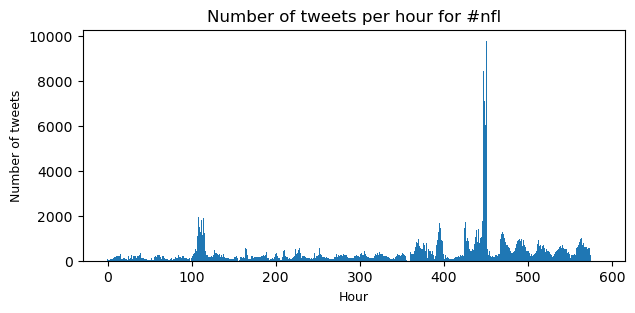

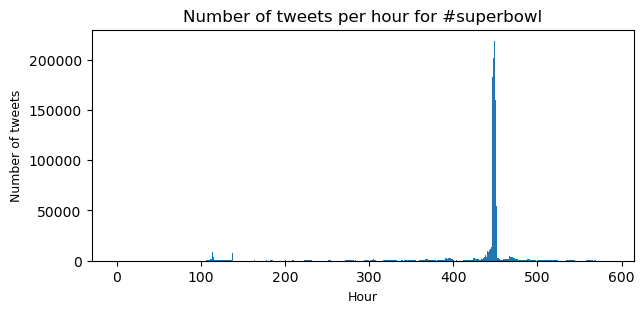

In [26]:
data_path = "/Users/ryan/Downloads/ECE219_tweet_data/"

hashtags = ["#nfl", "#superbowl"]

for hashtag in hashtags:
    file_path = os.path.join(data_path, f"tweets_{hashtag}.txt")
    
    with open(file_path, encoding="utf8") as f:
        tweets = f.readlines()

    times = []
    for tweet in tweets:
        tweet_dict = json.loads(tweet)
        time = datetime.datetime.fromtimestamp(tweet_dict['citation_date'])
        times.append(time)

    start_time = min(times)
    end_time = max(times)

    time_diff = end_time - start_time
    hours = int(np.ceil(time_diff.total_seconds() / 3600))
    
    hourly_counts = np.zeros(hours)

    for tweet in tweets:
        tweet_dict = json.loads(tweet)
        time = datetime.datetime.fromtimestamp(tweet_dict['citation_date'])
        hour_index = int((time - start_time).total_seconds() // 3600)
        hourly_counts[hour_index] += 1

    plt.figure(figsize=(7,3))
    plt.bar(np.arange(hours), hourly_counts, width=1)
    plt.title(f"Number of tweets per hour for {hashtag}",fontsize = 12)
    plt.xlabel("Hour",fontsize= 9)
    plt.ylabel("Number of tweets",fontsize = 9)
    plt.show()

# For this task we will use the #superbowl file to predict the mvp player
# Question 10: Follow the steps outlined below
• Describe your task.

• Explore the data and any metadata (you can even incorporate additional datasets if you choose).

• Describe the feature engineering process. Implement it with reason: Why are you
extracting features this way - why not in any other way?

• Generate baselines for your final ML model.

• A thorough evaluation is necessary.

• Be creative in your task design - use things you have learned in other classes too if
you are excited about them!

## Tasks Definition: 
The value of each event is the difference between the scores of two teams. A positive
score means that the Patriots is leading.
The first task is that we want to see how influential a player is. T
measure the sentiment level in time of the top 5 players, and try to find out if the
sentiment towards each player has an impact on the overall sentiment of all people.The second task is that, if we take the number of positive tweets, and the number
of negative tweets, and the sentiment level towards each player in the periods of
time when a significant event happened, can we predict the score difference
between two teams.
In this design problem,since the original data is too big, filter the tweets posted
near or during the game. Besides, I filtered out tweets that are non-English, and removed urls, hashtags,
tags/retweets/replies, etc (noise).Among these tweets, we need to find the tweets that mention the players from both
teams only. We used a NER model from SpaCy to get the entity type of each word. If a
word’s entity is PERSON and the name appears in the player lists from either team, we
then include the corresponding tweet for further processing. Here are the number of
tweets mentioning each player during the game

## Data Preparation: Load the #gopatriots and #gohawks datasets for furthrer analysis




In [24]:
!pip install spacy-langdetect
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [71]:

import nltk
from collections import defaultdict
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
wnl = WordNetLemmatizer()
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

import datetime
import time
import pytz
import math
pst_tz = pytz.timezone('America/Los_Angeles')

import spacy
from spacy import displacy

from spacy_langdetect import LanguageDetector
import en_core_web_sm

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /Users/ryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ryan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ryan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

tweets = []

with open("/Users/ryan/Downloads/ECE219_tweet_data/tweets_#superbowl.txt", 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweets.append(tweet)
print(f"Number of tweets in the dataset: {len(tweets)}")

Number of tweets in the dataset: 1213813


In [84]:
def read_file(link):
    json_file = []
    with open(link) as f:
        for line in f:
            json_file.append(json.loads(line))
    return json_file
hawks_tweets = read_file("/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gohawks.txt")
patriots_tweets = read_file("/Users/ryan/Downloads/ECE219_tweet_data/tweets_#gopatriots.txt")

# STEP 1  Explore the data 

## Plot tweets frequency based on two datasets 
### A: We can see that the number of tweets is at peak near the game time 

In [118]:
def plot_tws_in_hour(tweets, file_name):
    citation_dates = [tw["citation_date"] for tw in tweets]
    earliest = min(citation_dates)
    print("Lastest Citation Date: ", datetime.datetime.fromtimestamp(max(citation_dates)))
    print("Earliest Citation Date: ", datetime.datetime.fromtimestamp(min(citation_dates)))
    counts_per_hour = [0] * (int)((max(citation_dates) - min(citation_dates))/3600.0 + 1)
    for cd in citation_dates:
        counts_per_hour[(int)((cd - earliest) / 3600.0)] += 1
    plt.bar(np.arange(len(counts_per_hour)), counts_per_hour, 1)
    plt.xlabel("Hour Index")
    plt.ylabel("Number of Tweets of " + file_name)
    plt.title("Number of Tweets in Hour for " + file_name)
    plt.show()

Lastest Citation Date:  2015-02-07 02:17:49
Earliest Citation Date:  2015-01-14 00:04:41


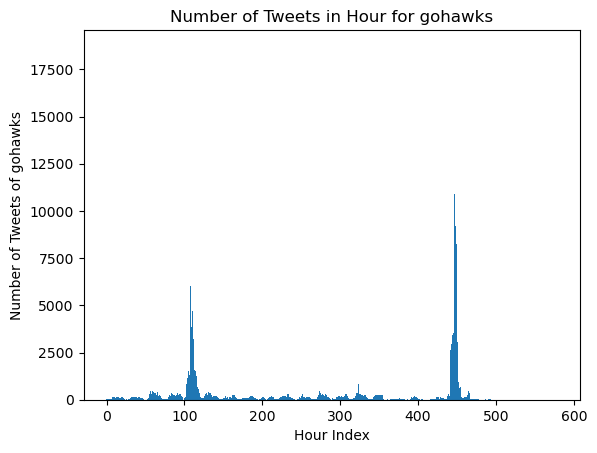

Lastest Citation Date:  2015-02-06 23:54:35
Earliest Citation Date:  2015-01-14 01:50:11


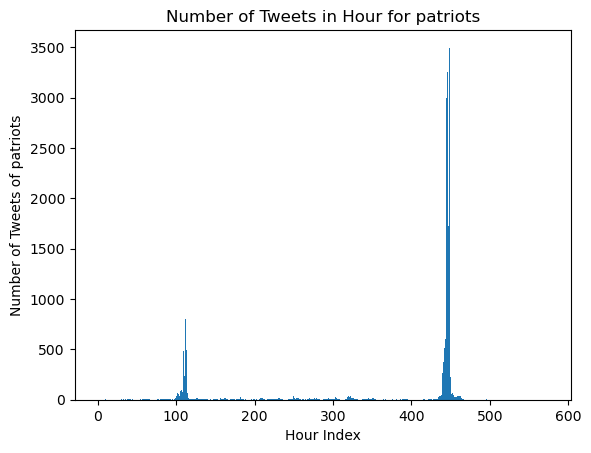

In [119]:
plot_tws_in_hour(hawks_tweets, "gohawks")

plot_tws_in_hour(patriots_tweets, "patriots")

## Step 2. Data filtering and Feature Selection:
Describe the feature engineering process. Implement it with reason: Why are you
extracting features this way - why not in any other way?
### A: Here, I  only choose tweets that is near the game time and select feature 1.text 2.citation date. We pick the text in order to analyze the frequence each player appears and the importatnt moment during game time. Also, since there are too many tweets in the datasets, so we need the citation time to filter the tweets near the gametime. 

In [156]:

def clean(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions and hashtags
    #text = re.sub(r'@\w+|#\w+', '', text)
    
    # Replace some common abbreviations
    text = re.sub(r'\bu\b', 'you', text)
    text = re.sub(r'\br\b', 'are', text)
    text = re.sub(r'\bu\b', 'you', text)
    text = re.sub(r'\bk\b', 'okay', text)
    text = re.sub(r'\bthx\b', 'thanks', text)
    
    # Remove any remaining special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Lowercase the text
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    
    return text

def get_wordnet_pos(tag):
    if tag[0] == 'J':
        return wordnet.ADJ
    elif tag[0] == 'V':
        return wordnet.VERB
    elif tag[0] == 'R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize(tweet):
    tokens = word_tokenize(tweet)
    words = [
    wnl.lemmatize(word, (get_wordnet_pos(tag))) \
    for word, tag in pos_tag(tokens) \
    if wnl.lemmatize(word, (get_wordnet_pos(tag))).isalpha()
  ]
    sentence = ' '.join(words)
    return sentence

NER = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
NER.add_pipe('language_detector', last=True)
def extract_features(tweets):
    citation_dates = []
    tweet_texts = []
    for tw in tweets:
        post_time = tw["citation_date"]
        if time_lo_bound <= post_time <= time_up_bound:
            text = tw['tweet']['text']
            if nlp(text).doc._.language['language'] == 'en':
                citation_dates.append(post_time)
                tweet_texts.append(text)
    return citation_dates, tweet_texts

### Set time bounds to filter tweets that is post near and during gametime.

In [123]:


#@markdown Time bounds during the game.
#@markdown - Lower bound: `time_lo_bound`.
time_lo_bound = time.mktime(datetime.datetime(2015, 2, 1, 3, 15, 0, 0, pst_tz).timetuple())
#@markdown - Lower bound: `time_up_bound`.
time_up_bound = time.mktime(datetime.datetime(2015, 2, 2, 3, 15, 0, 0, pst_tz).timetuple())  


In [117]:
len(patriots_tweets)

23511

In [124]:
hawks_time, hawks_texts = extract_features(hawks_tweets)
patriots_time, patriots_texts = extract_features(patriots_tweets)

In [125]:
#@markdown Report the number of tweets during the game.
print("Number of tweets posted #gohawks: ", len(hawks_texts))
print("Number of tweets posted #gopatriots: ", len(patriots_texts))

Number of tweets posted #gohawks:  47544
Number of tweets posted #gopatriots:  10722


### Clean texts for game players frequency in tweets extractions

In [157]:
#@markdown Clean gh text: `cleaned_gh_texts`.
hawks_cleaned_texts = []
for text in hawks_texts:
    cleaned = clean(text)
    hawks_cleaned_texts.append(cleaned)
    
patriots_cleaned_texts = []
for text in patriots_texts:
    cleaned = clean(text)
    patriots_cleaned_texts.append(cleaned)

In [158]:
hawks_cleaned_texts[100]

'now tomorrow is the super bowl lets get pumped sb49 gohawks'

In [180]:
#get all the players' name
hawks = [
  "Russell Wilson", "Tarvaris Jackson", "B.J. Daniels", "Marshawn Lynch",
  "Robert Turbin", "Christine Michael","Will Tukuafu","Luke Wilson", 
  "Tony Moeaki", "Cooper Helfet","Doug Baldwin", "Jermaine Kearse", 
  "Ricardo Lockette", "Chris Matthews", "Kevin Norwood", "Bryan Walters",
  "Alvin Bailey", "Justin Britt", "Russell Okung", "Lemuel Jeanpierre", 
  "Keavon Milton", "J.R. Sweezy", "James Carpenter", "Max Unger", "Patrick Lewis",
  "Cliff Avril", "Michael Bennett", "Demarcus Dobbs", "David King", 
  "O'Brien Schofield","Kevin Williams", "Tony McDaniel", "Landon Cohen",
  "Bruce Irvin", "K.J. Wright", "Bobby Wagner", "Malcolm Smith", "Mike Morgan", 
  "Brock Coyle","Richard Sherman", "Byron Maxwell", "Jeremy Lane", 
  "DeShawn Shead", "Tharold Simon", "Marcus Burley","Earl Thomas", 
  "Kam Chancellor", "Steven Terrell", "Jeron Johnson","Steven Hauschka",
  "Jon Ryan", "Clint Gresham"
]
#@markdown - Patriots Players: `p_players`
patriots = [
  "Tom Brady", "Jimmy Garoppolo","Shane Vereen", "LeGarrette Blount", 
  "Brandon Bolden", "Jonas Gray", "James White","James Develin",
  "Rob Gronkowski", "Michael Hoomanawanui", "Tim Wright","Julian Edelman", 
  "Brandon LaFell", "Danny Amendola", "Josh Boyce", "Matthew Slater", 
  "Brian Tyms", "Nate Solder", "Sebastian Vollmer", "Jordan Devey", 
  "Cameron Fleming", "Dan Connolly", "Marcus Cannon", "Josh Fline", 
  "Bryan Stork", "Ryan Wendell","Chandler Jones", "Rob Ninkovich", 
  "Alan Branch", "Zach Moore", "Joe Vellano", "Vince Wilfork","Chris Jones", 
  "Sealver Siliga","Jonathan Casillas", "Jamie Collins", "Darius Fleming", 
  "Dont'a Hightower", "Chris White", "Akeem Ayers","Darrelle Revis", 
  "Malcolm Butler", "Brandon Browner", "Kyle Arrington", "Logan Ryan",
  "Patrick Chung", "Devin McCourty", "Nate Ebner", "Duron Harmon", 
  "Tavon Wilson","Stephen Gostkowski","Ryan Allen","Danny Aiken"
]
hawks = set([player.lower() for player in hawks])
patriots = set([player.lower() for player in patriots])
#@markdown - All Players: `players`
players = hawks.union(patriots)

## Count the frequency of hawks team's player appear in #gohawks tweets

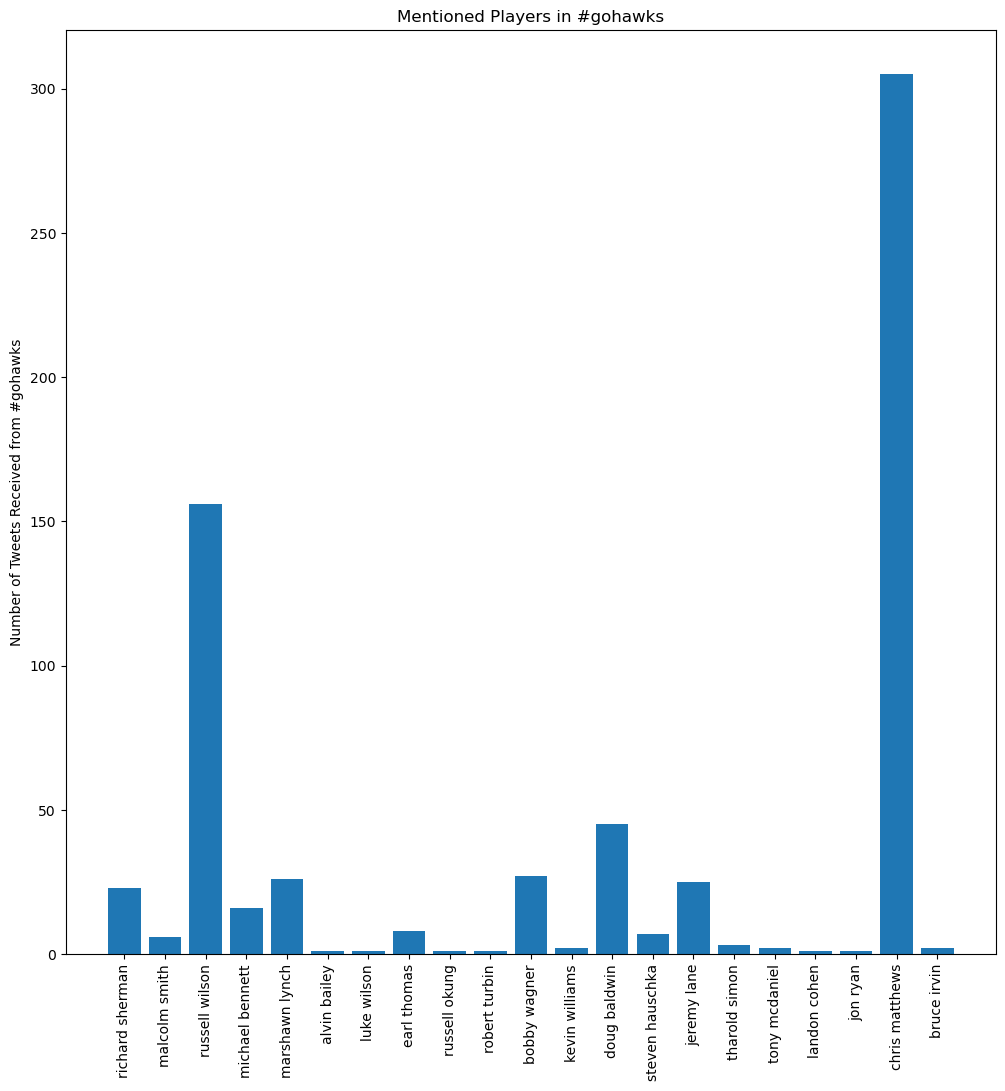

In [183]:
#@markdown Get players mentioned in #gohawks tweets: `mentioned_players_gh`
#@markdown - Contains: player name, indice of tweets mentioning them.
mentioned_players_gh = defaultdict(list)
for i, text in enumerate(hawks_cleaned_texts):
    doc_ner = NER(text)         # used to analyze entity
    for word in doc_ner.ents:
        if word.label_ == "PERSON" and word.text in hawks:
            mentioned_players_gh[word.text].append(i)
#@markdown Mentioning counts for each player in #gohawks
mentioned_players_gh_keys = list(mentioned_players_gh.keys())
num_tws_received_gh = []
for p in mentioned_players_gh_keys:
    num_tws_received_gh.append(len(mentioned_players_gh[p]))
plt.figure(figsize=(12, 12))
ax = plt.axes()
plt.bar(np.arange(len(num_tws_received_gh)), num_tws_received_gh)
plt.xticks(rotation = 90)
ax.set_xticks(np.arange(len(num_tws_received_gh)))
ax.set_xticklabels(mentioned_players_gh_keys)
ax.set_ylabel("Number of Tweets Received from #gohawks")
plt.title("Mentioned Players in #gohawks")
plt.show()

In [185]:
#@markdown Top 5 mentioned players in #gohawks
mentioned_gh_df = pd.DataFrame()
mentioned_gh_df['player'] = mentioned_players_gh_keys
mentioned_gh_df['mentioned times'] = num_tws_received_gh
mentioned_gh_df.sort_values('mentioned times', ascending=False).head()
     

player  mentioned times
19  chris matthews              305
2   russell wilson              156
12    doug baldwin               45
10    bobby wagner               27
4   marshawn lynch               26

In [200]:
hawks_top5_mentioned_players = set(mentioned_gh_df.sort_values('mentioned times', ascending=False)['player'][:5])

## Count the frequency of patriots team's player appear in #gopatriots tweets

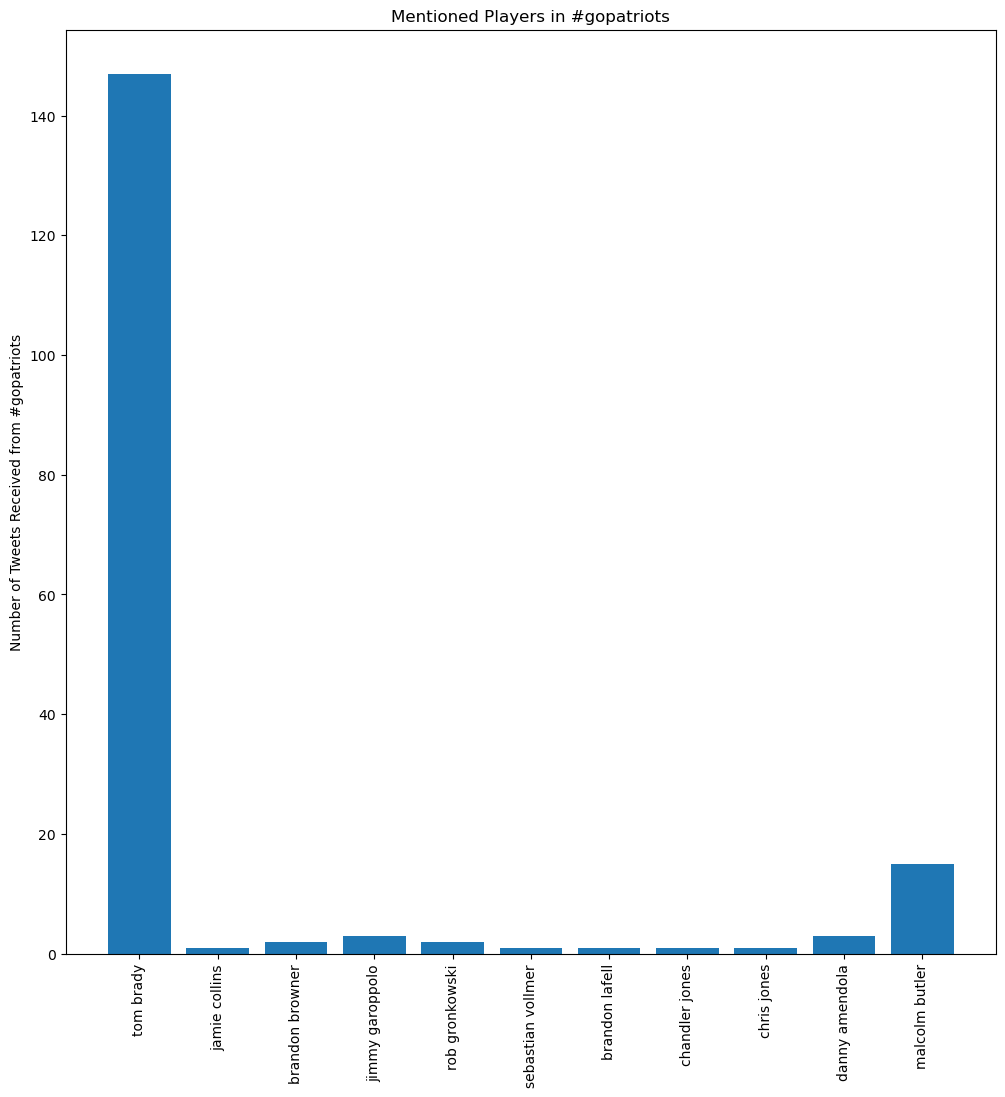

In [182]:
mentioned_players_gp = defaultdict(list)
for i, text in enumerate(patriots_cleaned_texts):
    doc_ner = NER(text)         # used to analyze entity
    for word in doc_ner.ents:
        if word.label_ == "PERSON" and word.text in patriots:
            mentioned_players_gp[word.text].append(i)
#@markdown Mentioning counts for each player in #gohawks
mentioned_players_gp_keys = list(mentioned_players_gp.keys())
num_tws_received_gp = []
for p in mentioned_players_gp_keys:
    num_tws_received_gp.append(len(mentioned_players_gp[p]))
plt.figure(figsize=(12, 12))
ax = plt.axes()
plt.bar(np.arange(len(num_tws_received_gp)), num_tws_received_gp)
plt.xticks(rotation = 90)
ax.set_xticks(np.arange(len(num_tws_received_gp)))
ax.set_xticklabels(mentioned_players_gp_keys)
ax.set_ylabel("Number of Tweets Received from #gopatriots")
plt.title("Mentioned Players in #gopatriots")
plt.show()

In [184]:
#@markdown Top 5 mentioned players in #gopatriots.
mentioned_gp_df = pd.DataFrame()
mentioned_gp_df['player'] = mentioned_players_gp_keys
mentioned_gp_df['mentioned times'] = num_tws_received_gp
mentioned_gp_df.sort_values('mentioned times', ascending=False).head()

player  mentioned times
0         tom brady              147
10   malcolm butler               15
3   jimmy garoppolo                3
9    danny amendola                3
2   brandon browner                2

In [201]:
patriots_top5_mentioned_players = set(mentioned_gp_df.sort_values('mentioned times', ascending=False)['player'][:5])


## Count frequency of all players that appears in both dataset

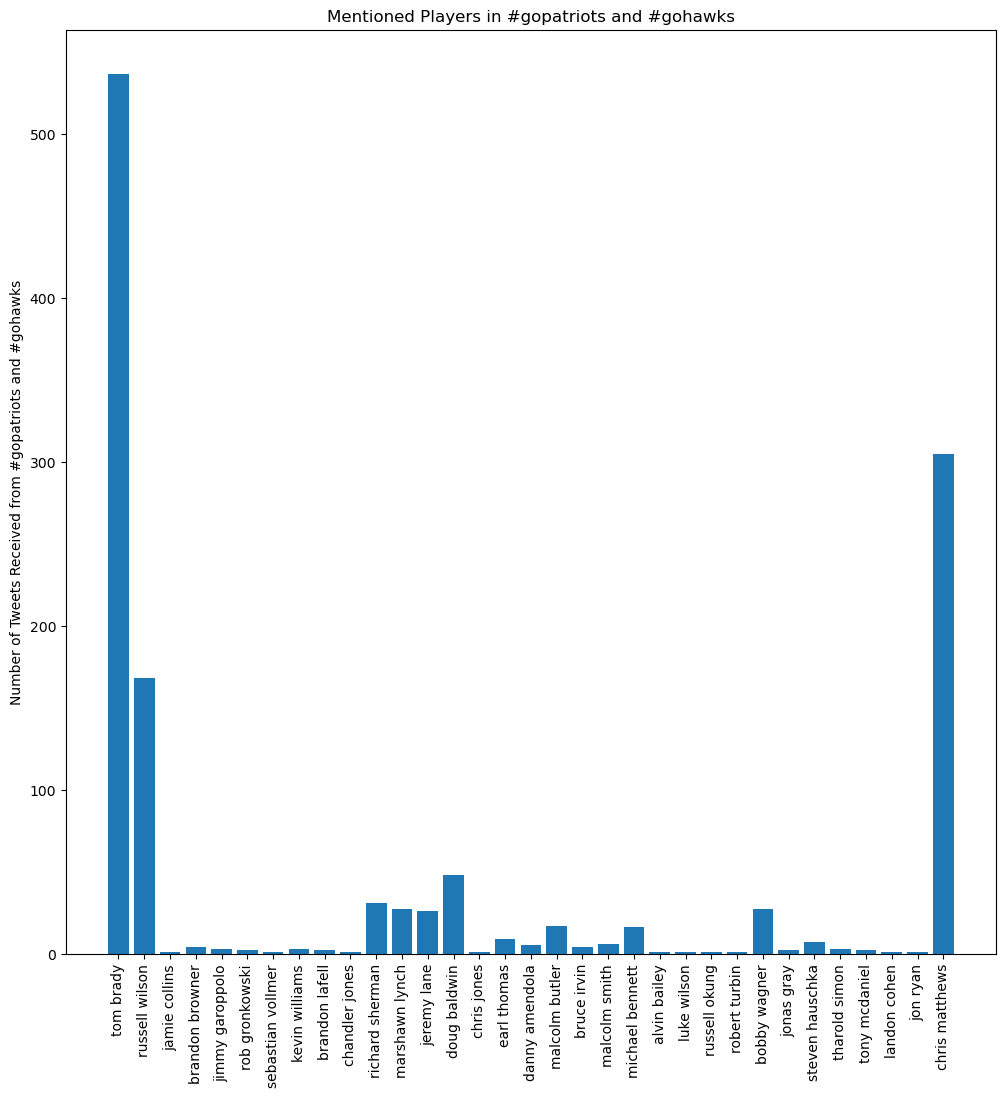

In [186]:
mentioned_players_hp = defaultdict(list)
for i, text in enumerate(patriots_cleaned_texts + hawks_cleaned_texts):
    doc_ner = NER(text)         # used to analyze entity
    for word in doc_ner.ents:
        if word.label_ == "PERSON" and word.text in players:
            mentioned_players_hp[word.text].append(i)
#@markdown Mentioning counts for each player in #gohawks
mentioned_players_hp_keys = list(mentioned_players_hp.keys())
num_tws_received_hp = []
for p in mentioned_players_hp_keys:
    num_tws_received_hp.append(len(mentioned_players_hp[p]))
plt.figure(figsize=(12, 12))
ax = plt.axes()
plt.bar(np.arange(len(num_tws_received_hp)), num_tws_received_hp)
plt.xticks(rotation = 90)
ax.set_xticks(np.arange(len(num_tws_received_hp)))
ax.set_xticklabels(mentioned_players_hp_keys)
ax.set_ylabel("Number of Tweets Received from #gopatriots and #gohawks")
plt.title("Mentioned Players in #gopatriots and #gohawks")
plt.show()

In [187]:
#@markdown Top 5 mentioned players in #gopatriots.
mentioned_hp_df = pd.DataFrame()
mentioned_hp_df['player'] = mentioned_players_hp_keys
mentioned_hp_df['mentioned times'] = num_tws_received_hp
mentioned_hp_df.sort_values('mentioned times', ascending=False).head()

player  mentioned times
0         tom brady              537
32   chris matthews              305
1    russell wilson              168
13     doug baldwin               48
10  richard sherman               31

In [188]:

top5_mentioned_players = set(mentioned_hp_df.sort_values('mentioned times', ascending=False)['player'][:5])
top5_mentioned_players
     

{'chris matthews',
 'doug baldwin',
 'richard sherman',
 'russell wilson',
 'tom brady'}

### Task 1: Influence of player

In [189]:
# record big events from ESPN
start_time = 1422833046
big_events = {
    1422836015 - 60: 7,       # touchdown P 7: 0
    1422837198 - 60: 0,       # touchdown H 7: 7
    1422838767 - 6 * 60: 7,   # touchdown P 14: 7
    1422838767 - 60: 0,       # touchdown H 14: 14
    1422841327 - 60: -3,      # field goal H 14: 17
    1422841327 + 3 * 60: -3,  # interception H 14: 17
    1422842399 - 60: -10,     # touchdown H 14: 24
    1422844127 - 60: -3,      # touchdown P 21: 24
    1422845305 - 60: 4,       # touchdown P
    1422846605 - 5 * 60: 4,   # interception P
    1422846605 : 4            # game: P won
}

In [191]:
def extract_player_influence(texts, times, player, mentioned_dict, min_time, time_window_size):
    twts_mentioning_player_is = mentioned_dict[player]
    sentiments_player = defaultdict(list)
    for i in twts_mentioning_player_is:
        current_time = times[i]
        text = texts[i]
        polarity = TextBlob(text).sentiment.polarity
        index = math.floor((current_time - min_time) / time_window_size)
        sentiments_player[index].append(polarity)
  
    avg_sentiments = defaultdict()
    for i in list(sentiments_player.keys()):
        avg_pol = np.mean(sentiments_player[i])
        avg_sentiments[i] = avg_pol

    xs_player = list(avg_sentiments.values())
    zero_sentiment_is = []
    for i, sent in enumerate(xs_player):
        if sent == 0:
            zero_sentiment_is.append(i)

    xs_filtered = [xs_player[i] for i in range(len(xs_player)) if i not in zero_sentiment_is]
  
    ys_player = defaultdict(list)
    for i in range(len(texts)):
        current_time = times[i]
        index = math.floor((current_time - min_time) / time_window_size)
        if index in set(avg_sentiments.keys()):
            text = texts[i]
            polarity = TextBlob(text).sentiment.polarity
            ys_player[index].append(polarity)

    ys_avg = defaultdict()
    for i in list(ys_player.keys()):
        ys_avg[i] = np.mean(ys_player[i])
    ys_filtered = [list(ys_avg.values())[i] for i in range(len(list(ys_avg.values()))) if i not in zero_sentiment_is]
  
    return xs_filtered, ys_filtered
  
def plot_player_influence(texts, times, player, mentioned_dict, min_time, time_window_size, title):
    xs_filtered, ys_filtered = extract_player_influence(
      texts, 
      times,
      player,
      mentioned_dict,
      min_time,
      time_window_size
  )
    df = pd.DataFrame()
    df["x"] = xs_filtered
    df["y"] = ys_filtered
    sns.lmplot(x='x', y='y', data=df)
    plt.title(title)
    plt.show()

## Influence top 5 Hawks players in #gohawks

 
### A: From the scatter plots below, we can see that the sentiments towards “Russel Wilson” and "Chris Matthews"  have a comparatively higher correlation with the overall sentiment level of the public in #gohawks.

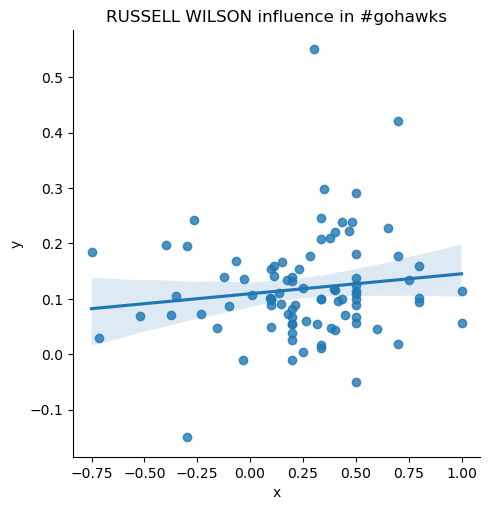

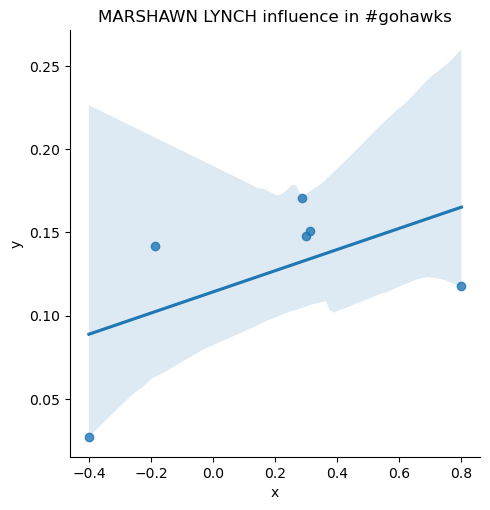

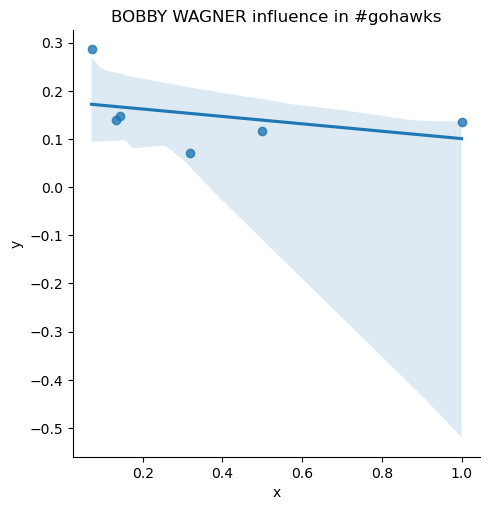

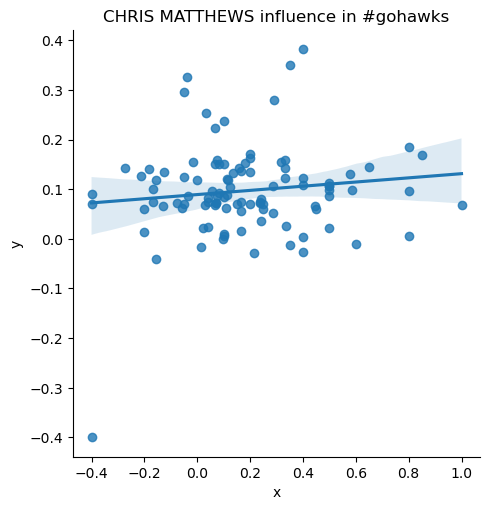

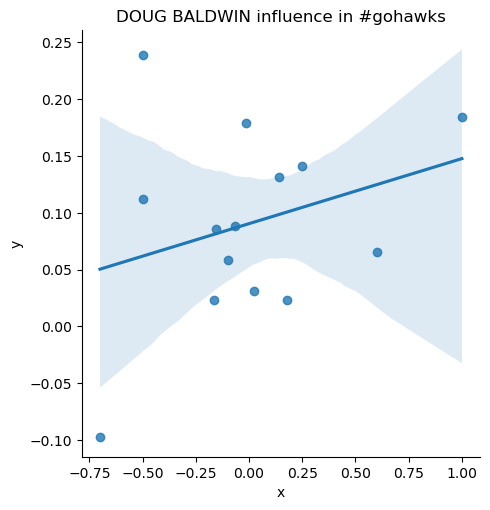

In [203]:
min_hawks_time = min(hawks_time)
max_hawks_time = max(hawks_time)
min_patriots_time = min(patriots_time)
max_patriots_time = max(patriots_time)
for player in hawks_top5_mentioned_players:
    plot_player_influence(
      hawks_cleaned_texts,
      hawks_time, 
      player,
      mentioned_players_gh,
      min_hawks_time,
      10,
      player.upper() + " influence in #gohawks" 
  )

## Influence of top 5 Patriots players in #gopatriots

### A: From the scatter plots below, we can see that the sentiments towards “Tom Brady”  have a comparatively higher correlation with the overall sentiment level of the public in #gopartiots.

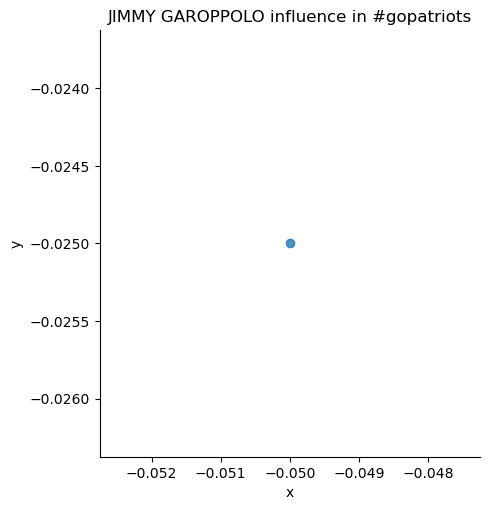

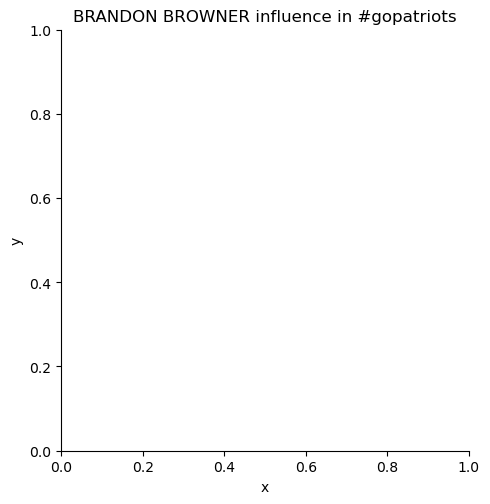

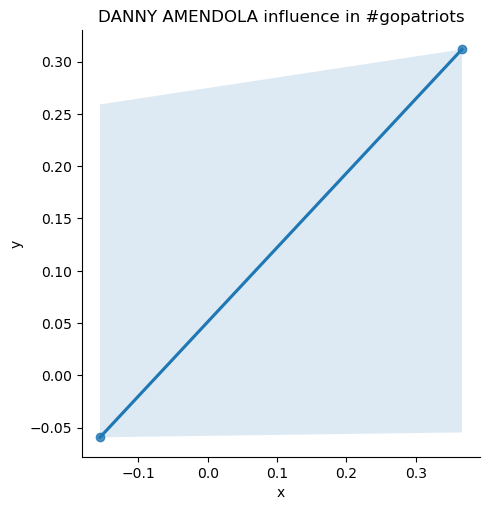

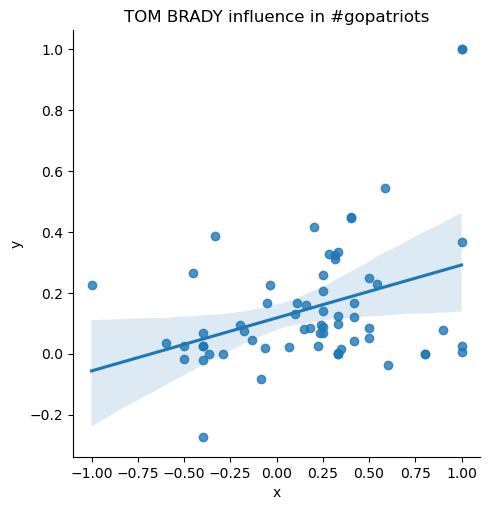

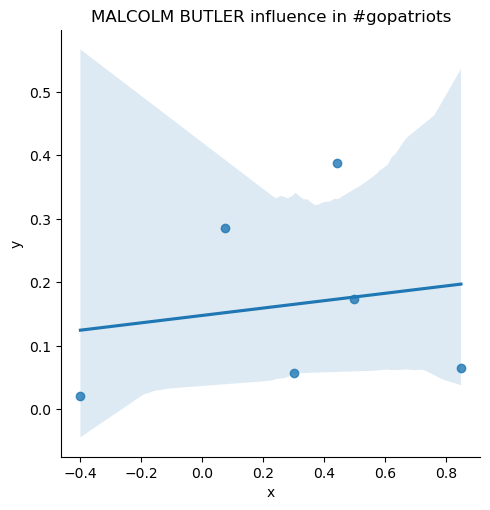

In [204]:

for player in patriots_top5_mentioned_players:
    plot_player_influence(
      patriots_cleaned_texts,
      patriots_time, 
      player,
      mentioned_players_gp,
      min_patriots_time,
      10,
      player.upper() + " influence in #gopatriots" 
  )

# Influence of top 5  players in the cobination datasets #gohawks and  #gopatriots

### A: From the scatter plots below, we can see that the sentiments towards “Tom Brady” and “Chris Matthews” have a comparatively higher correlation with the overall sentiment level of the public.

In [206]:
big_event_times = list(big_events.keys())
big_event_time_ranges = []
for i in range(len(big_event_times)):
    if i < len(big_event_times) - 1:
        big_event_time_ranges.append((big_event_times[i], big_event_times[i+1]))
big_event_time_ranges.append((big_event_times[-1], max(max_hawks_time, max_patriots_time)))

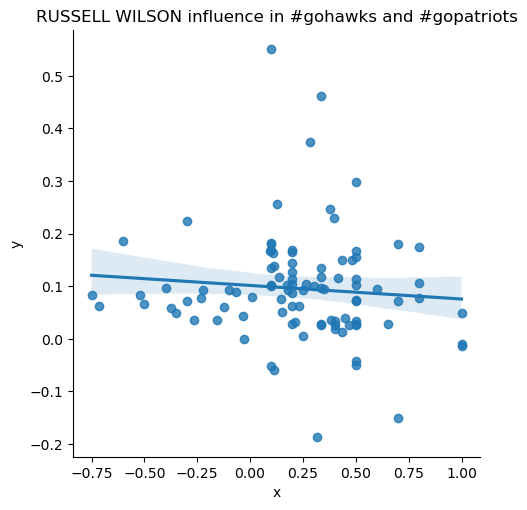

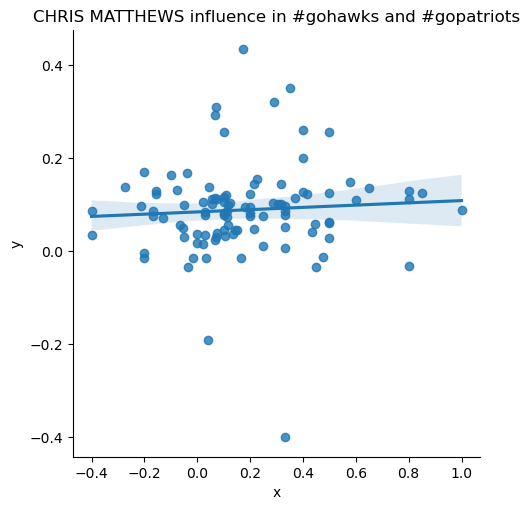

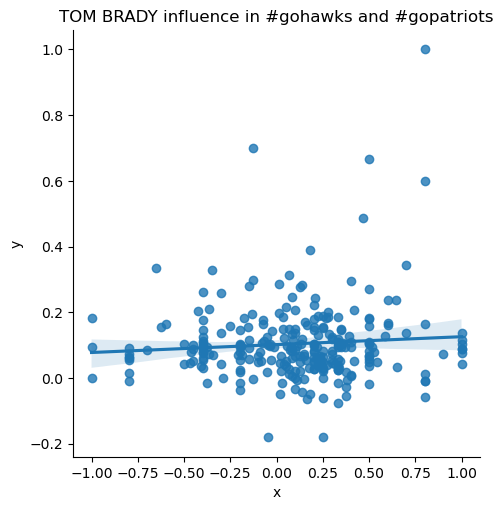

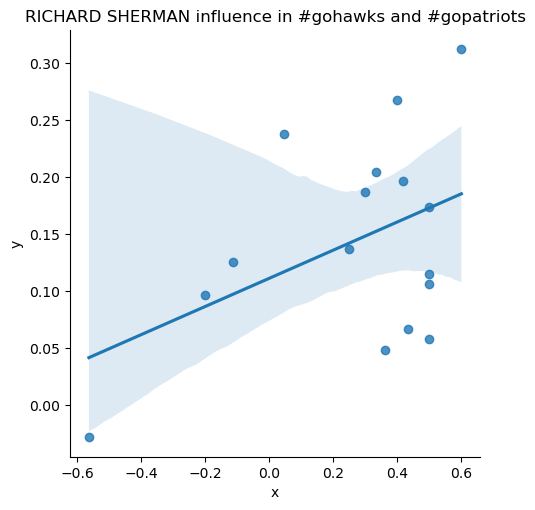

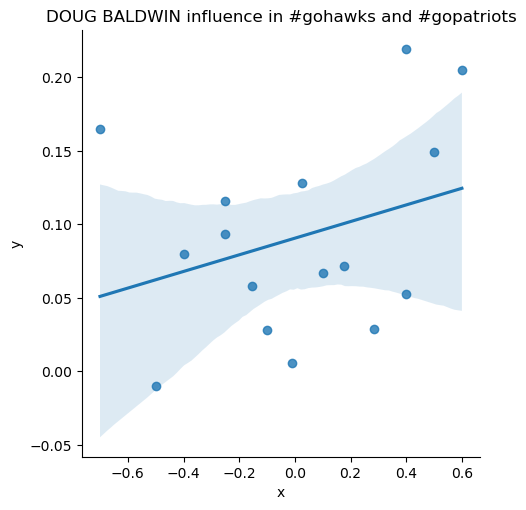

In [211]:

for player in top5_mentioned_players:
    plot_player_influence(
      patriots_cleaned_texts+hawks_cleaned_texts,
      patriots_time+hawks_time, 
      player,
      mentioned_players_hp,
      min_patriots_time,
      10,
      player.upper() + " influence in #gohawks and #gopatriots" 
  )

In [207]:
def extract_player_pos_neg_counts_in_ranges(texts, times, player, mentioned_dict, min_time): 
    big_events_times = list(big_events.keys())
    mentioning_player_is = mentioned_dict[player]
    pos_counts_in_ranges = [0] * len(big_event_times)  
    neg_counts_in_ranges = [0] * len(big_event_times)
    pos_sentiments_in_ranges = [0] * len(big_event_times)
    neg_sentiments_in_ranges = [0] * len(big_event_times)
    for i in mentioning_player_is:
        current_time = times[i]
        for index, range in enumerate(big_event_time_ranges):
            if range[0] <= current_time <= range[1]:
                text = texts[i]
                polarity = TextBlob(text).sentiment.polarity
        
                if polarity > 0:
                    pos_counts_in_ranges[index] += 1
                    pos_sentiments_in_ranges[index] += polarity
                elif polarity < 0:
                    neg_counts_in_ranges[index] += 1
                    neg_sentiments_in_ranges[index] += polarity
    avg_sentiments = []
    return pos_counts_in_ranges, neg_counts_in_ranges, pos_sentiments_in_ranges, neg_sentiments_in_ranges

def get_xs_ys(texts, times, player, mentioned_dict, min_time):
    pos_counts, neg_counts, pos_sentiments, neg_sentiments = extract_player_pos_neg_counts_in_ranges(
    texts,
    times,
    player,
    mentioned_dict,
    min_time
    )
    df = pd.DataFrame()
    df["pos counts"] = pos_counts
    df["neg counts"] = neg_counts
    df["pos sentiments"] = pos_sentiments
    df["neg sentiments"] = neg_sentiments
    df["score"] = big_events.values()
    sns.heatmap(df.corr(), annot=True)
    plt.title(player.upper() + " : Correlation with game score difference")
    plt.show()

    xs = df.drop(["score"], axis=1)
    ys = df["score"]
    return xs, ys

     

# HEAT MAP
### Notice that players who have no positive tweets received has a corresponding area which is blank. 

### Heatmap of the top 5 mentioned Hawks players based on #gohawks:

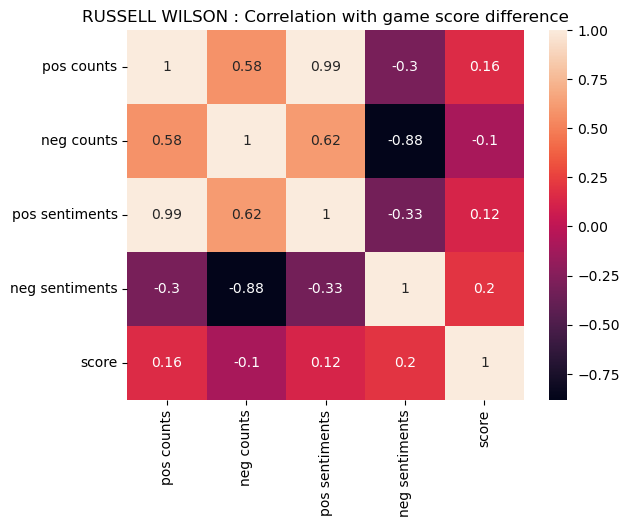

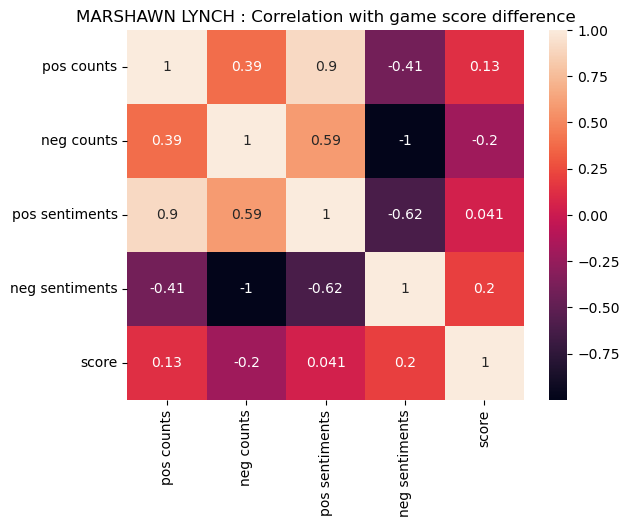

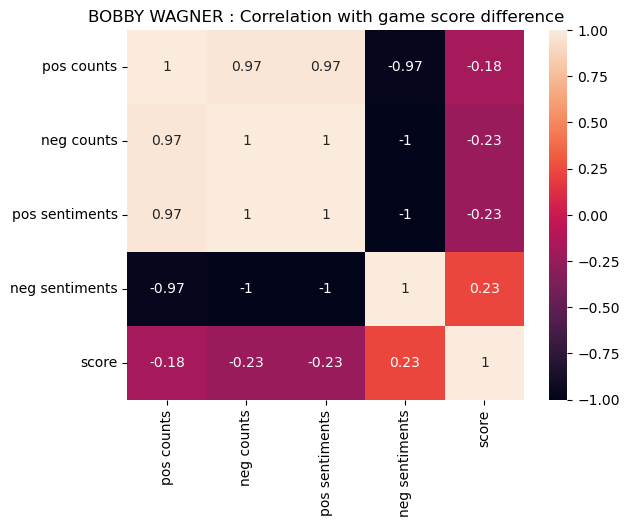

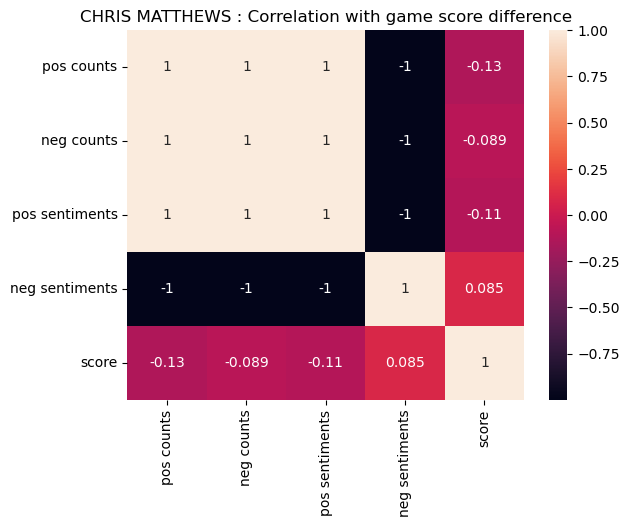

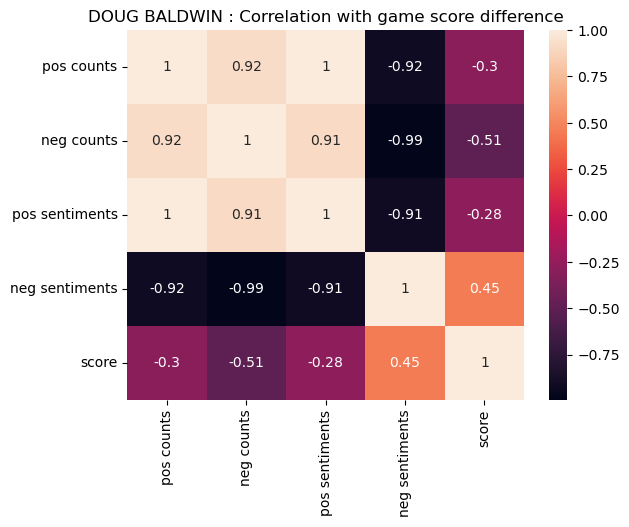

In [209]:
players_xs = defaultdict()
players_ys = defaultdict()
for player in hawks_top5_mentioned_players:
    xs, ys = get_xs_ys(
      hawks_cleaned_texts,
      hawks_time,
      player,
      mentioned_players_gh,
      min_hawks_time
    )
    players_xs[player] = xs
    players_ys[player] = ys

### Heatmap of the top 5 mentioned Patriots players based on #gopatriots:

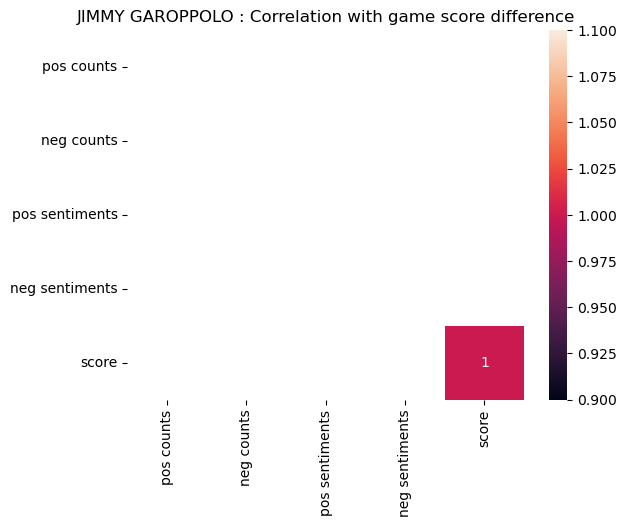

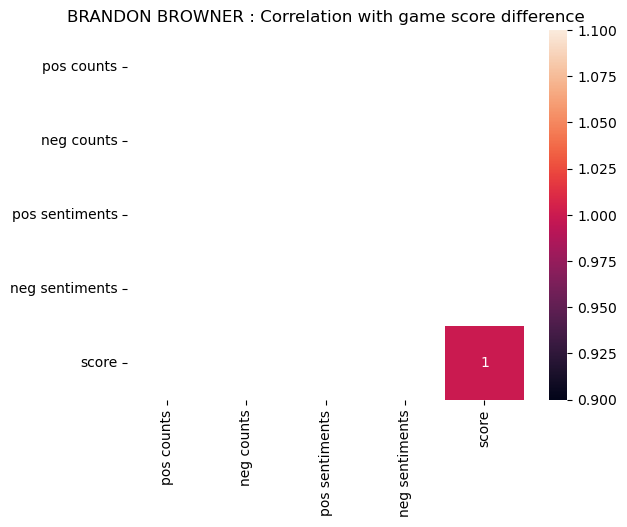

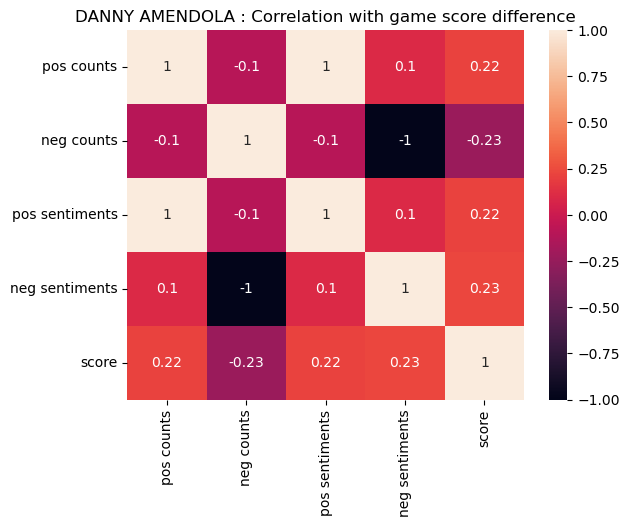

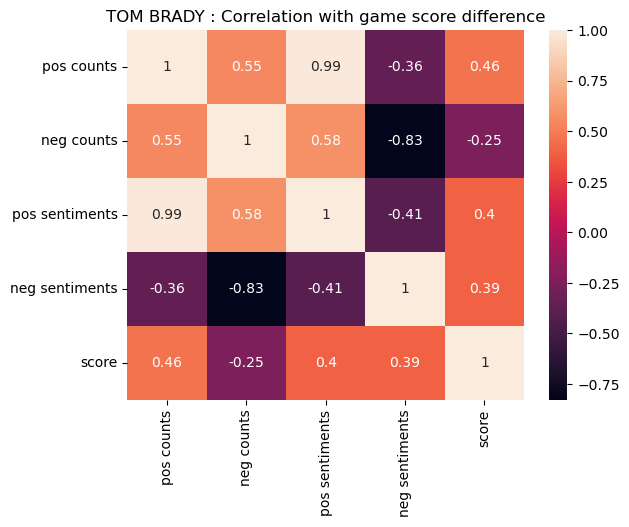

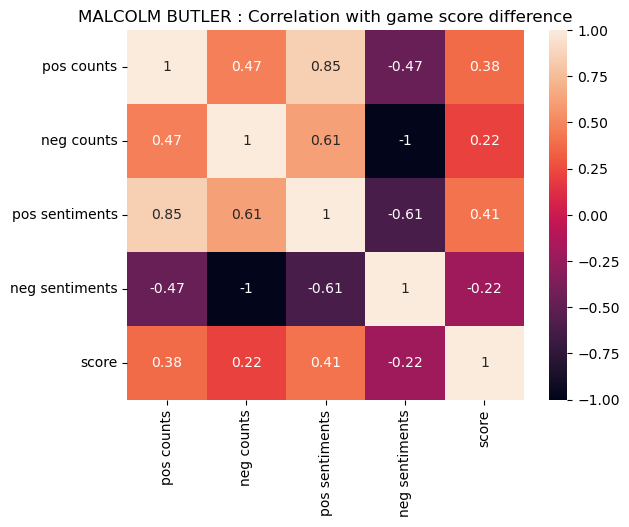

In [214]:
players_xs = defaultdict()
players_ys = defaultdict()
for player in patriots_top5_mentioned_players:
    xs, ys = get_xs_ys(
      patriots_cleaned_texts,
      patriots_time,
      player,
      mentioned_players_gp,
      min_patriots_time
    )
    players_xs[player] = xs
    players_ys[player] = ys

### Heatmap of the top 5 mentioned players based on #gohawks and #gopatriots:


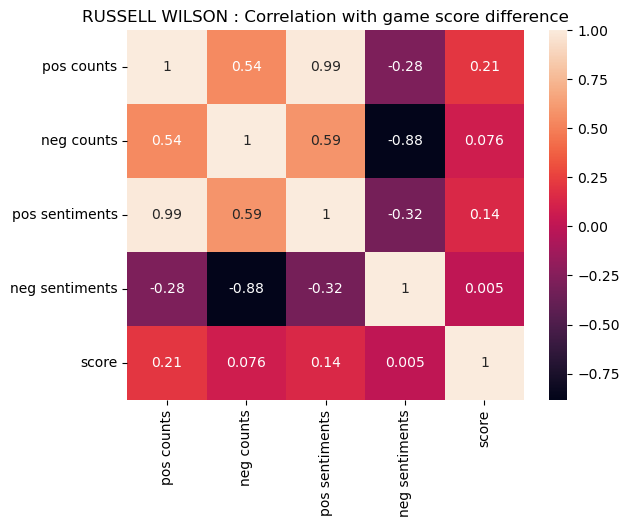

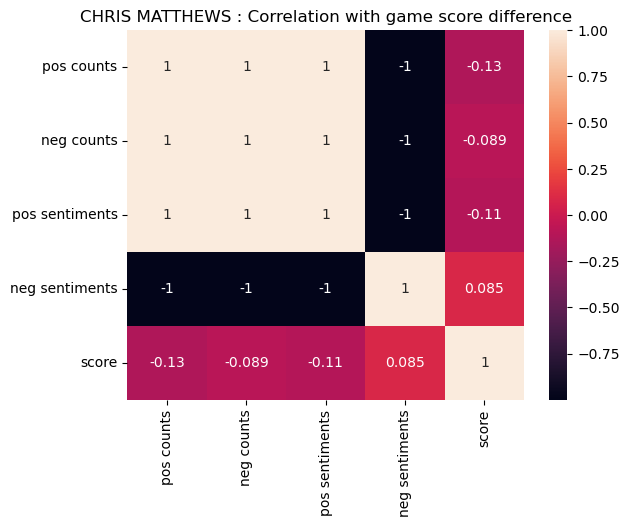

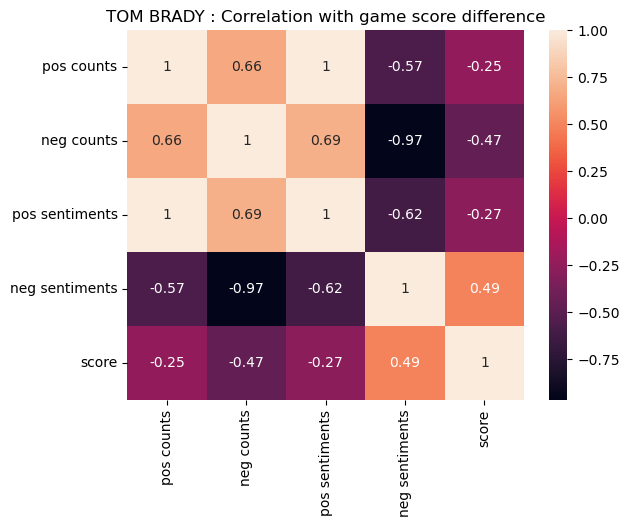

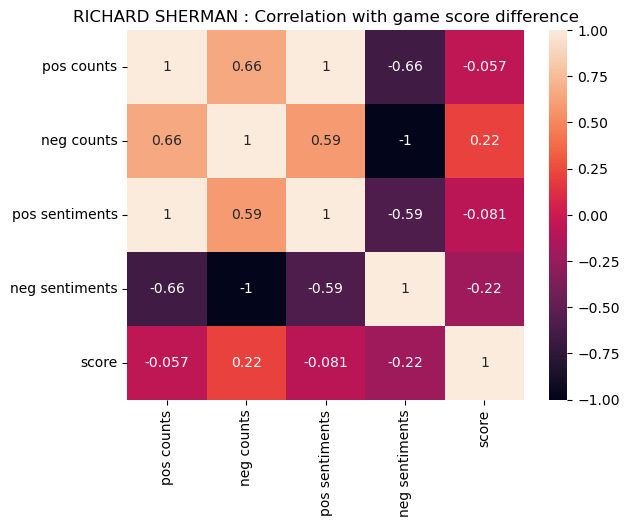

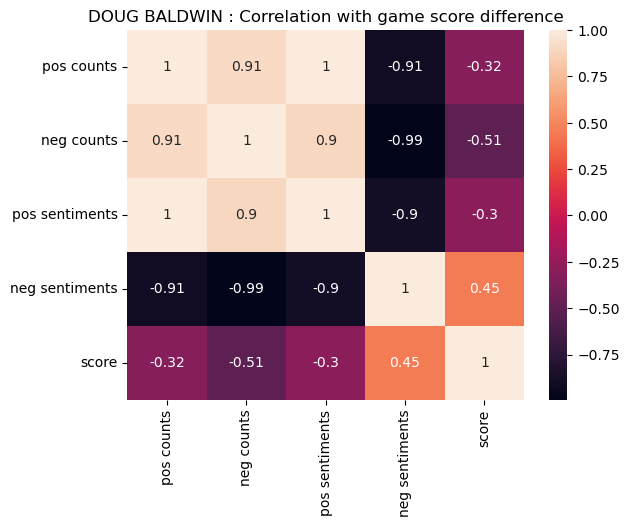

In [215]:
players_xs = defaultdict()
players_ys = defaultdict()
for player in top5_mentioned_players:
    xs, ys = get_xs_ys(
      patriots_cleaned_texts+hawks_cleaned_texts,
      patriots_time+hawks_time,
      player,
      mentioned_players_hp,
      min(min_patriots_time, min_hawks_time)
    )
    players_xs[player] = xs
    players_ys[player] = ys

In [224]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate,GridSearchCV

     
def report_linear_regression(player, xs, ys):
    lr_pip_std = Pipeline([
    ('standardize', preprocessing.StandardScaler()),
    ('model', LinearRegression())
  ])
    cv = cross_validate(
      lr_pip_std, 
      xs, ys, 
      scoring='neg_root_mean_squared_error', 
      return_train_score=True, cv=10
  )
    return pd.DataFrame(cv).sort_values(by=['test_score'], ascending=False).reset_index(drop=True)
def report_ridge(player, xs, ys):
    poly_pip = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('standardize', StandardScaler()),
    ('model', Ridge(alpha=0.001, random_state=42, max_iter=10000))
  ])
    param_grid_poly = {
      'poly_transform__degree': np.arange(1,11,1)
  }
    poly_cv  = GridSearchCV(
    poly_pip, 
    param_grid=param_grid_poly, 
    cv=10, 
    n_jobs=-1, 
    verbose=1, 
    scoring='neg_root_mean_squared_error', 
    return_train_score=True
  ).fit(xs, ys)
    poly_res = pd.DataFrame(poly_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'param_poly_transform__degree']]
    poly_res = poly_res.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
    return poly_res
def report_lasso(player, xs, ys):
    poly_pip = Pipeline([
        ('poly_transform', PolynomialFeatures()),
        ('standardize', StandardScaler()),
        ('model', Lasso(alpha=0.001, random_state=42, max_iter=10000))
    ])
    param_grid_poly = {
        'poly_transform__degree': np.arange(1,11,1)
    }
    poly_cv  = GridSearchCV(
        poly_pip, 
        param_grid=param_grid_poly, 
        cv=10, 
        n_jobs=-1, 
        verbose=1, 
        scoring='neg_root_mean_squared_error', 
        return_train_score=True
    ).fit(xs, ys)
    poly_res = pd.DataFrame(poly_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'param_poly_transform__degree']]
    poly_res = poly_res.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
    return poly_res


# Test for Regression Models
### A:
From the test results below, we can see that Linear Regression performed the best
whereas Ridge somehow failed, and Lasso had an overfitting problem.
- Our assumption is that the only one or two features I selected are valuable in terms of
predicting the score difference between two teams. Plus the number of samples selected
is way too less and consequently Ridge and Lasso performed poorly.
- A way to improve the performance of our model will be increasing the number of events
such as successful passes, distance proceeded, possession time, etc. This will increase
the number of datapoints that can be used to predict the score.
- If we predict the score difference using X where the positive tweets count for Tom Brady
is very high, then we will get a large negative number meaning that the Seahawks is
leading the game, which makes sense because as mentioned before Tom Brady is a
Patriots player. 

# Linear Regression reports for Top 5 mentioned players

In [219]:
from sklearn import preprocessing
for player in top5_mentioned_players:
    xs = players_xs[player]
    ys = players_ys[player]
    print(player.upper() + " Linear Regression")
    df_lr = report_linear_regression(player, xs, ys)
    print(df_lr.head())
     

RUSSELL WILSON Linear Regression
   fit_time  score_time  test_score  train_score
0  0.001871    0.000802   -0.074042    -4.485858
1  0.001858    0.000798   -1.956995    -4.475321
2  0.002039    0.000820   -3.822811    -4.451497
3  0.001992    0.000806   -5.018490    -4.243770
4  0.001892    0.000814   -5.071696    -4.254355
CHRIS MATTHEWS Linear Regression
   fit_time  score_time  test_score  train_score
0  0.001843    0.000796   -2.446861    -3.695129
1  0.001815    0.000807   -2.707022    -3.654607
2  0.002162    0.000842   -2.938360    -3.849456
3  0.001842    0.000794   -4.484405    -3.504353
4  0.001884    0.000807   -4.845538    -3.492308
TOM BRADY Linear Regression
   fit_time  score_time  test_score  train_score
0  0.001794    0.000788   -2.013526    -4.464786
1  0.001824    0.000783   -4.859580    -4.302677
2  0.001828    0.000785   -4.954804    -4.351724
3  0.001811    0.000780   -5.135341    -4.409358
4  0.002012    0.000806   -5.351271    -4.284940
RICHARD SHERMAN Linear R

# Ridge Regression reports for Top 5 mentioned players

In [222]:
for player in top5_mentioned_players:
    xs = players_xs[player]
    ys = players_ys[player]
    print(player.upper() + " Ridge")
    df_lr = report_ridge(player, xs, ys)
    print(df_lr.head())

RUSSELL WILSON Ridge
Fitting 10 folds for each of 10 candidates, totalling 100 fits
   mean_test_score  mean_train_score param_poly_transform__degree
0        -8.046773         -4.109304                            1
1       -81.128608         -2.986652                            2
2       -81.926672         -2.621573                            8
3      -107.573179         -2.720374                            3
4      -136.261600         -2.657162                            4
CHRIS MATTHEWS Ridge
Fitting 10 folds for each of 10 candidates, totalling 100 fits
   mean_test_score  mean_train_score param_poly_transform__degree
0       -10.454164         -3.374911                            1
1       -87.617591         -2.531437                            2
2     -2038.026707         -2.507188                            3
3    -16466.216490         -2.502348                            4
4    -93370.902104         -2.500704                            5
TOM BRADY Ridge
Fitting 10 folds for eac

# Lasso Regression reports for Top 5 mentioned players

In [225]:
for player in top5_mentioned_players:
    xs = players_xs[player]
    ys = players_ys[player]
    print(player.upper() + " Lasso")
    df_lr = report_lasso(player, xs, ys)
    print(df_lr.head())

RUSSELL WILSON Lasso
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.504e+01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+01, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.134e+00, tolerance: 1.441e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+01, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+01, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

   mean_test_score  mean_train_score param_poly_transform__degree
0        -8.071452         -4.109254                            1
1      -118.889898         -2.729600                            3
2      -123.368332         -2.947096                            2
3      -126.492475         -2.701223                            4
4      -134.398328         -2.692027                            5
CHRIS MATTHEWS Lasso
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e-01, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.906e+00, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+01, tolerance: 2.681e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.539e-01, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+01, tolerance: 1.441e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.540e-01, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

   mean_test_score  mean_train_score param_poly_transform__degree
0       -10.547616         -3.360731                            1
1       -30.369644         -2.496204                            3
2      -128.785914         -2.505601                            2
3      -139.197368         -2.494268                            4
4     -1704.192821         -2.493844                            5
TOM BRADY Lasso
Fitting 10 folds for each of 10 candidates, totalling 100 fits


 Duality gap: 7.971e+00, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+00, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.145e+00, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the num

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e+00, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.957e+00, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.530e+00, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.274e+00, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

   mean_test_score  mean_train_score param_poly_transform__degree
0       -10.058007         -3.999370                            1
1       -17.182360         -0.717691                            2
2       -23.298044         -0.373320                            3
3       -27.157373         -0.343436                            4
4       -31.487284         -0.347615                            8
RICHARD SHERMAN Lasso
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e-02, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.375e-02, tolerance: 2.540e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

   mean_test_score  mean_train_score param_poly_transform__degree
0        -6.227984         -4.496212                            2
1        -6.248027         -4.496209                            3
2        -6.253938         -4.496208                            4
3        -6.255873         -4.496208                            5
4        -6.256492         -4.496208                            6
DOUG BALDWIN Lasso
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.772e+01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e-01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.751e-01, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e-01, tolerance: 1.441e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.036e-02, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.451e-01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e-01, tolerance: 2.240e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

   mean_test_score  mean_train_score param_poly_transform__degree
0       -14.428424         -2.906925                            1
1       -39.348825         -2.788166                            6
2       -39.348828         -2.788166                            5
3       -39.348876         -2.788166                            4
4       -39.476826         -2.788167                            3


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e-01, tolerance: 1.441e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.036e-02, tolerance: 2.561e-02
  model = cd_fast.enet_coordinate_descent(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.